# SDSS Homework

Starting from question a), the goal is to write an SQL quarry that produces all QSO or galaxy objects with particular parameters. 
Below the SQL query is shown. N.B. FWHM of a line is about 2.355 * sigma

This query returns 226 objects. First few results are shown below. The ful table is in "SQL_a.csv"

| plate | mjd   | fiberid | [OIII]/Hbeta | Hbeta/Hgamma | [OIII]/Hgamma | h_beta_eqw  | h_beta_flux | redshift   | E(B-V)      |
|-------|-------|---------|--------------|--------------|---------------|-------------|-------------|------------|-------------|
| 1575  | 53493 | 495     | 0.1576048    | 2.475892     | 0.3902123     | -17.37642   | 1758.446    | 0.2688824  | 0.05115553  |
| 1776  | 53858 | 612     | 0.6722579    | 2.341709     | 1.574232      | -13.2989    | 1311.827    | 0.1341881  | 0.03179598  |
| 2123  | 53793 | 443     | 1.19632      | 1.44043      | 1.723215      | -5.379469   | 1357.127    | 0.07700984 | 0.0183279   |
| 618   | 52049 | 579     | 1.02937      | 1.15511      | 1.189035      | -0.3571355  | 20.85965    | 0.0664644  | 0.01282344  |
| 542   | 51993 | 45      | 1.012296     | 1.577513     | 1.59691       | -0.5260484  | 39.52322    | 0.06307887 | 0.04754315  |
| 451   | 51908 | 133     | 0.8942135    | 2.042021     | 1.826002      | -11.01267   | 2732.305    | 0.1228317  | 0.02732966  |
| 1814  | 54555 | 573     | 2.350794     | 2.034936     | 4.783716      | -14.6751    | 1777.444    | 0.129768   | 0.02729913  |
| 2147  | 53491 | 162     | 2.379307     | 2.309704     | 5.495494      | -13.20133   | 2117.616    | 0.1247753  | 0.02633778  |
| 2616  | 54499 | 564     | 1.06954      | 0.7565432    | 0.8091533     | -0.3704851  | 38.14082    | 0.06378573 | 0.02349023  |
| 539   | 52017 | 586     | 0.4132285    | 2.033846     | 0.8404432     | -13.14289   | 2292.539    | 0.1346648  | 0.05099057  |
| 502   | 51957 | 557     | 0.4174479    | 2.10458      | 0.8785526     | -13.21841   | 832.4188    | 0.2201104  | 0.06144398  |
| 476   | 52314 | 523     | 0.642544     | 2.033772     | 1.306788      | -28.08086   | 3685.079    | 0.05026412 | 0.06889841  |
| 394   | 51913 | 363     | 1.067335     | 0.5972697    | 0.6374867     | -0.2289201  | 10.95932    | 0.1038223  | 0.02405703  |
| 1223  | 52781 | 471     | 0.8385926    | 2.109372     | 1.768904      | -22.88305   | 3397.969    | 0.05014781 | 0.02880776  |

Question b) involves checking which condition is the most limiting. The easiest way to find out is to remove conditions one by one and compare results. For this to work we need to remove the divisions from the SQL query so we don't encounter division by 0. To understand which condition is the most limiting the only relevant information is the number of results so we can actually remove all columns and just worry about the count. The new query looks like this:

This query has the same conditions as before but it returns only the number of results. We use a few similar queries where every time a different line is commented out to determine the most limiting condition. Number of results after commenting out each condition are as follows:

| condition                     | number of results |
|-------------------------------|-------------------|
| OIII line flux > 0            | 227               |
| H beta line flux > 0          | 234               |
| H gamma line flux > 0         | 244               |
| FWHM of H beta > 1000 km/s    | 438               |
| Type (QSO or Galaxy)          | 226               |
| Redshift between 0.05 and 0.3 | 1459              |
| SNR in g > 35                 | 23 613            |

Therefore, the most limiting condition is the SNR requirement

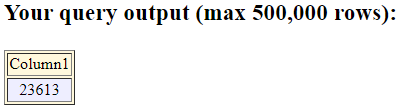

For question c), there are no results when just adding "s.subclass = 'AGN'". The easiest way to obtain some objects under similar conditions as in question 1 is to remove the condition for SNR. SQL code with SNR condition commented out is:

This query gives 15 results:

| plate | mjd   | fiberid | [OIII]/Hbeta | Hbeta/Hgamma | [OIII]/Hgamma | h_beta_eqw | h_beta_flux | redshift   | E(B-V)     |
|-------|-------|---------|--------------|--------------|---------------|------------|-------------|------------|------------|
| 2433  | 53820 | 195     | 0.6969976    | 39.48378     | 27.5201       | -0.9607505 | 14.63337    | 0.1166639  | 0.03350944 |
| 2200  | 53875 | 569     | 0.8502606    | 13.16791     | 11.19615      | -1.205845  | 13.92751    | 0.2202646  | 0.05262849 |
| 2795  | 54563 | 268     | 0.846252     | 1.676954     | 1.419125      | -2.622165  | 33.10557    | 0.2102086  | 0.05310053 |
| 1852  | 53534 | 73      | 2.330998     | 1.754163     | 4.08895       | -2.610742  | 37.82882    | 0.1071493  | 0.07558046 |
| 2579  | 54068 | 188     | 0.1994258    | 3.624447     | 0.7228082     | -0.8336384 | 10.38444    | 0.1018414  | 0.02680533 |
| 1705  | 53848 | 434     | 2.010879     | 2.127396     | 4.277936      | -3.496946  | 49.67802    | 0.1145385  | 0.02215269 |
| 433   | 51873 | 438     | 1.813225     | 2.14334      | 3.886358      | -0.9557063 | 53.94587    | 0.06154879 | 0.05547196 |
| 1651  | 53442 | 601     | 0.6001256    | 5.083588     | 3.050791      | -1.158722  | 47.19127    | 0.09114297 | 0.02654255 |
| 1349  | 52797 | 420     | 1.330981     | 0.8885453    | 1.182637      | -2.130182  | 18.60312    | 0.2113706  | 0.01160687 |
| 1735  | 53035 | 305     | 1.736912     | 17.67077     | 30.69259      | -0.6627398 | 11.76657    | 0.1169507  | 0.05864099 |
| 1693  | 53446 | 540     | 1.429882     | 5.693892     | 8.141597      | -0.6584679 | 8.982183    | 0.2660356  | 0.05670876 |
| 1004  | 52723 | 316     | 3.55685      | 1.507499     | 5.361948      | -0.6492838 | 15.40595    | 0.1273379  | 0.04549397 |
| 2347  | 53757 | 7       | 0.7114343    | 1.199572     | 0.8534167     | -0.7558221 | 67.09808    | 0.05161455 | 0.0400072  |
| 1417  | 53141 | 103     | 1.182574     | 1.311069     | 1.550436      | -0.5479293 | 11.46285    | 0.07270456 | 0.02576175 |
| 394   | 51913 | 195     | 0.9059105    | 9.27037      | 8.398125      | -1.296473  | 6.334178    | 0.2661569  | 0.02827337 |

For part d) The 287-plate-mjd-fiber.txt file was uploaded in CrossID. Some settings on the website needed to be changed:
Change the search type to spectra and change the upload type to plate-mjd-fberID. Some ' had to be changed to " and the newly uploaded table needed to be joined to the other tables to cross-match the data. The few lines that join the uploaded table and the SpecObjAll tables were automatically generated but were moved and rearanged for clarity. The resulting query was:

It returned the following results:

| plate | mjd   | fiberid | [OIII]/Hbeta | Hbeta/Hgamma | [OIII]/Hgamma | h_beta_eqw | h_beta_flux | redshift  | E(B-V)     |
|-------|-------|---------|--------------|--------------|---------------|------------|-------------|-----------|------------|
| 640   | 52178 | 513     | 0.3341854    | 1.760133     | 0.5882106     | -10.36639  | 952.4866    | 0.4174148 | 0.09496573 |
| 2173  | 53874 | 354     | 0.6451375    | 2.495043     | 1.609646      | -11.65119  | 509.9599    | 0.4557629 | 0.05542863 |
| 1843  | 53816 | 584     | 0.4476209    | 2.396323     | 1.072644      | -12.03965  | 557.34      | 0.4980763 | 0.01577194 |
| 637   | 52174 | 259     | 0.2523734    | 2.374881     | 0.5993569     | -11.40223  | 3992.194    | 0.5993487 | 0.07477354 |
| 411   | 51817 | 381     | 0.4205669    | 3.066892     | 1.289833      | -10.74767  | 1313.903    | 0.5324706 | 0.08810838 |
| 1716  | 53827 | 350     | 0.9021373    | 1.903746     | 1.71744       | -9.304626  | 798.7177    | 0.5008188 | 0.03326718 |
| 1224  | 52765 | 379     | 0.3398808    | 2.737802     | 0.9305261     | -12.69335  | 1333.446    | 0.5228383 | 0.04002199 |
| 2347  | 53757 | 151     | 0.6893487    | 2.164921     | 1.492386      | -16.70732  | 1452.441    | 0.5113347 | 0.02648882 |
| 2034  | 53466 | 230     | 0.3777993    | 2.638463     | 0.9968096     | -10.54055  | 2134.027    | 0.5083145 | 0.02323727 |
| 1810  | 53794 | 504     | 0.2570447    | 2.435954     | 0.6261491     | -14.90093  | 1133.808    | 0.4596158 | 0.02485074 |
| 2520  | 54584 | 442     | 3.537334     | 1.718534     | 6.07903       | -11.22126  | 178.4678    | 0.4358573 | 0.05334958 |
| 555   | 52266 | 74      | 0.6370804    | 2.14832      | 1.368653      | -10.00354  | 552.9328    | 0.4688599 | 0.02161665 |
| 976   | 52413 | 574     | 0.1869689    | 2.345961     | 0.4386216     | -20.90205  | 1784.66     | 0.4689836 | 0.03079161 |
| 268   | 51633 | 235     | 0.4154737    | 3.212858     | 1.334858      | -9.859278  | 677.1182    | 0.595322  | 0.03354528 |
| 2645  | 54477 | 133     | 0.7994121    | 2.459721     | 1.96633       | -14.06366  | 937.1426    | 0.4930311 | 0.02225282 |
| 795   | 52378 | 528     | 0.4668604    | 1.888805     | 0.8818083     | -12.8672   | 625.2177    | 0.5607508 | 0.01193781 |
| 2526  | 54582 | 404     | 0.3373327    | 2.017231     | 0.6804778     | -11.94227  | 965.0396    | 0.4583784 | 0.05439631 |
| 1844  | 54138 | 112     | 0.5879771    | 1.822562     | 1.071625      | -6.350803  | 717.105     | 0.5256413 | 0.02177914 |
| 2646  | 54479 | 204     | 0.1564952    | 1.913876     | 0.2995124     | -9.889492  | 1557.825    | 0.4338264 | 0.02289122 |
| 939   | 52636 | 172     | 0.5175255    | 1.699401     | 0.8794833     | -5.977588  | 575.824     | 0.4219211 | 0.01403132 |
| 408   | 51821 | 611     | 1.298259     | 2.122388     | 2.755408      | -11.62149  | 927.9932    | 0.5689139 | 0.03383083 |
| 721   | 52228 | 454     | 0.4051845    | 2.428448     | 0.9839695     | -20.61713  | 574.8325    | 0.502505  | 0.05165878 |
| 897   | 52605 | 242     | 0.1680855    | 2.215153     | 0.372335      | -16.58844  | 1483.066    | 0.5136945 | 0.03365997 |
| 856   | 52339 | 50      | 0.3084432    | 2.303349     | 0.7104521     | -19.17619  | 2298.788    | 0.4271503 | 0.03264315 |
| 464   | 51908 | 576     | 0.4052001    | 1.133334     | 0.4592269     | -3.915135  | 367.0603    | 0.5702274 | 0.0965671  |
| 2425  | 54139 | 442     | 1.199032     | 1.610652     | 1.931223      | -7.778267  | 422.1902    | 0.5659922 | 0.04197626 |
| 554   | 52000 | 553     | 1.069571     | 1.792881     | 1.917614      | -8.415974  | 961.0248    | 0.4736708 | 0.02523354 |
| 498   | 51984 | 104     | 0.5001677    | 2.346257     | 1.173522      | -10.74795  | 462.6565    | 0.4614837 | 0.01426796 |
| 2606  | 54154 | 614     | 0.2476668    | 1.975753     | 0.4893284     | -9.709053  | 1450.117    | 0.552017  | 0.02188222 |
| 564   | 52224 | 471     | 0.1912216    | 2.323531     | 0.4443092     | -16.15146  | 2766.907    | 0.5112072 | 0.03008878 |
| 465   | 51910 | 603     | 3.92246      | 1.954858     | 7.667851      | -11.59554  | 799.0661    | 0.5496119 | 0.0680838  |
| 656   | 52148 | 282     | 0.3461726    | 2.096536     | 0.7257633     | -12.31159  | 1365.047    | 0.4236842 | 0.02947504 |
| 1592  | 52990 | 18      | 0.7617553    | 1.528165     | 1.164088      | -6.518604  | 459.9291    | 0.5841894 | 0.01962814 |
| 329   | 52056 | 577     | 0.721276     | 2.022363     | 1.458682      | -15.52481  | 1135.089    | 0.4580766 | 0.02008798 |
| 2512  | 53877 | 582     | 0.4139671    | 2.223392     | 0.9204111     | -6.979514  | 673.3281    | 0.5215923 | 0.04497579 |
| 1694  | 53472 | 540     | 0.2110908    | 2.879598     | 0.6078568     | -16.54789  | 1848.843    | 0.5119441 | 0.0279867  |
| 1754  | 53385 | 324     | 0.646228     | 2.294816     | 1.482974      | -15.685    | 1279.667    | 0.4343848 | 0.03020268 |
| 644   | 52173 | 413     | 0.5348418    | 2.407628     | 1.2877        | -12.73695  | 1035.502    | 0.5896417 | 0.04080473 |
| 767   | 52252 | 300     | 0.2535838    | 1.556329     | 0.3946598     | -8.894829  | 934.5037    | 0.5540618 | 0.01614243 |
| 1949  | 53433 | 472     | 2.822379     | 1.46059      | 4.122338      | -9.254515  | 1219.554    | 0.5306148 | 0.01484899 |
| 793   | 52370 | 549     | 0.7883095    | 2.692936     | 2.122867      | -8.881385  | 481.7625    | 0.513281  | 0.01412164 |
| 1773  | 53112 | 301     | 0.9197367    | 1.317378     | 1.21164       | -6.771779  | 651.824     | 0.4975437 | 0.02385371 |
| 1847  | 54176 | 630     | 0.4833947    | 2.170741     | 1.049325      | -13.29521  | 1699.505    | 0.4473778 | 0.02485514 |
| 561   | 52295 | 618     | 3.467889     | 1.7627       | 6.112846      | -8.85923   | 625.7569    | 0.4208928 | 0.01354015 |
| 402   | 51793 | 479     | 0.307347     | 2.322718     | 0.7138805     | -11.35889  | 1318.962    | 0.5524943 | 0.03973217 |
| 1791  | 54266 | 46      | 0.3758007    | 2.280435     | 0.8569891     | -17.74196  | 1027.594    | 0.4389866 | 0.02399247 |
| 607   | 52368 | 581     | 0.4498428    | 2.359785     | 1.061532      | -11.73849  | 567.0939    | 0.5525806 | 0.01419172 |

The next part e) requires the download of some spectra using wget. The easiest way to achieve that is by clicking the 'Submit' button below the table with results (if we request the output of the query to be in HTML format).  

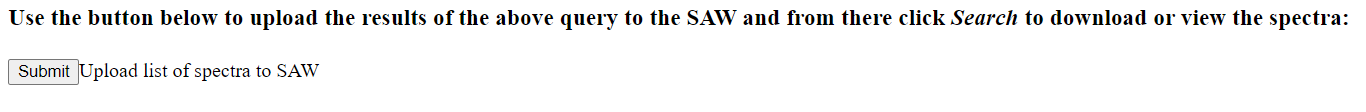

This opens our list directly into SAS which returns this table with a lot of options including seeng individual plots and batch downloading spectra. For the download using wget we can click the 'Spectra (wget)' button that automatically downloads a text file containing all file names and a wget command we can directly paste in the terminal to download all spectra. 

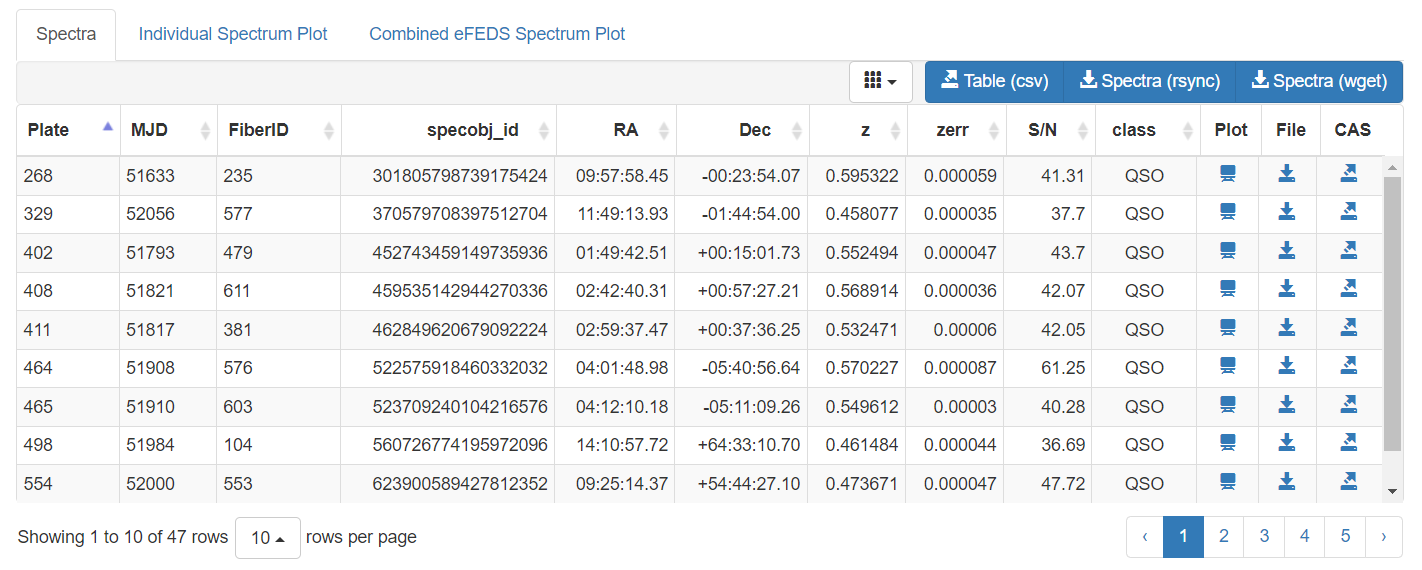

An example plot from SAS:

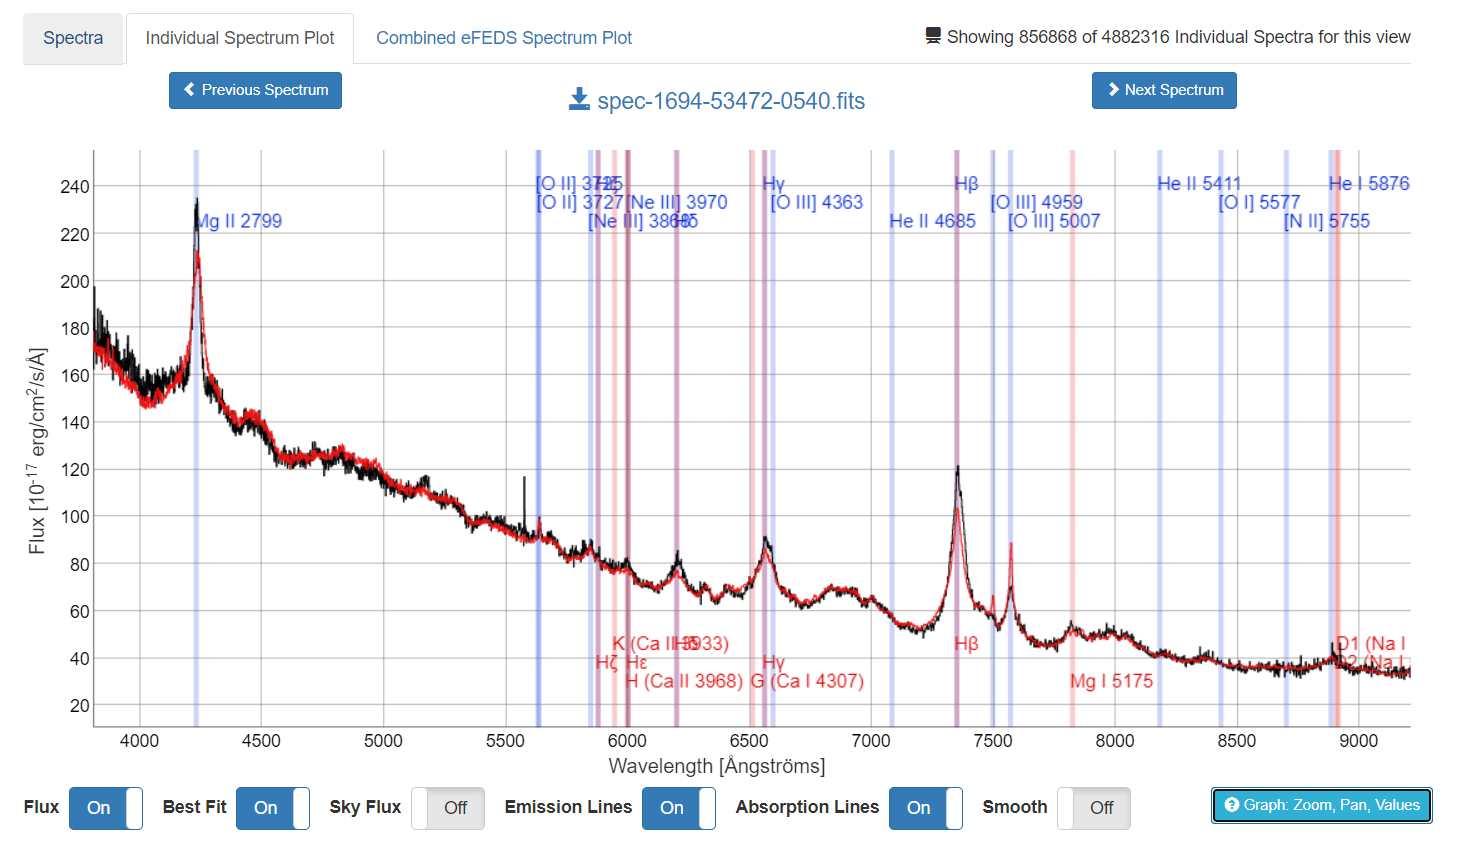

Part f) of the assignment asks to create some plots using Python which is why this report is in Jupyter in the first place. Simpleplots for all spectra are shown bellow. 

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import glob

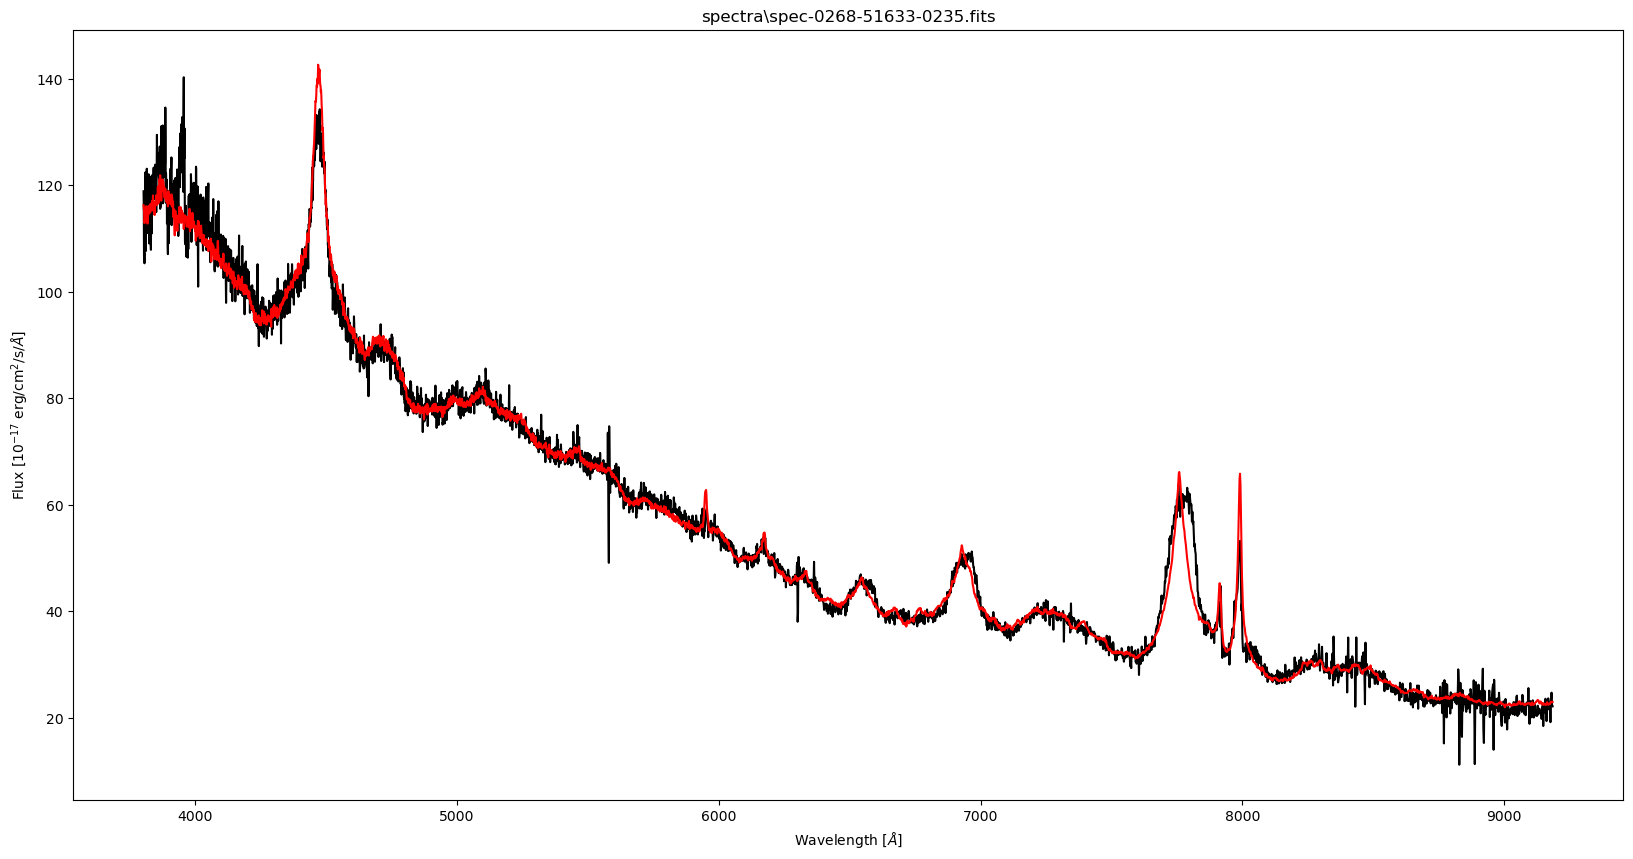

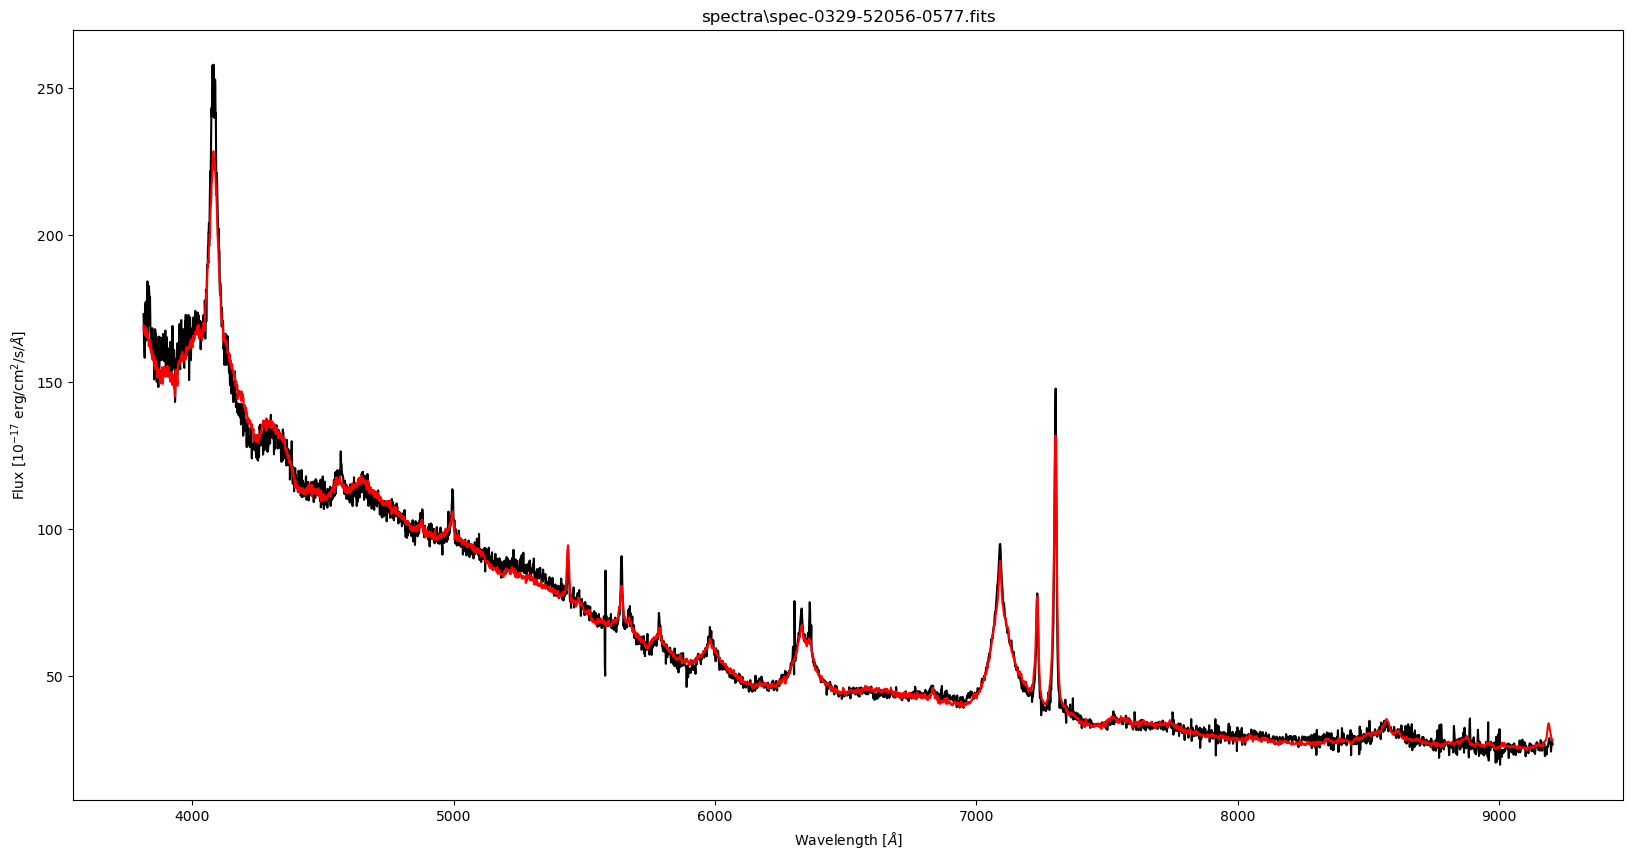

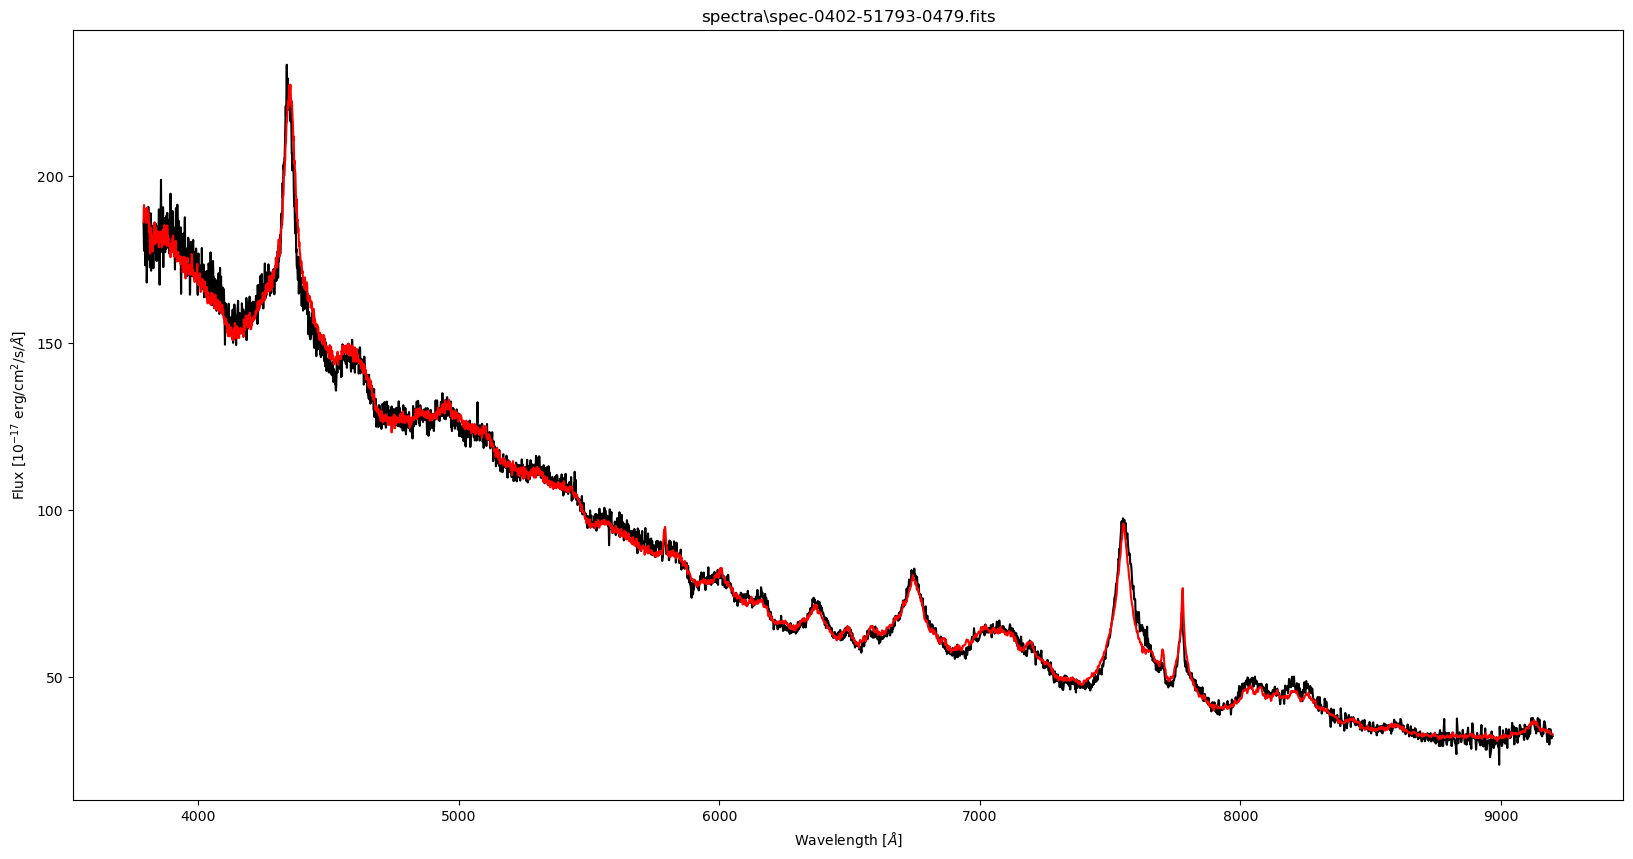

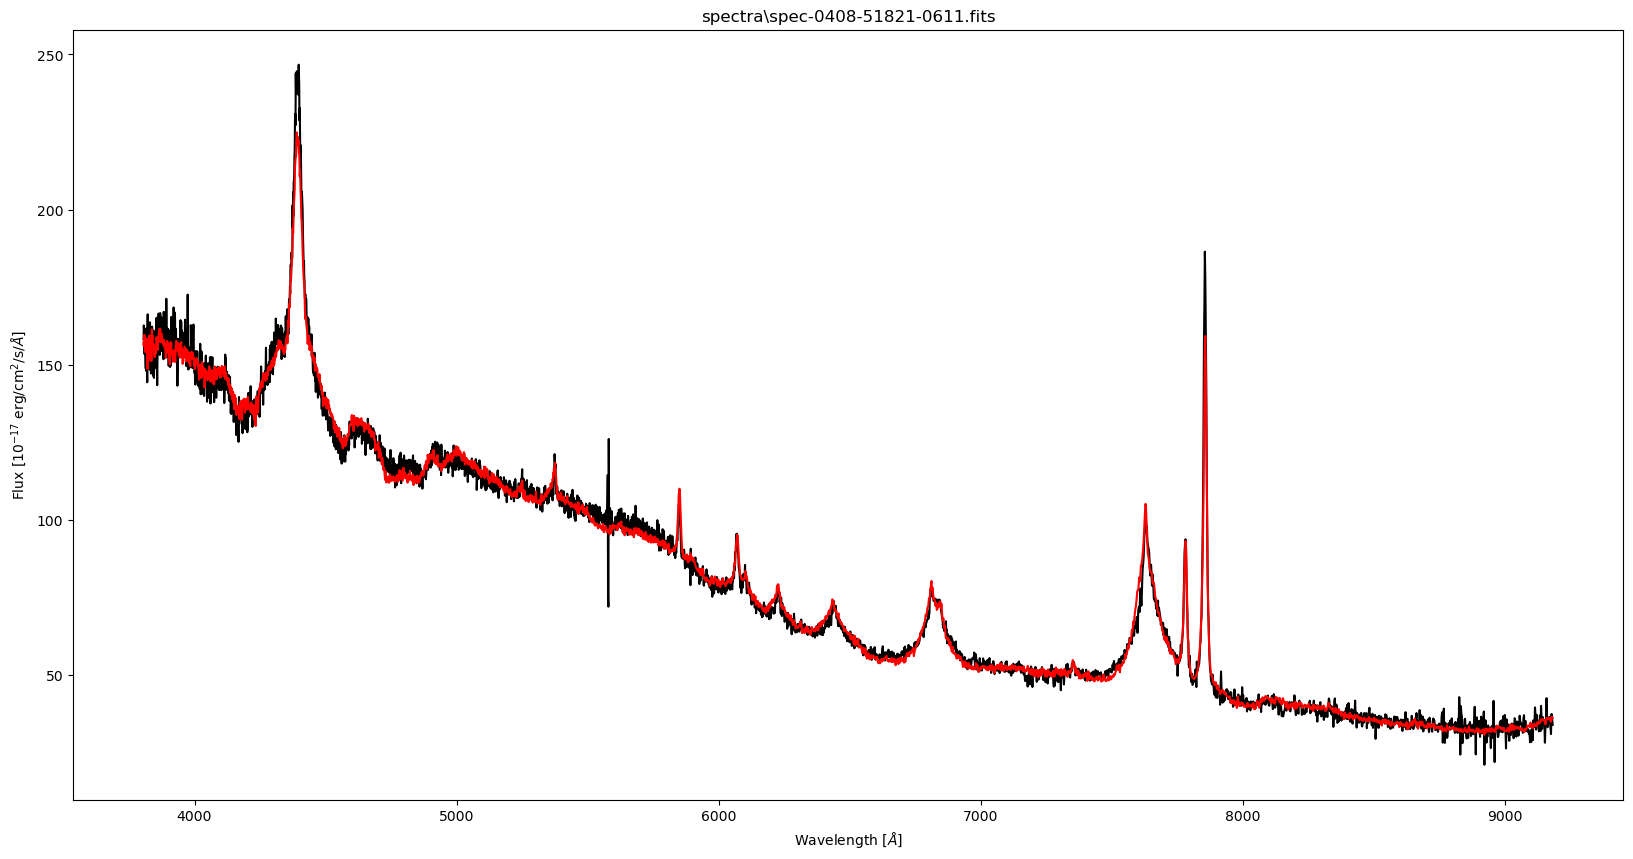

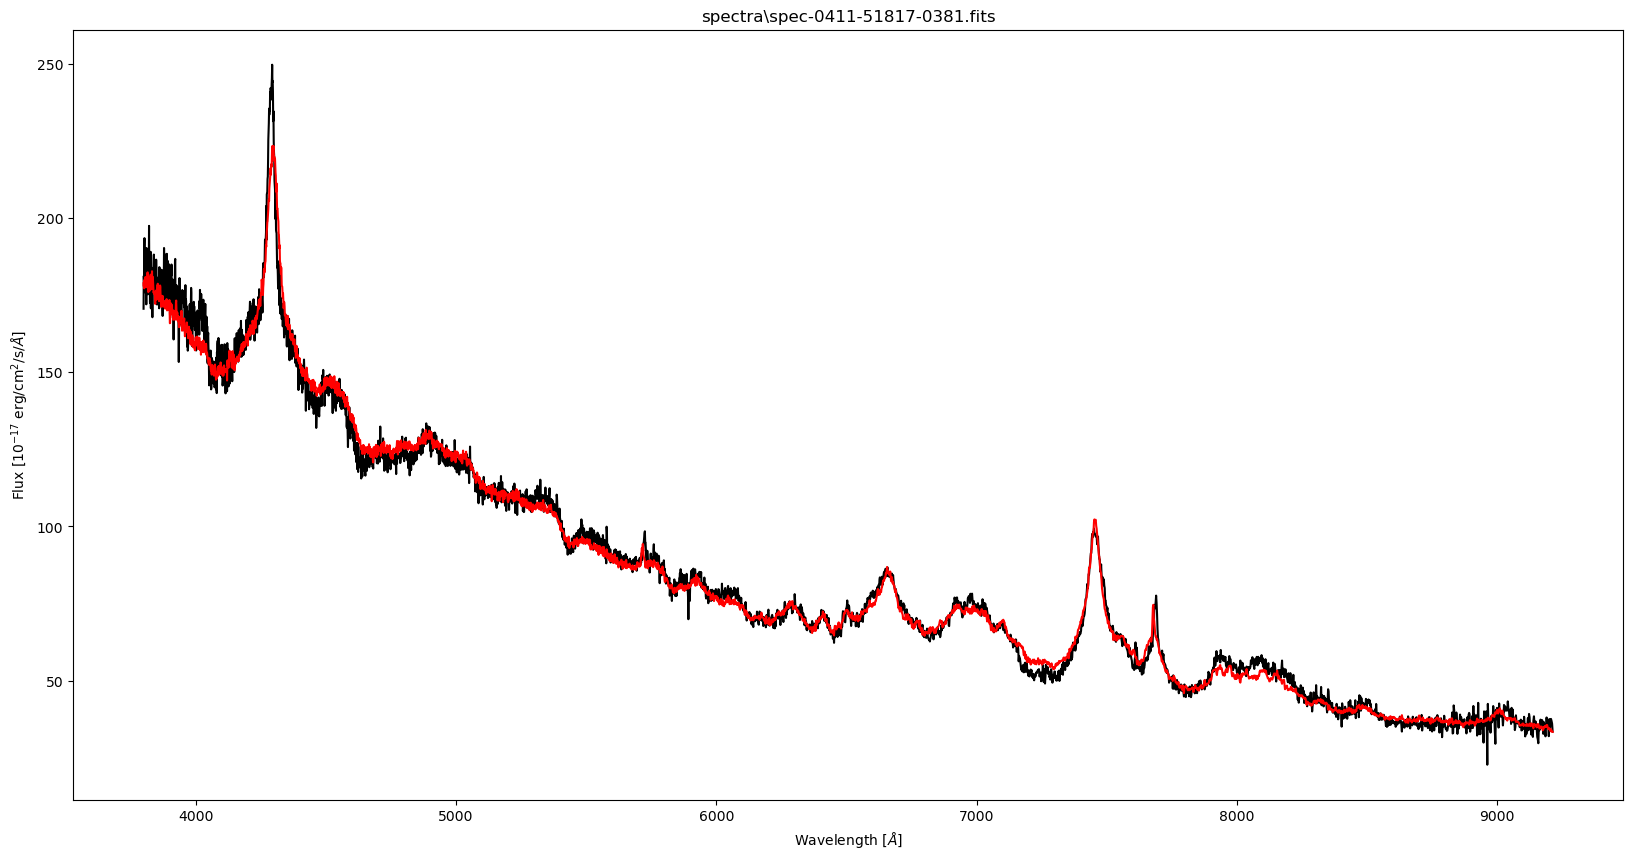

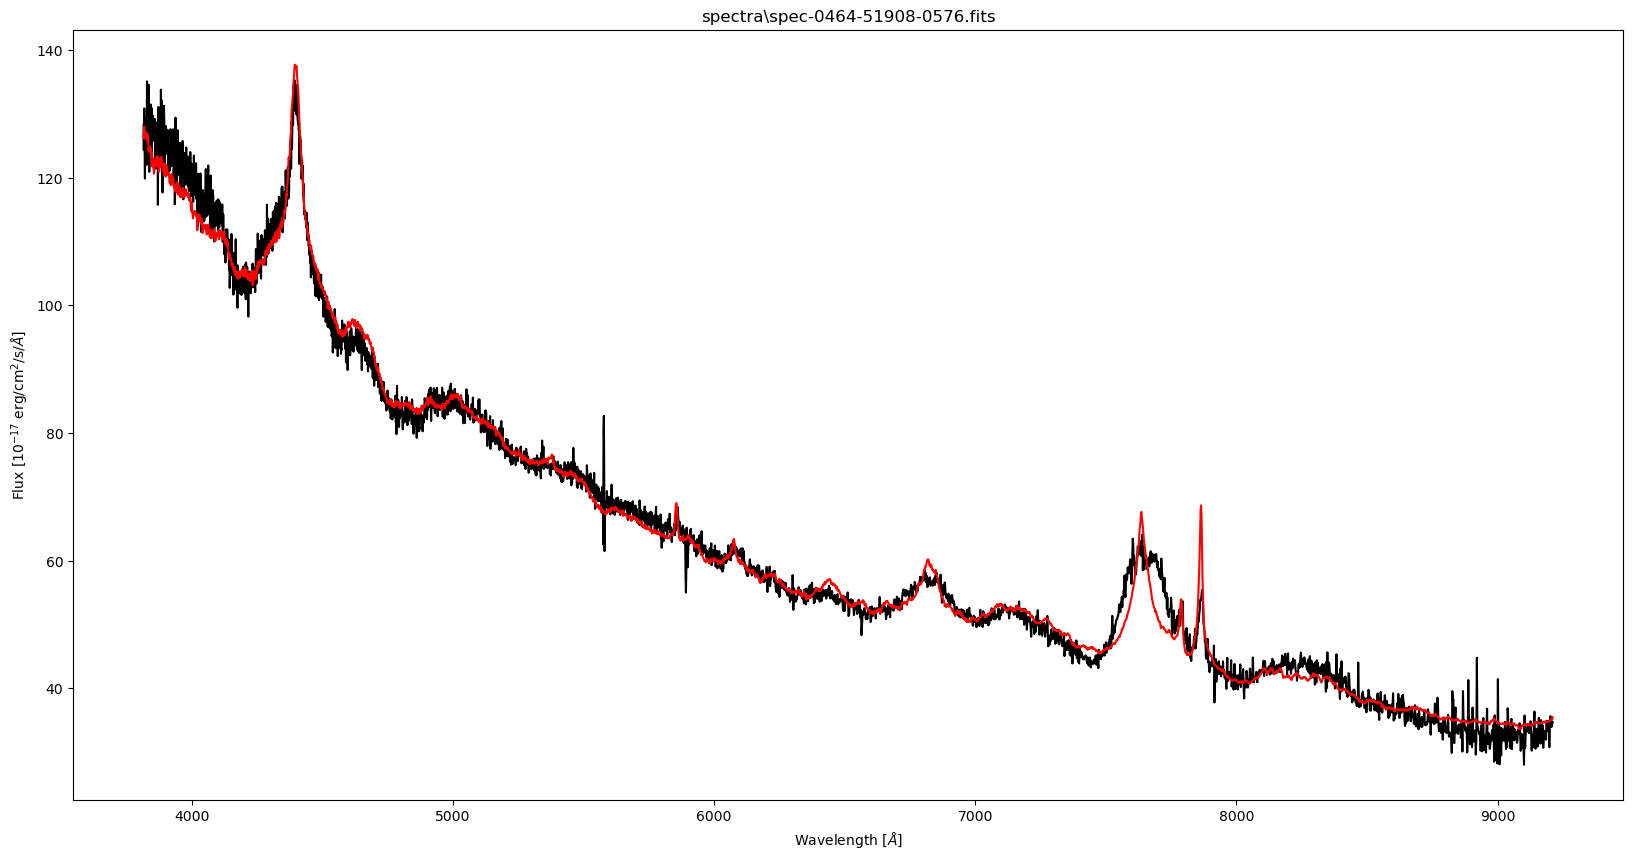

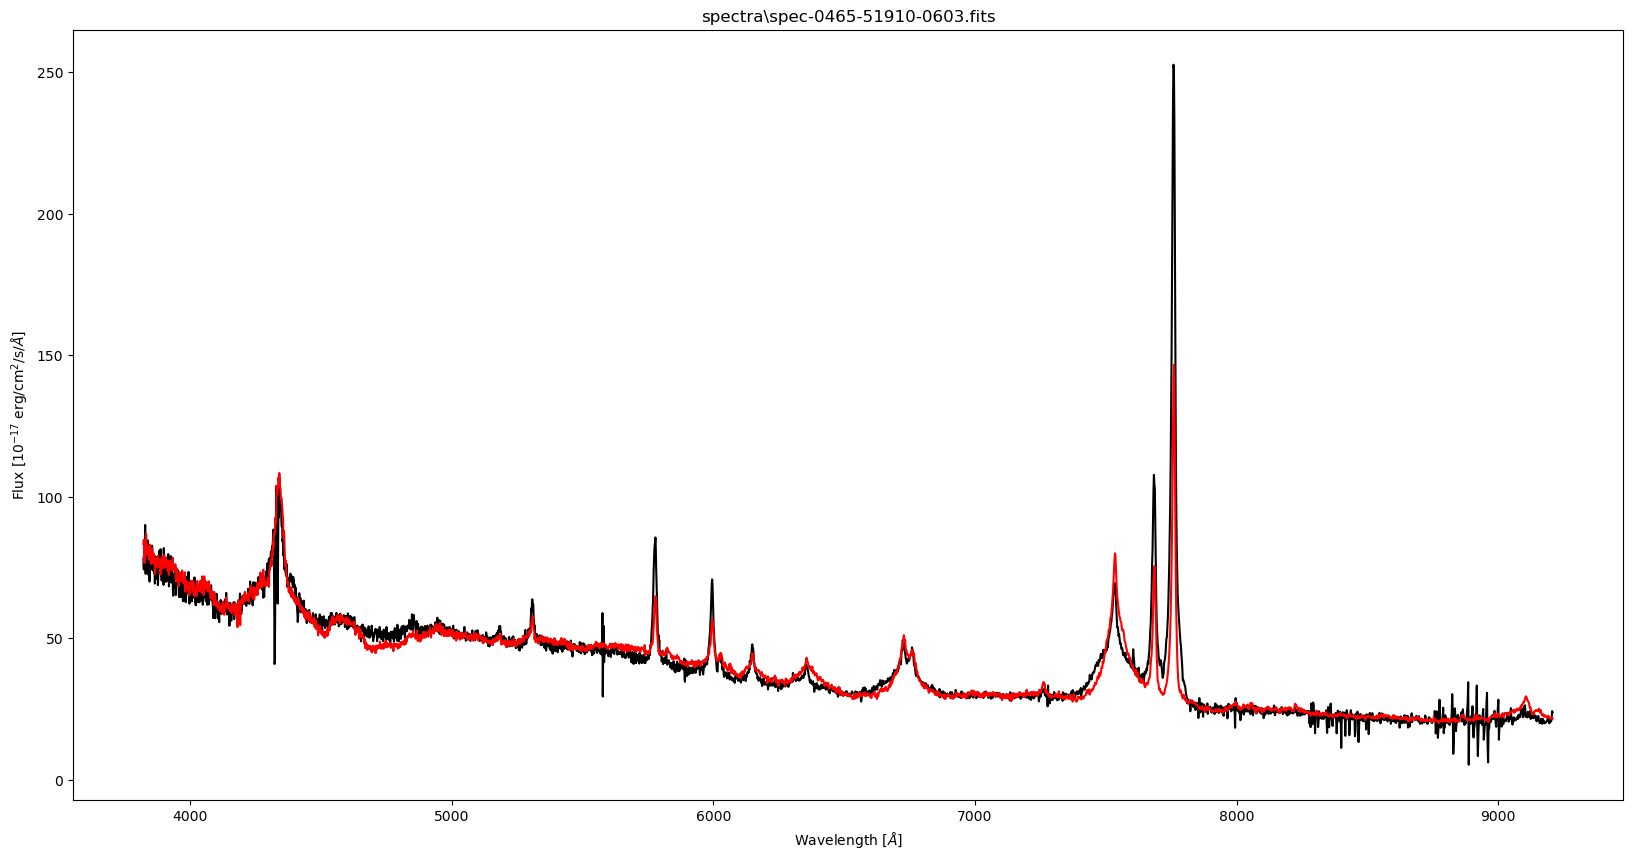

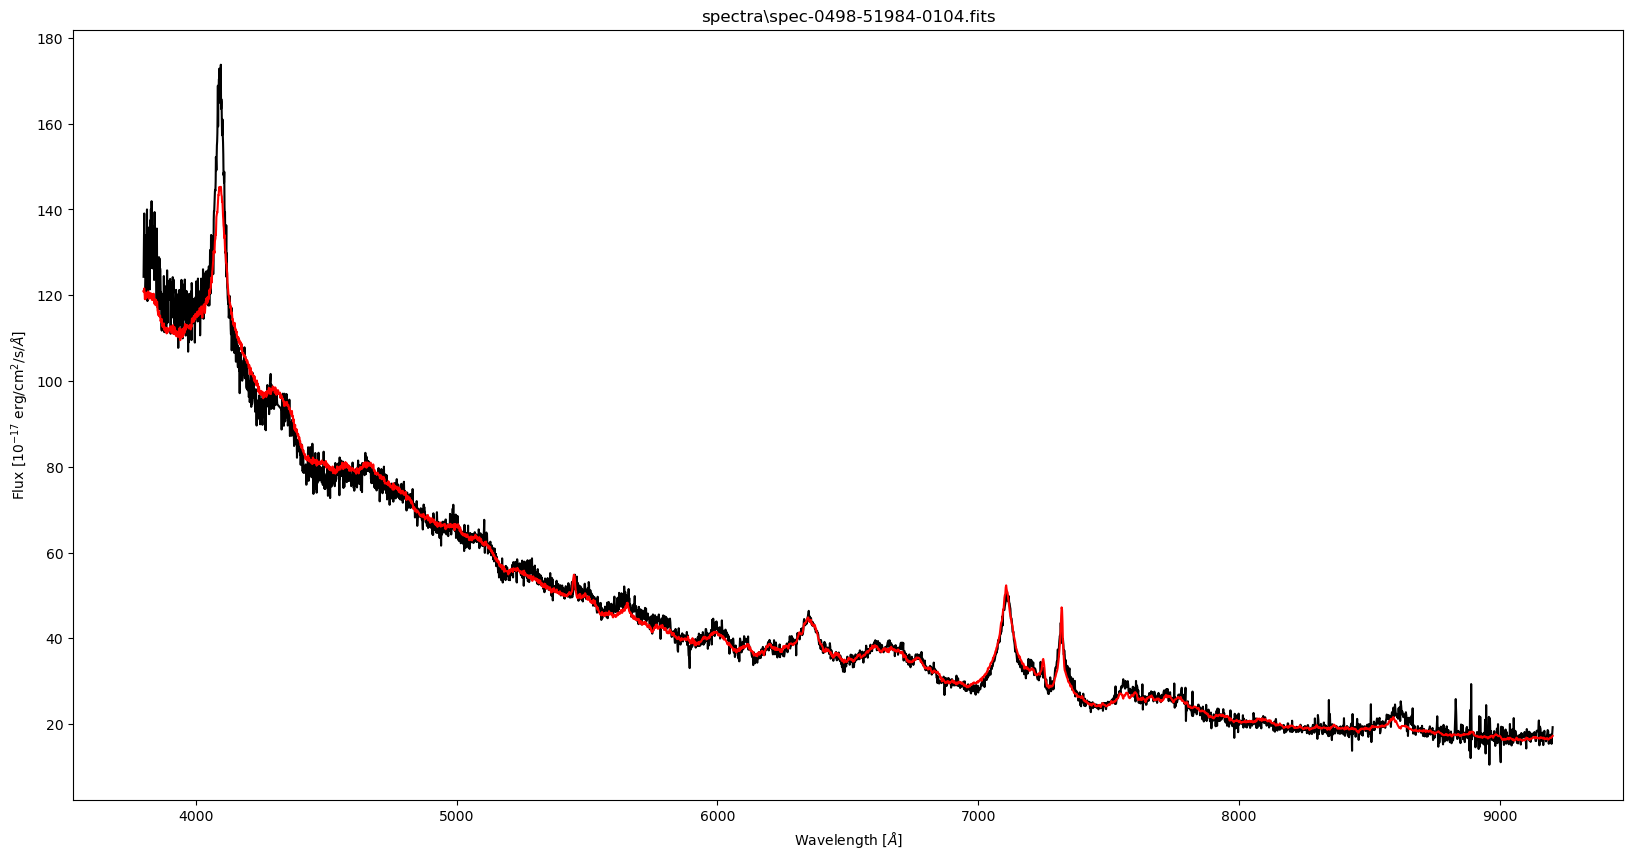

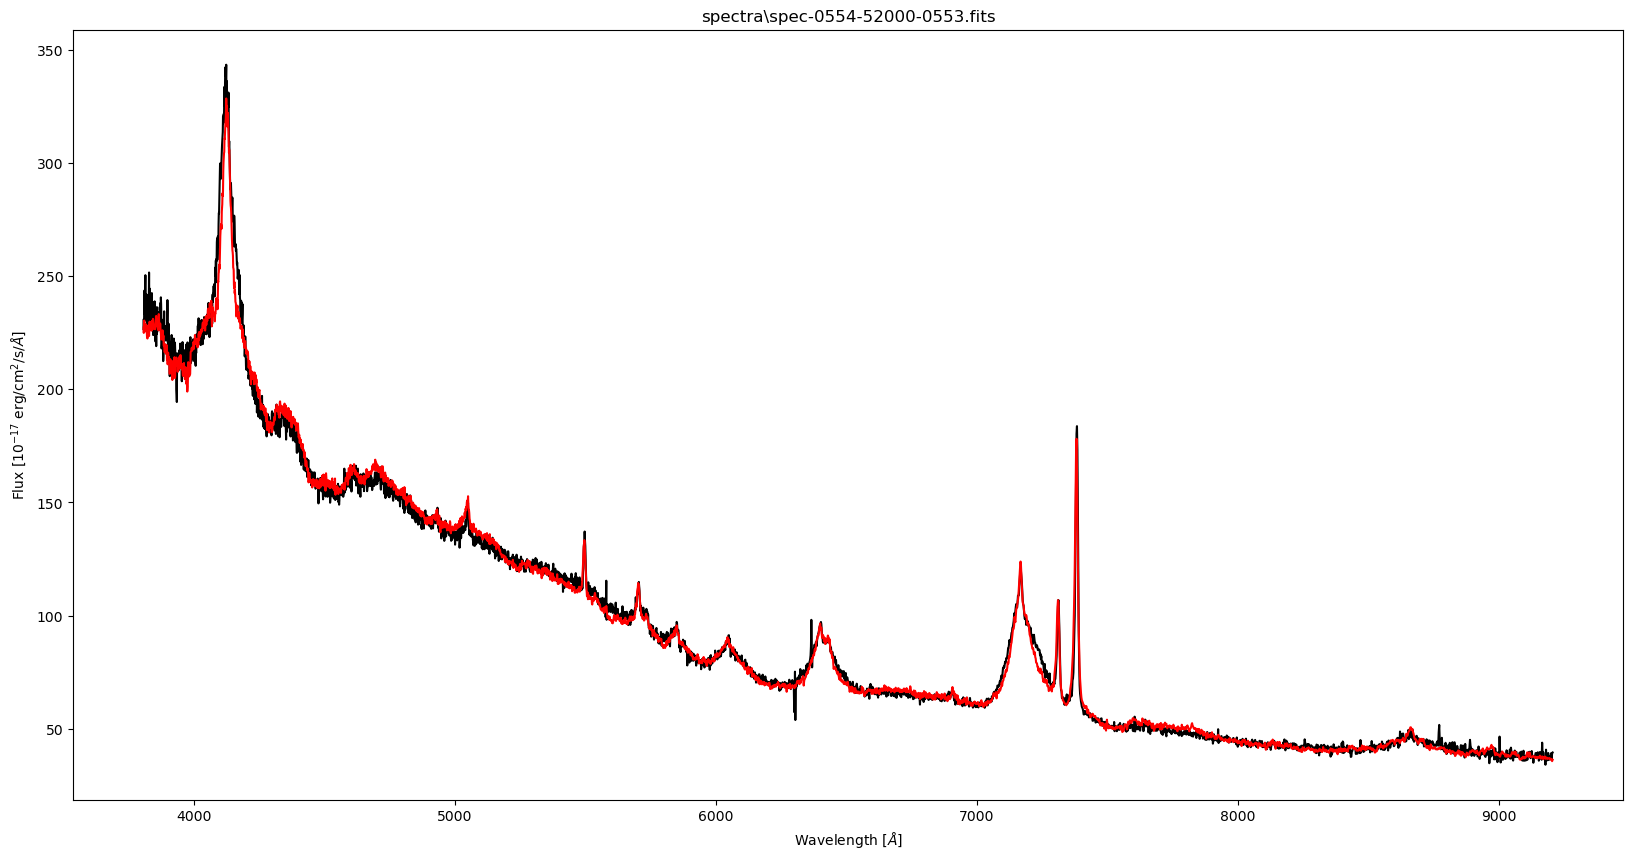

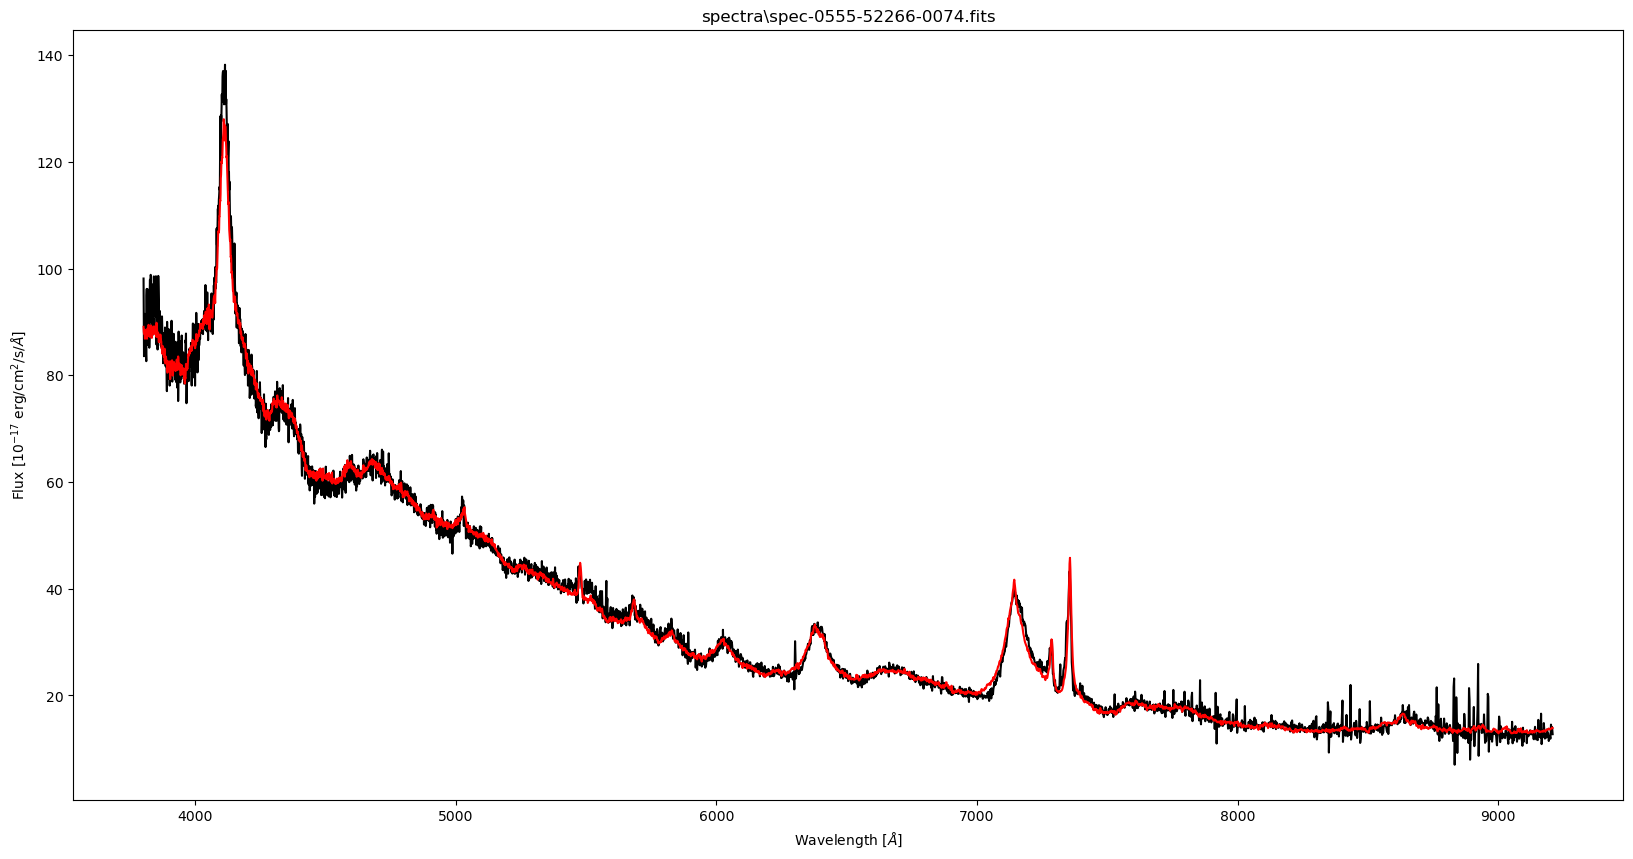

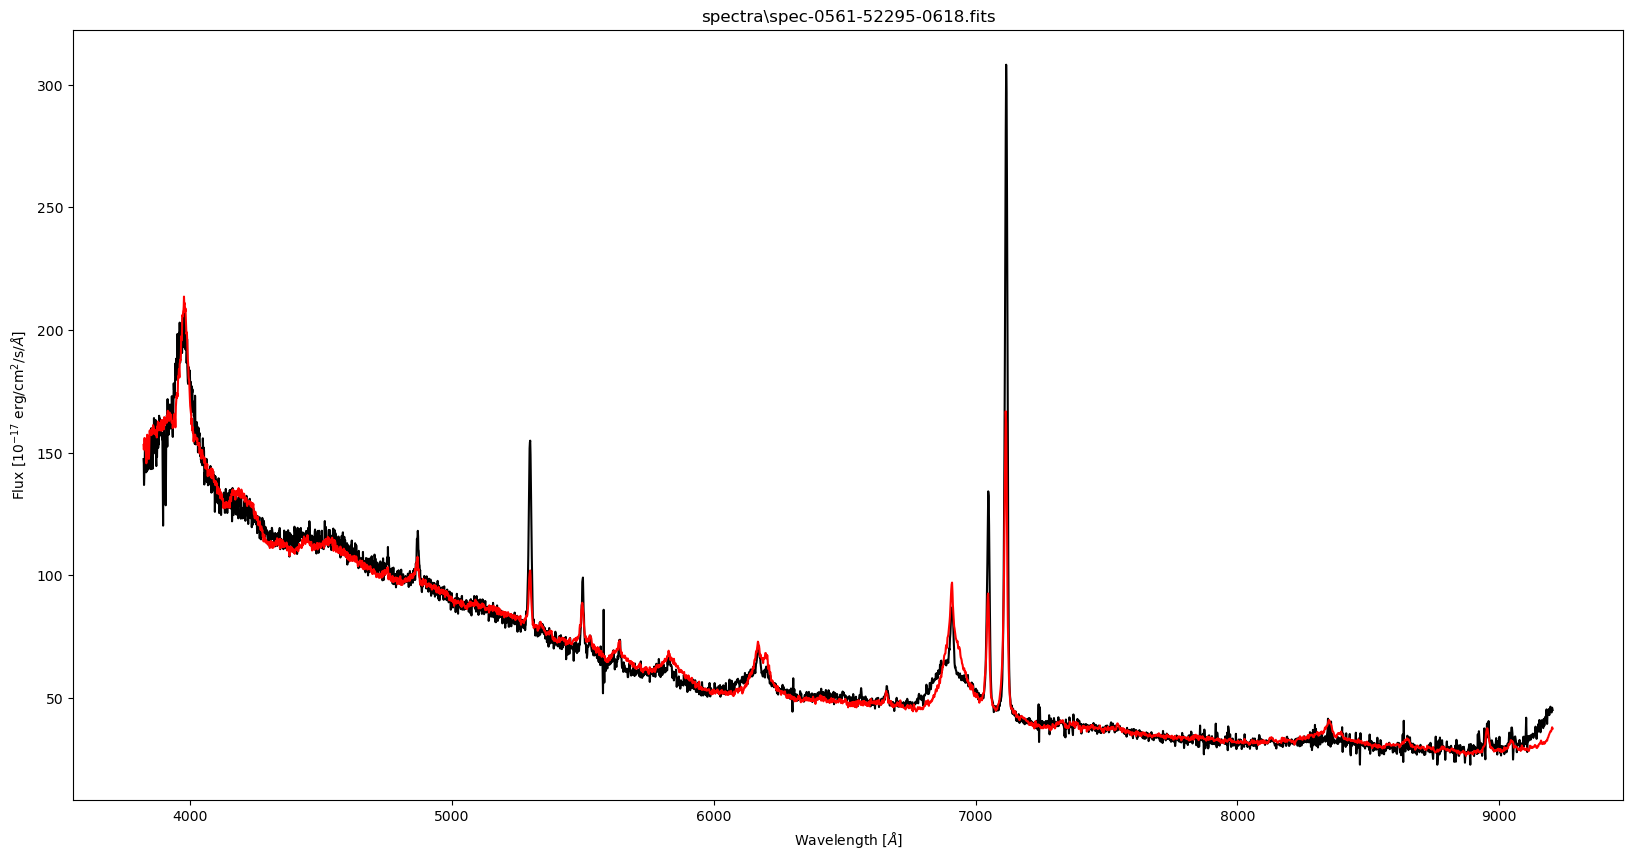

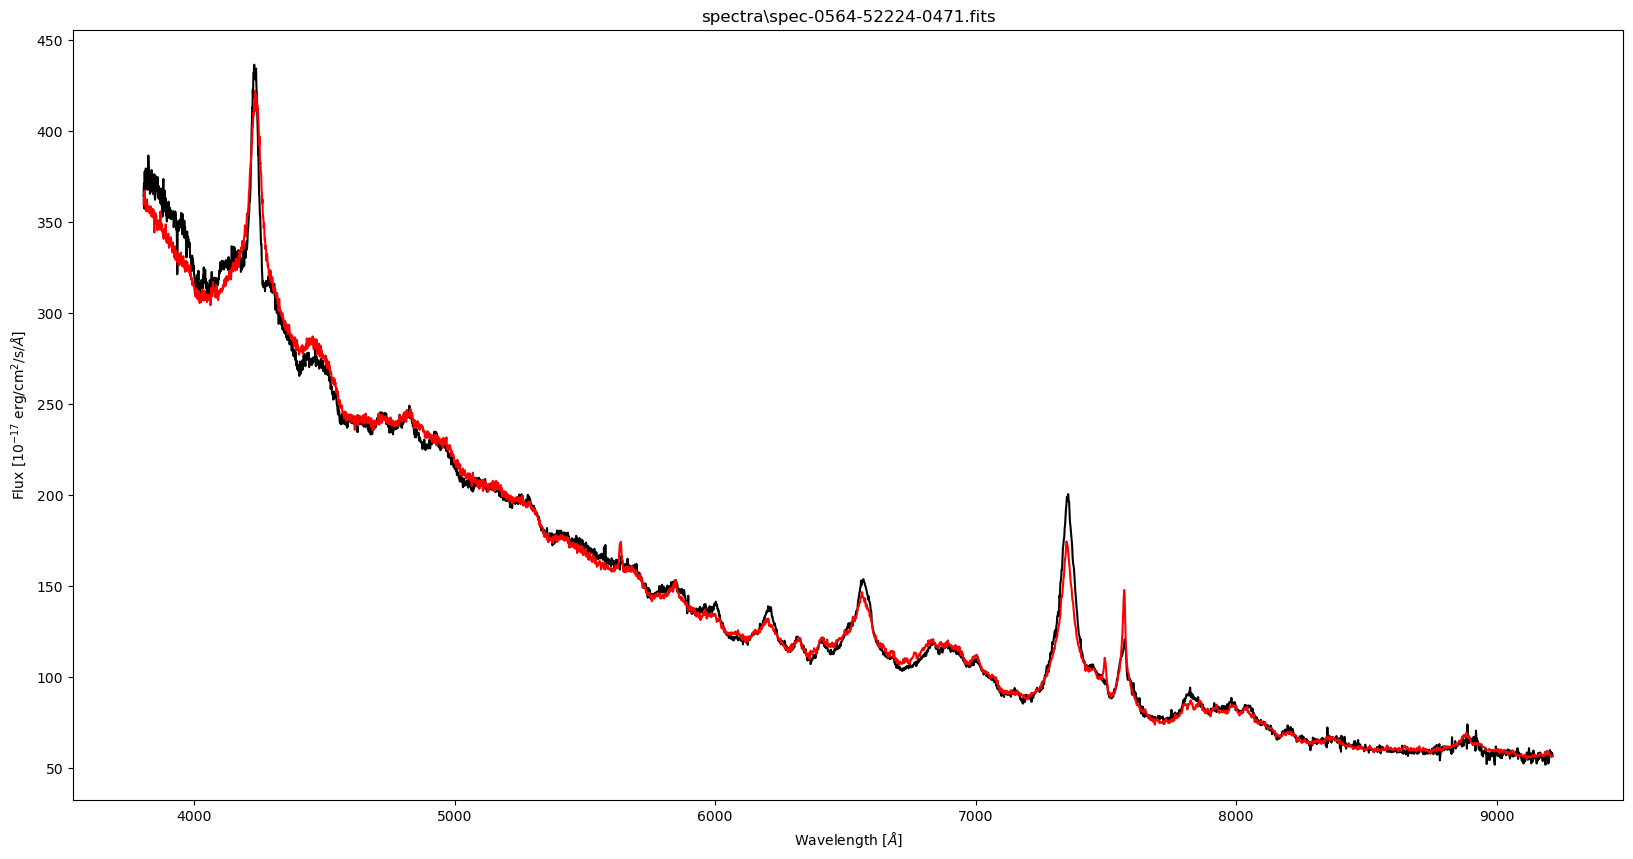

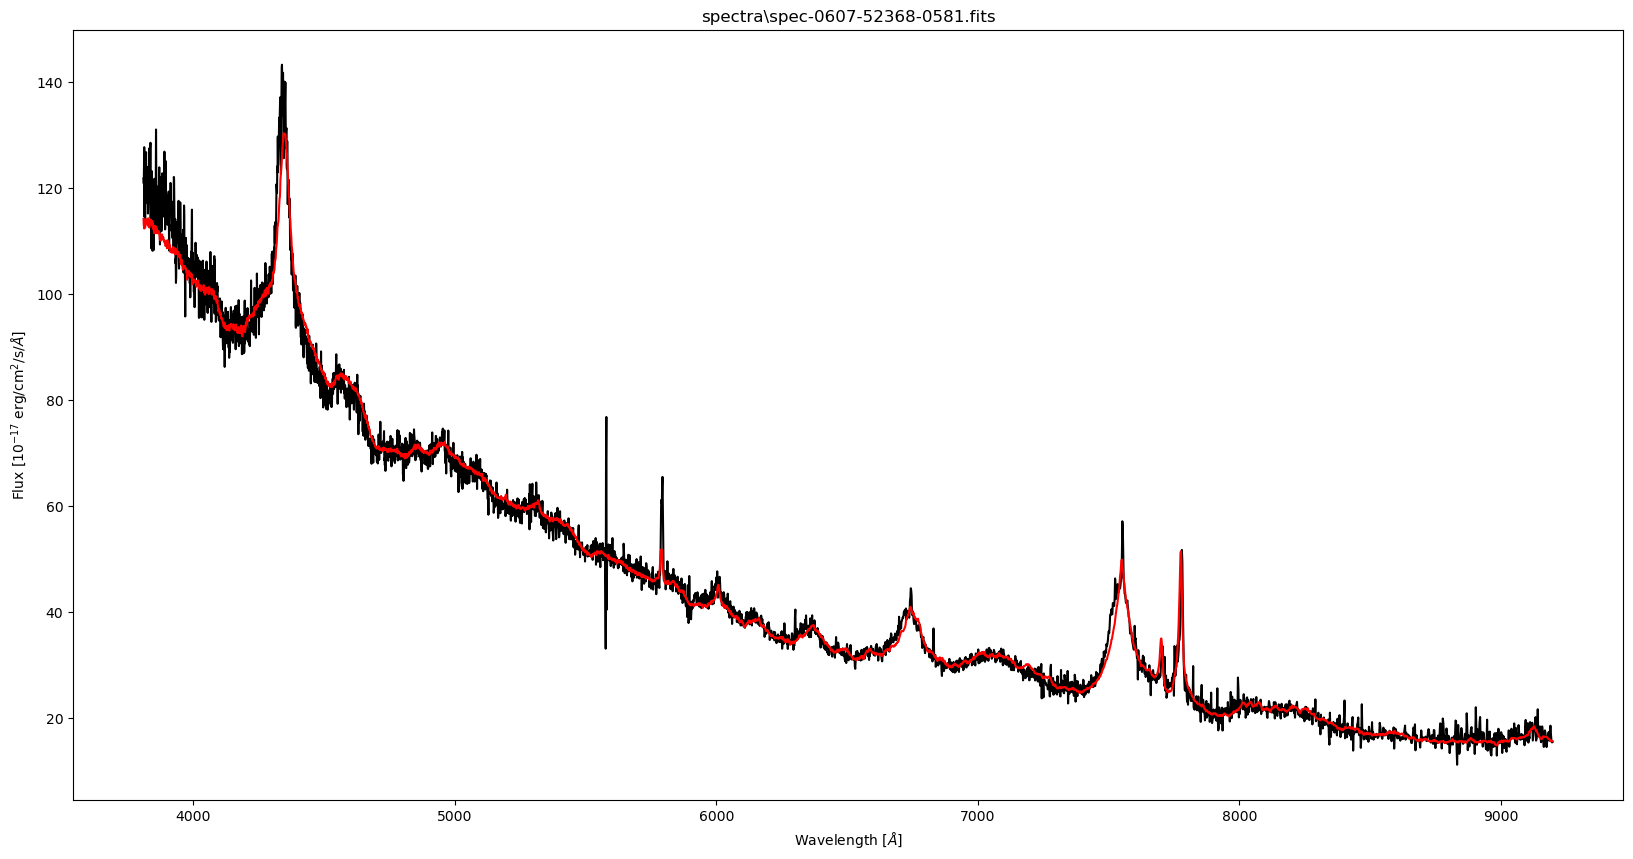

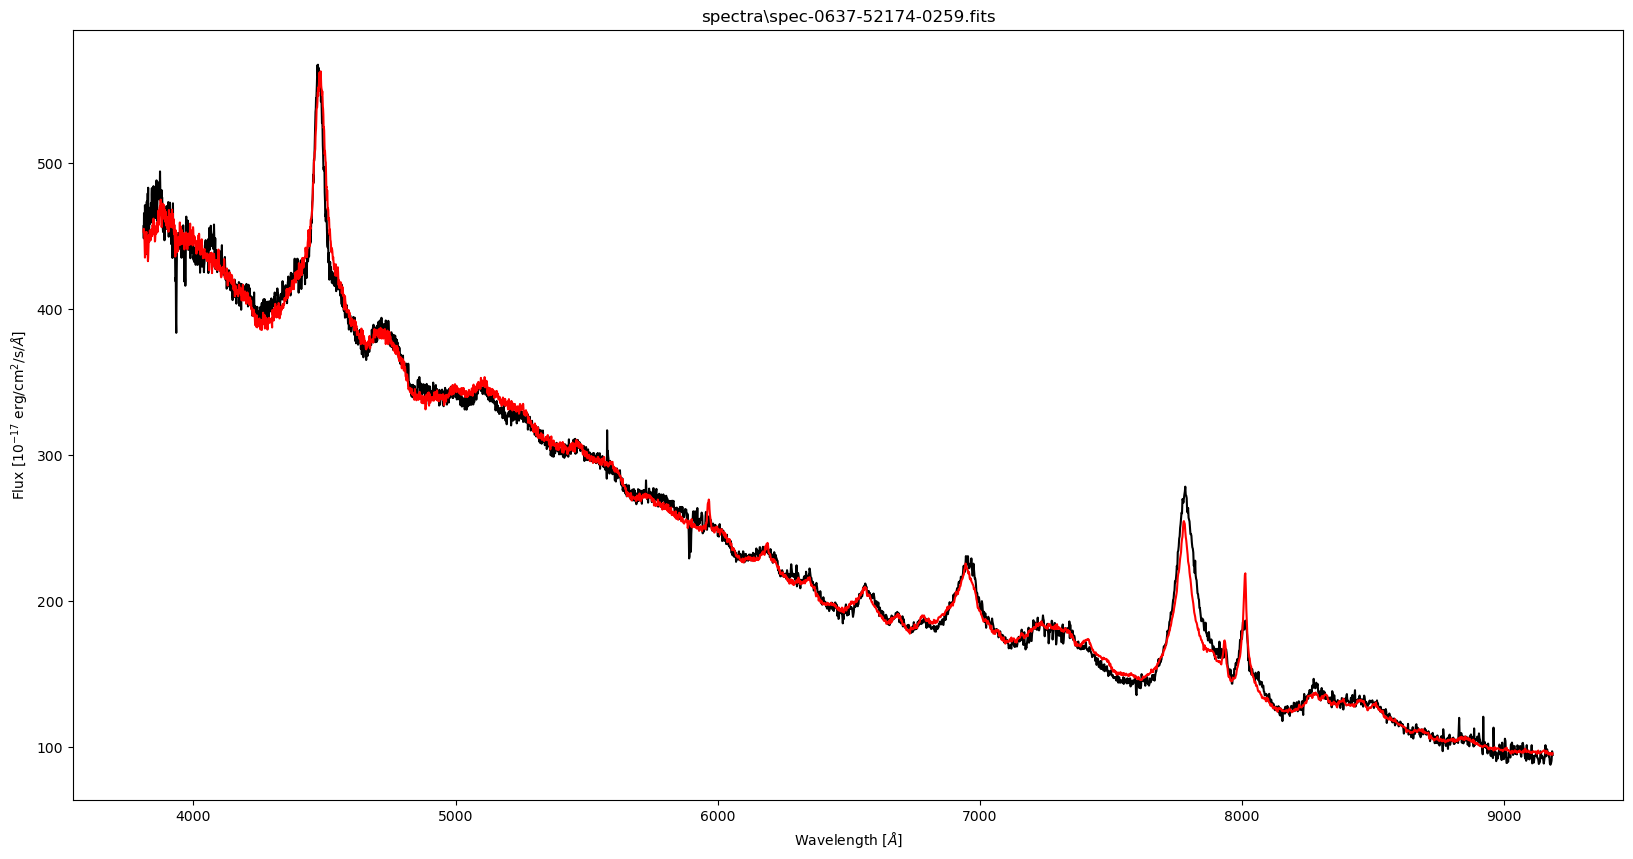

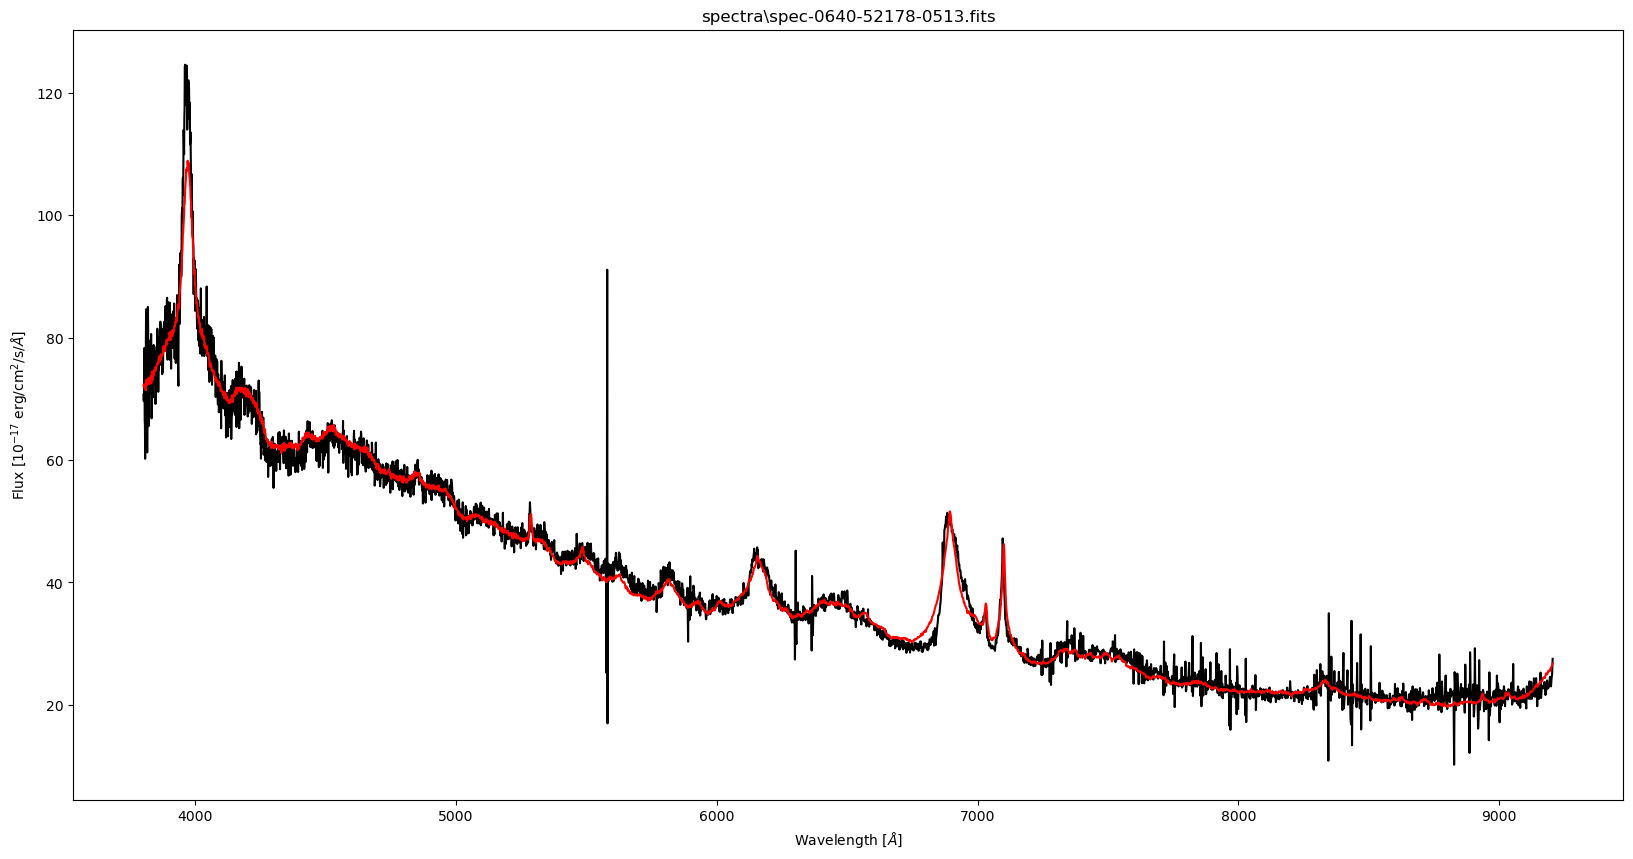

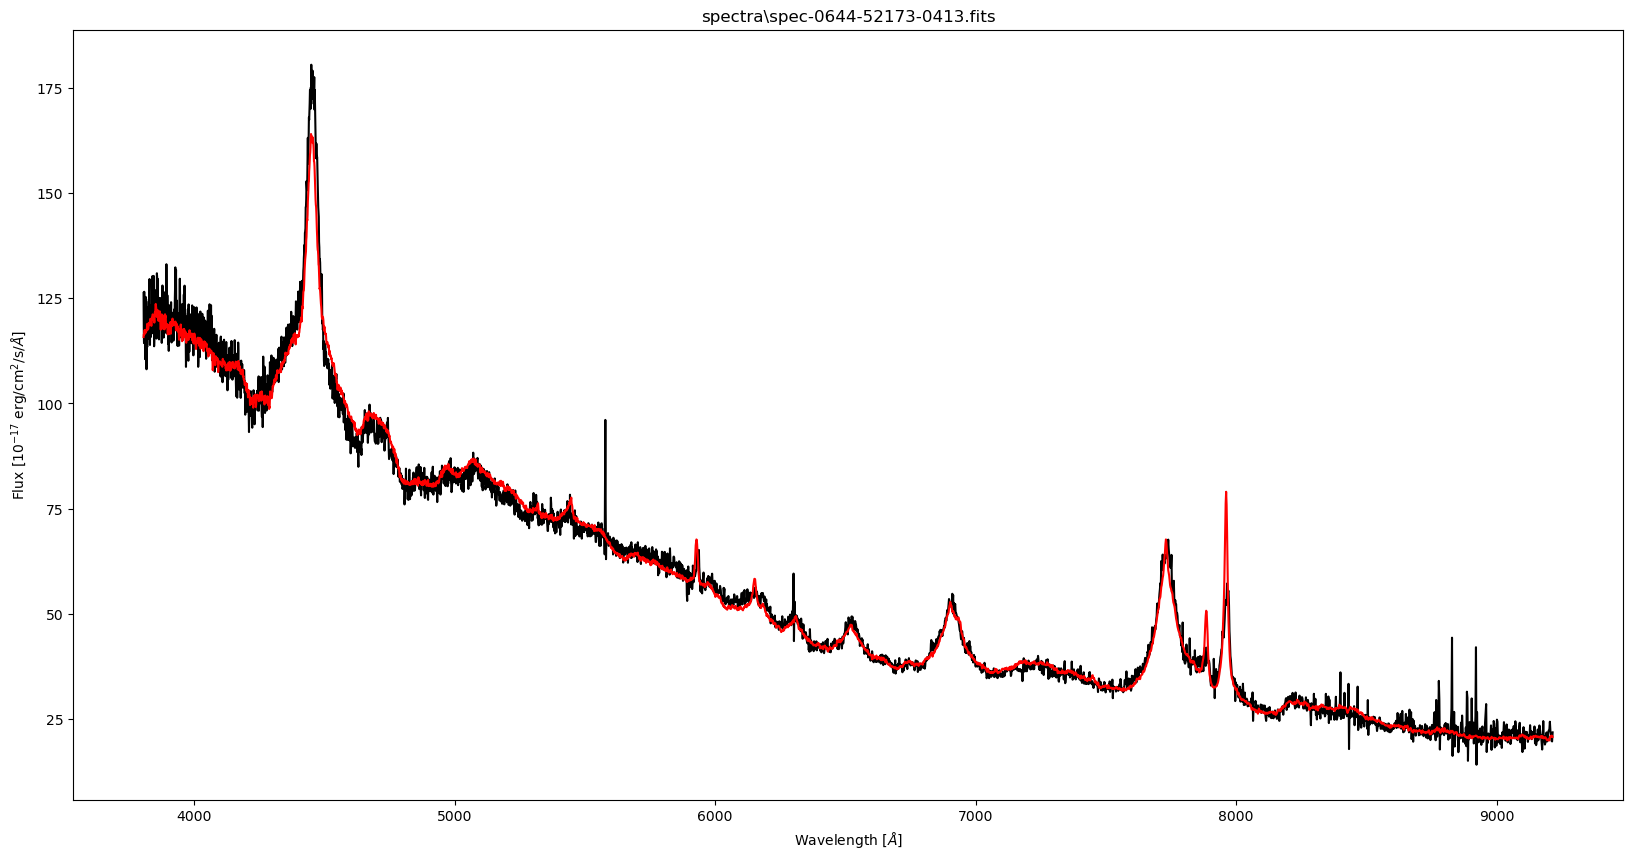

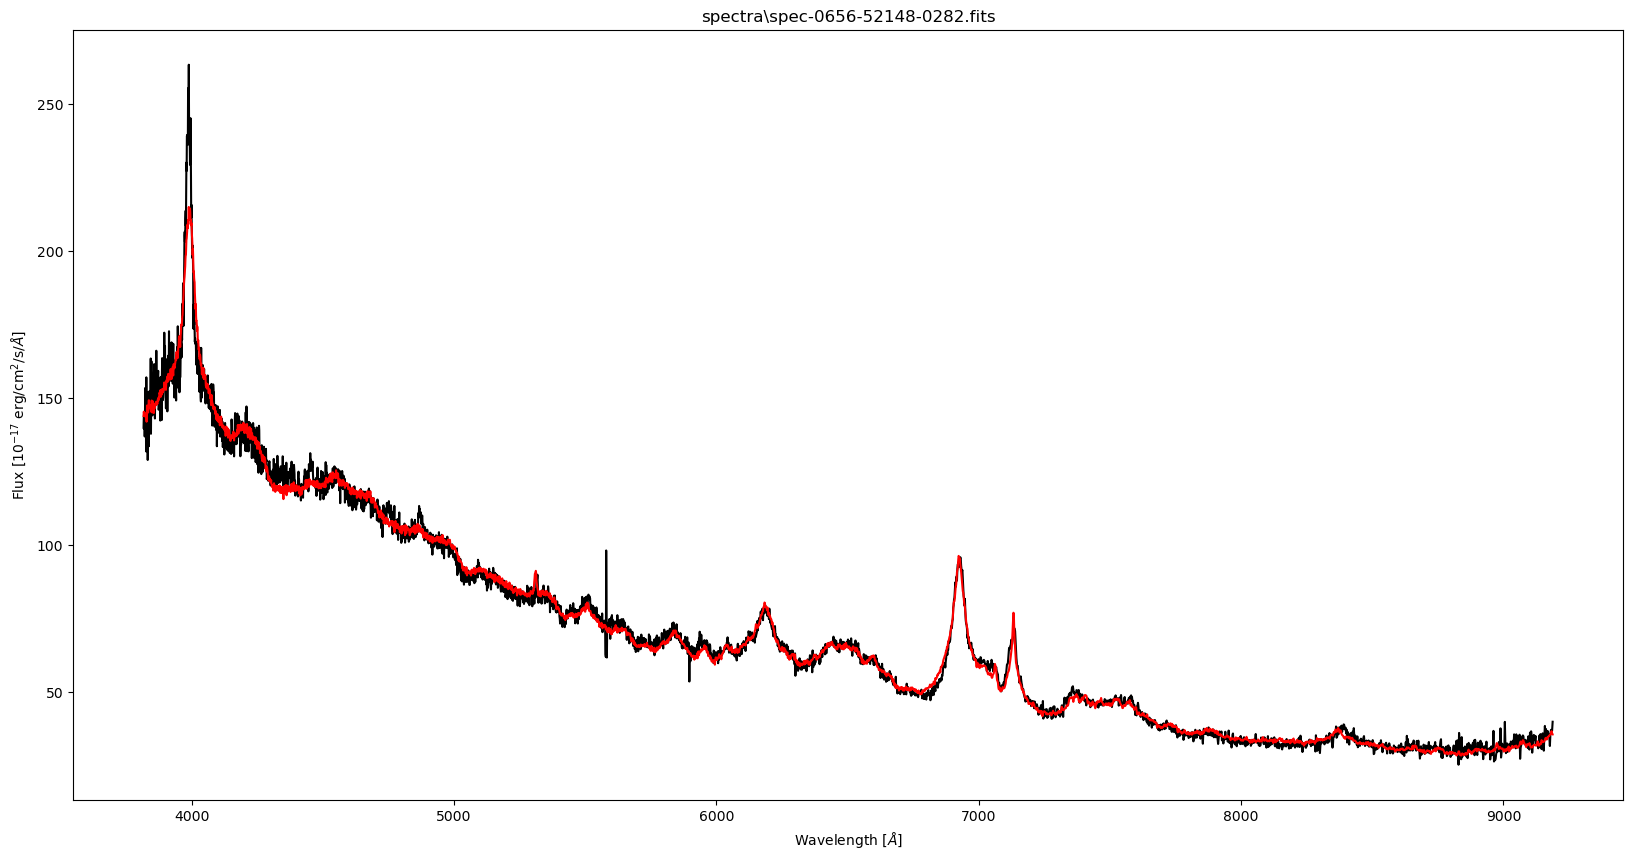

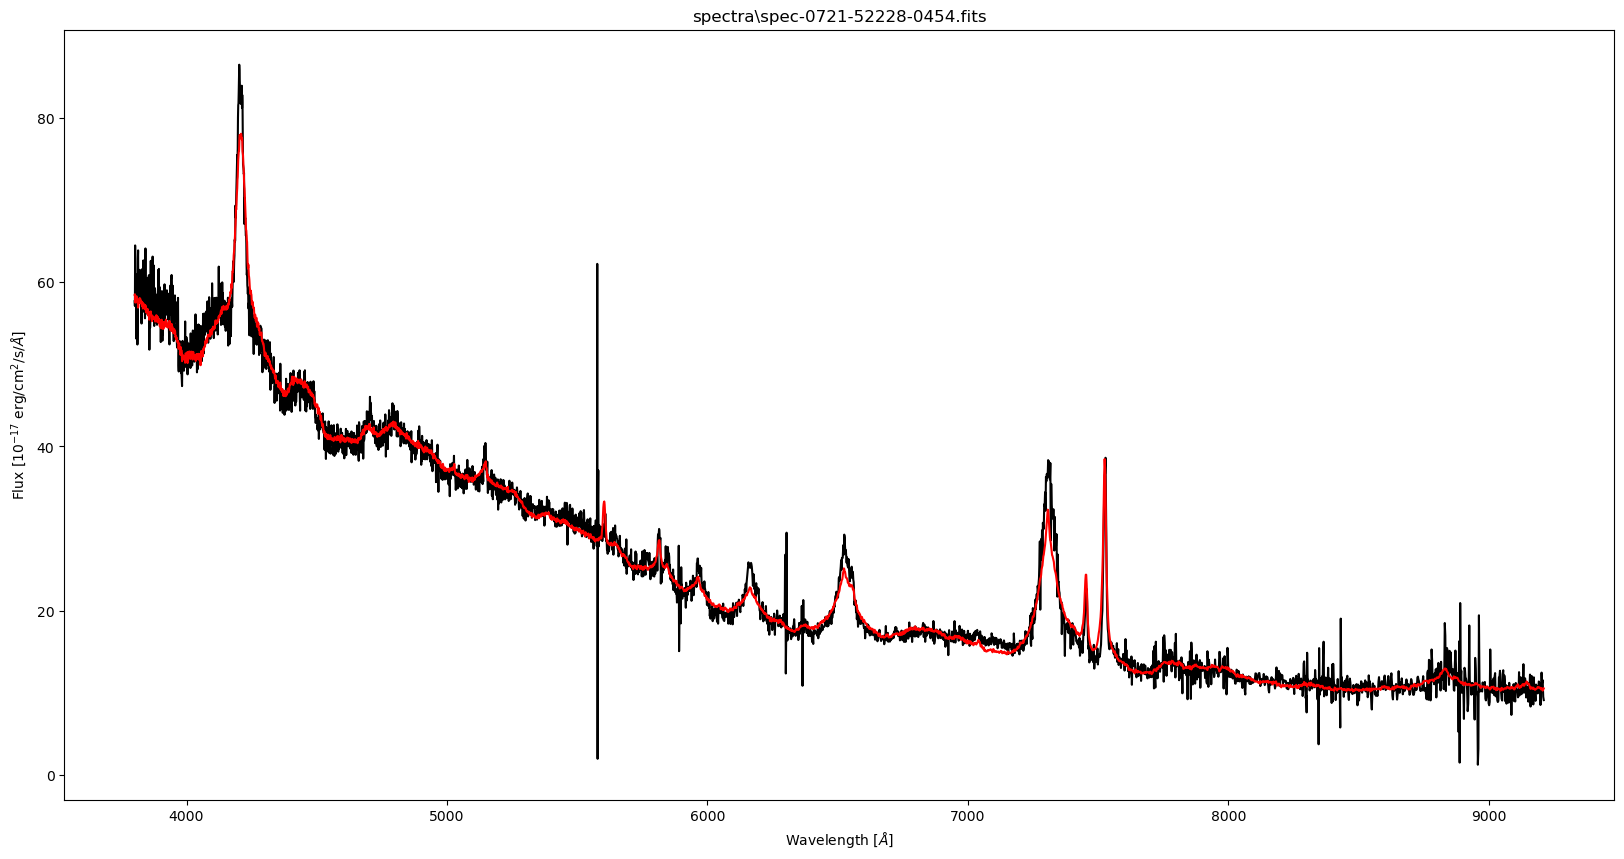

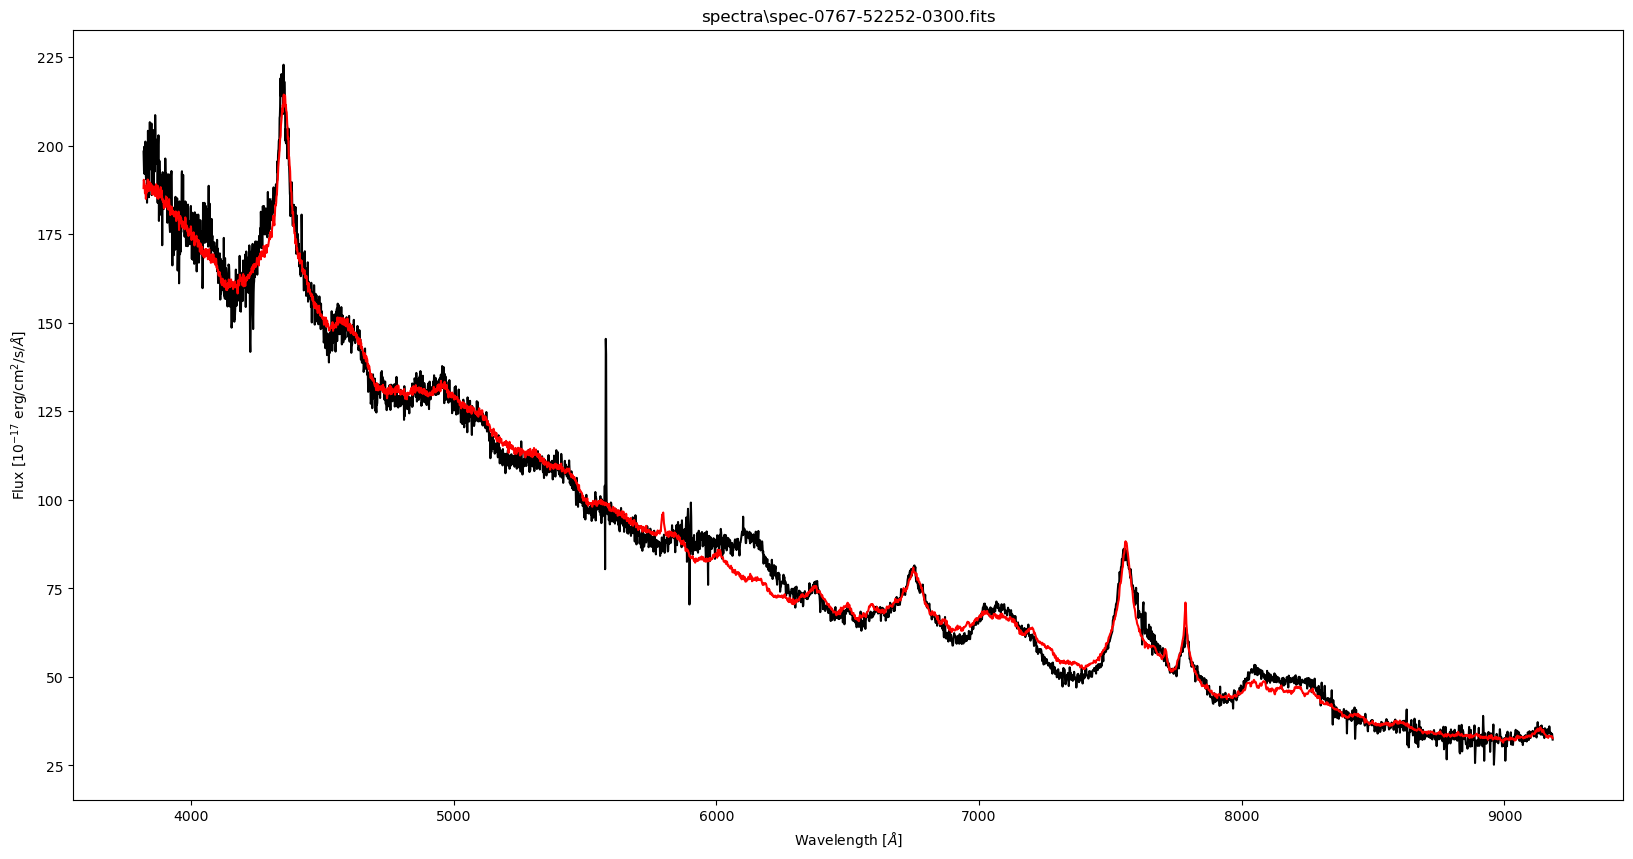

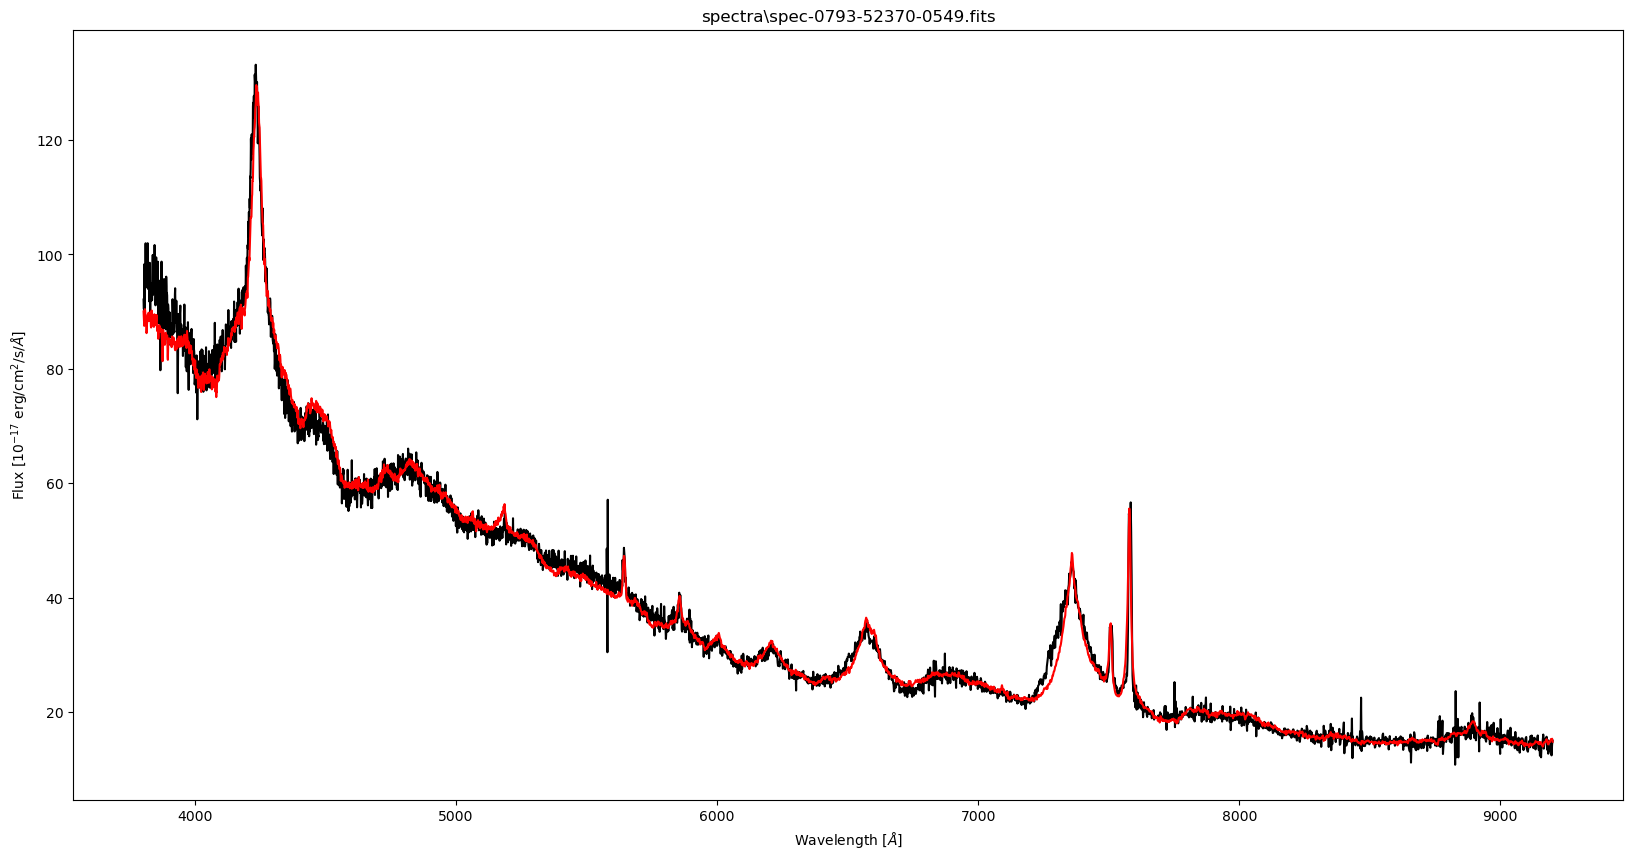

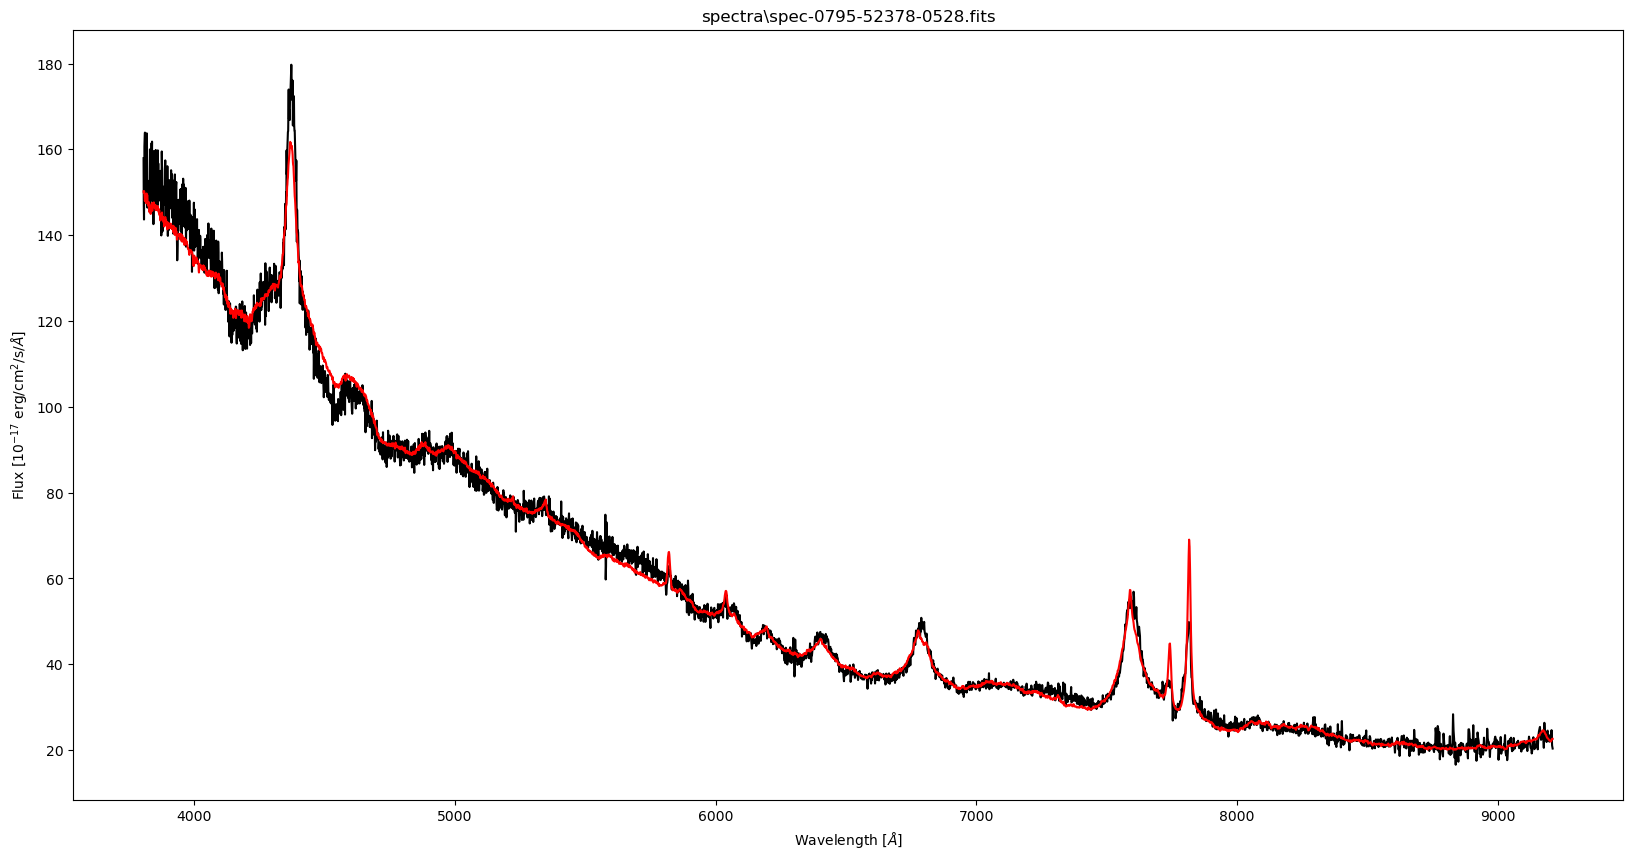

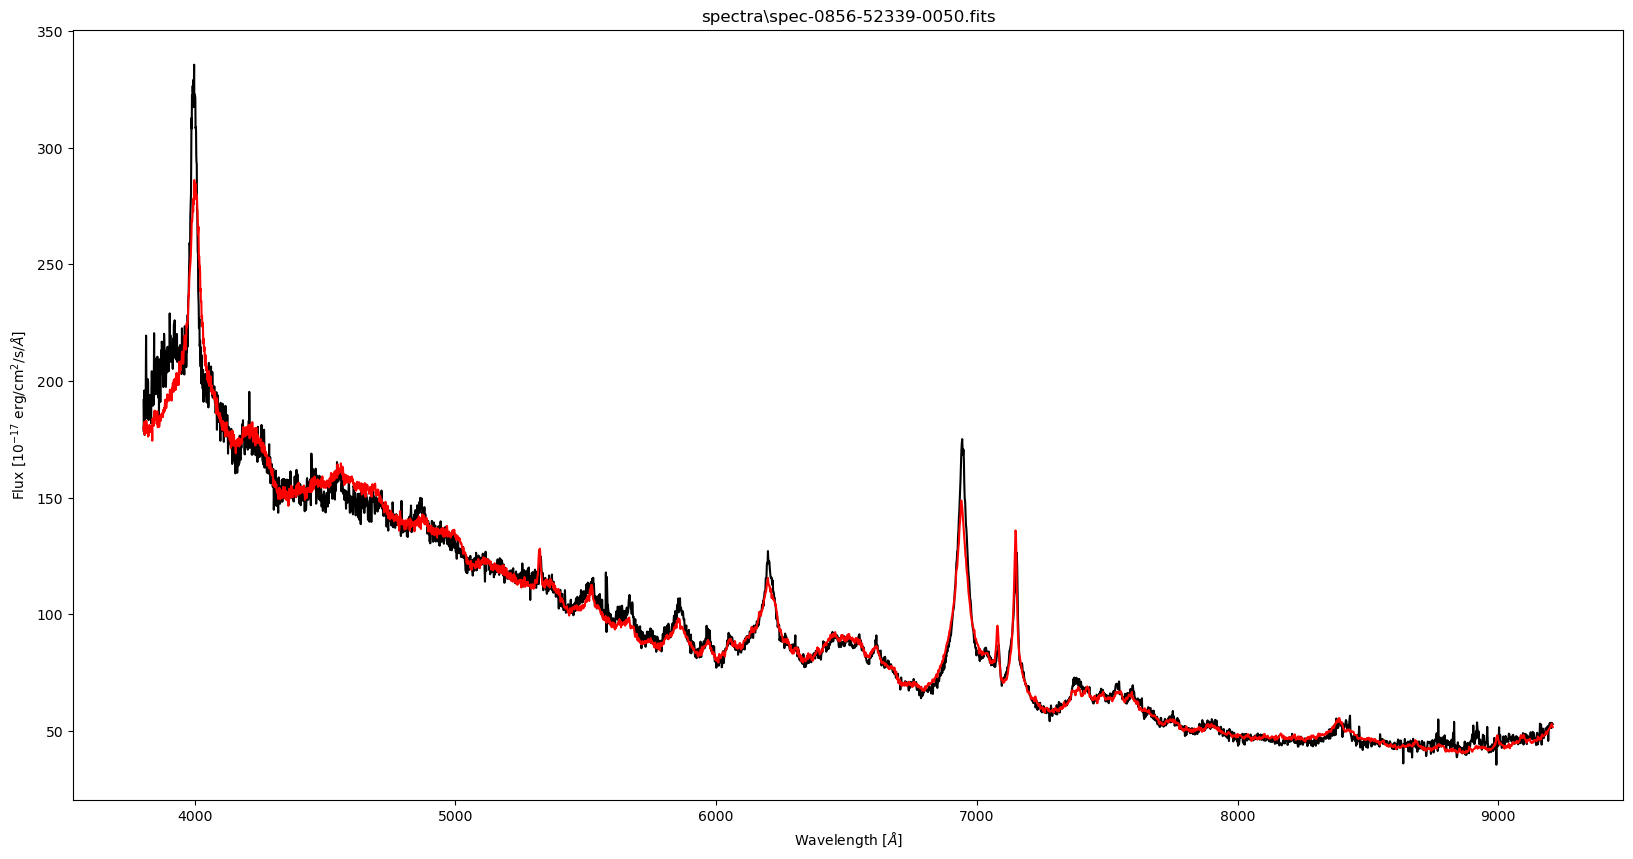

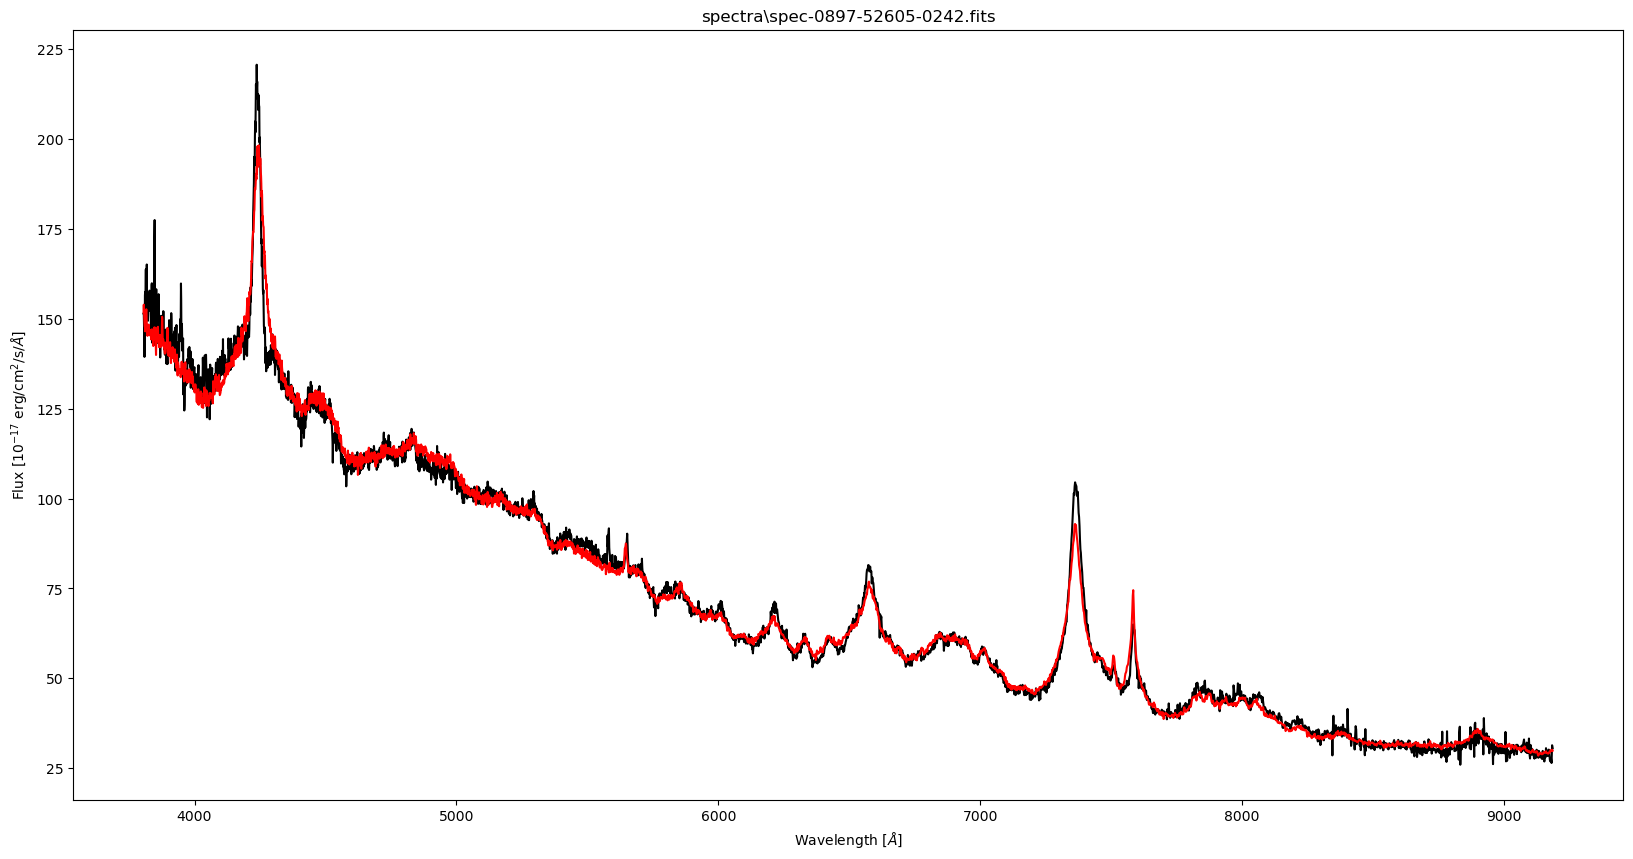

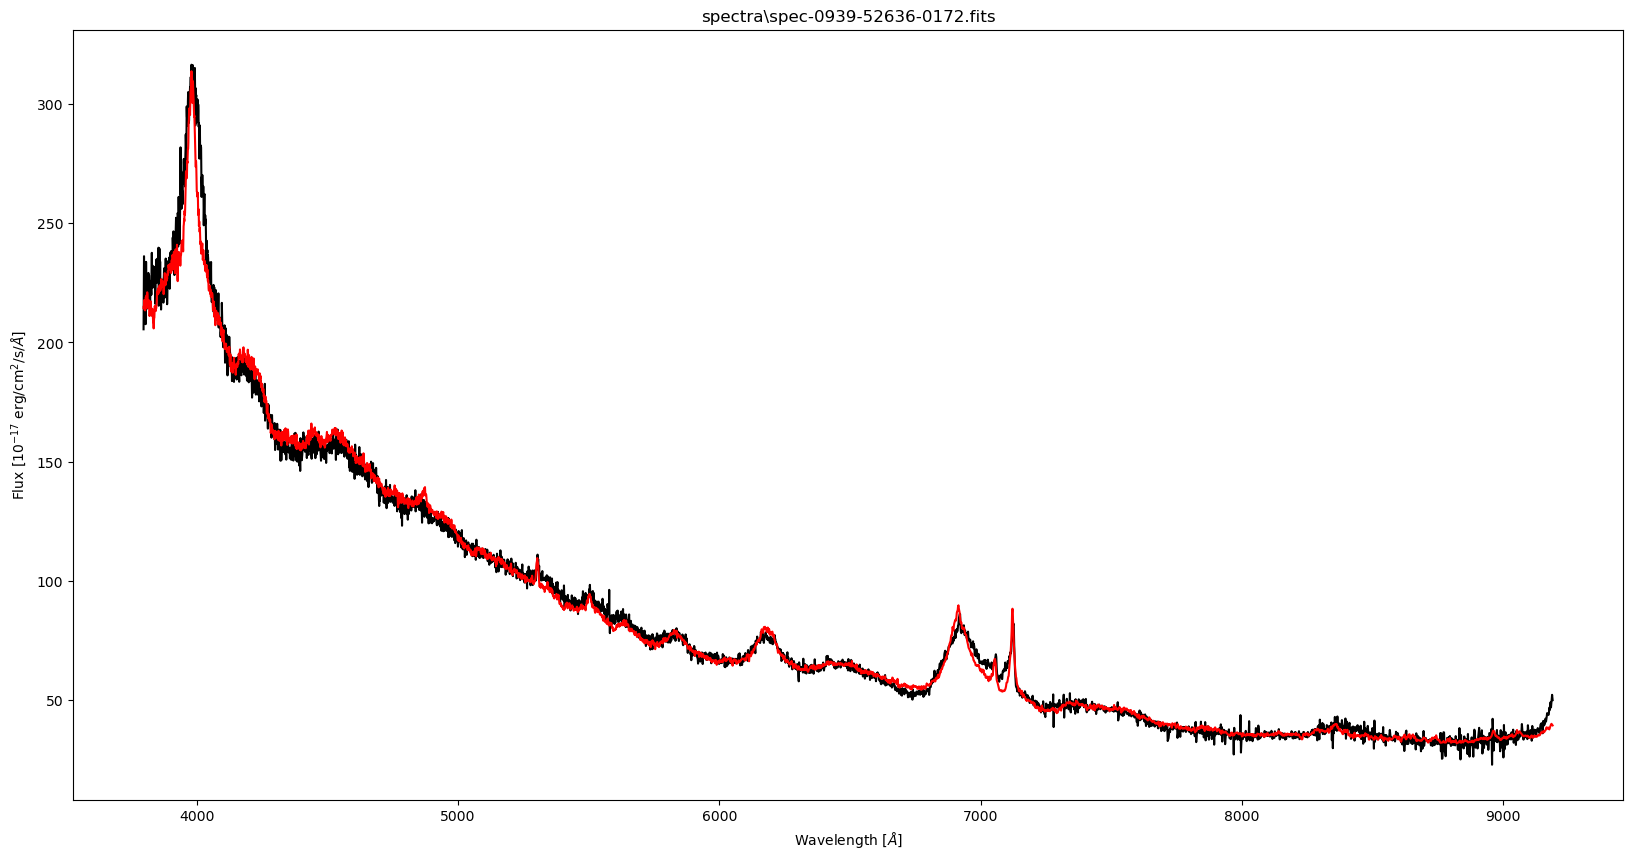

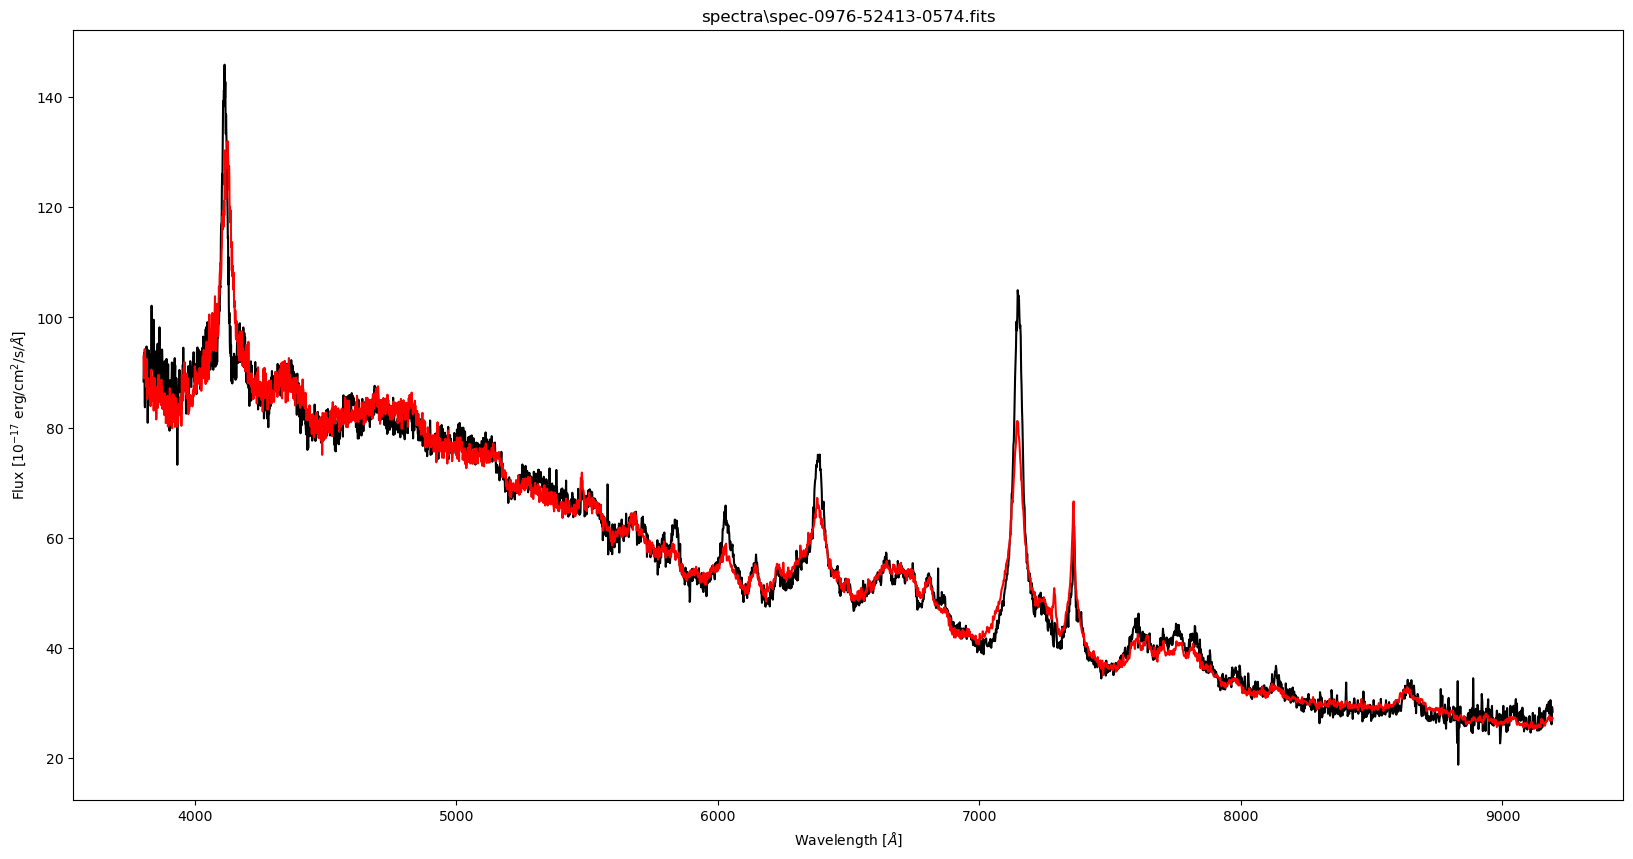

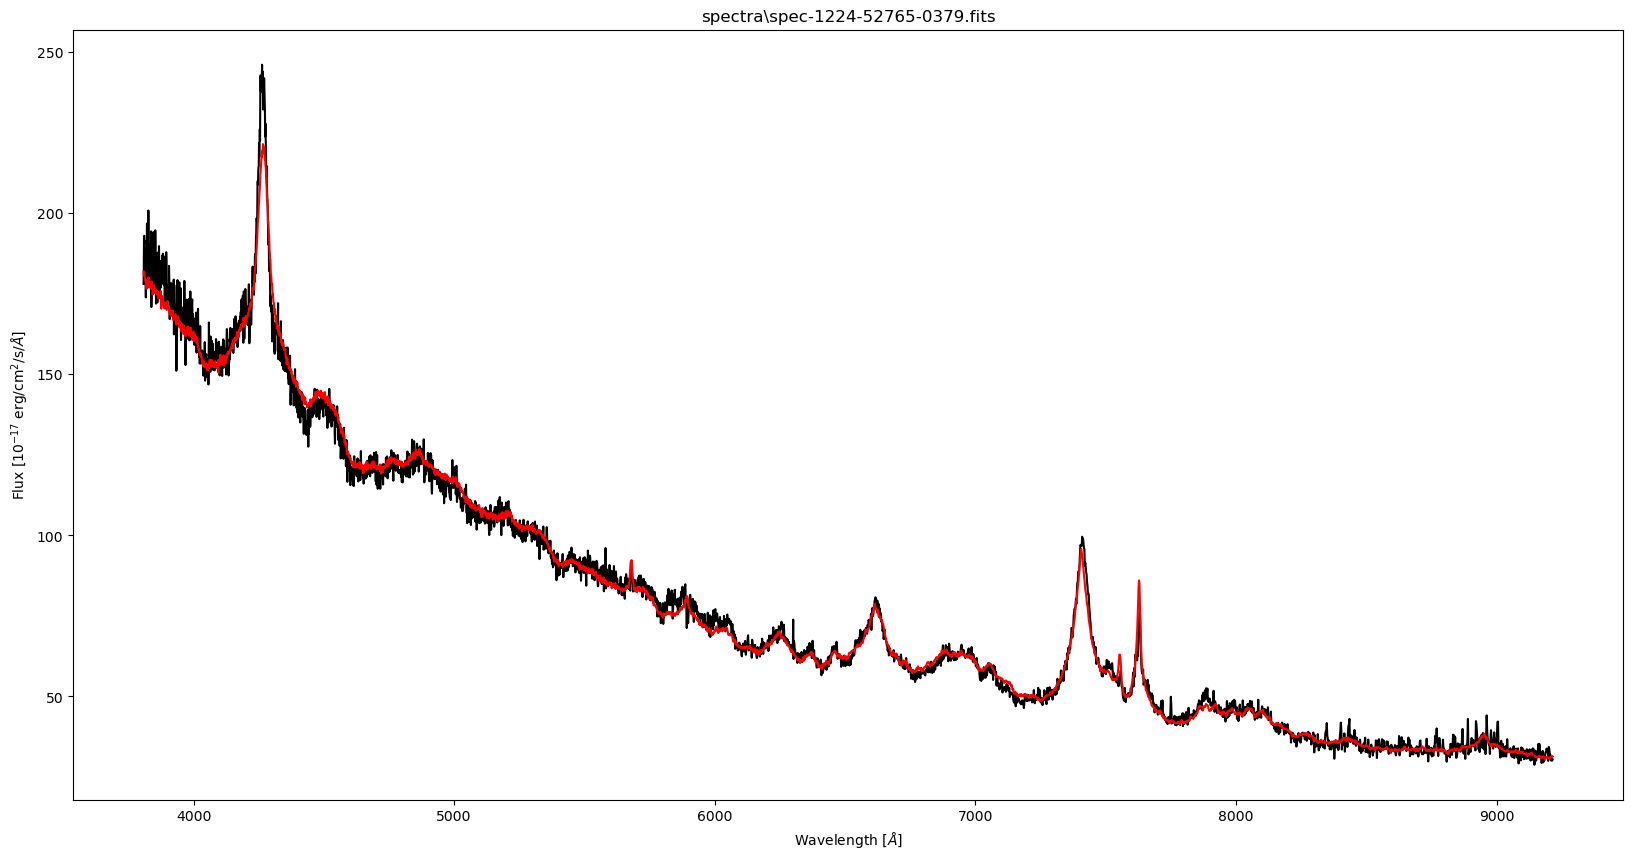

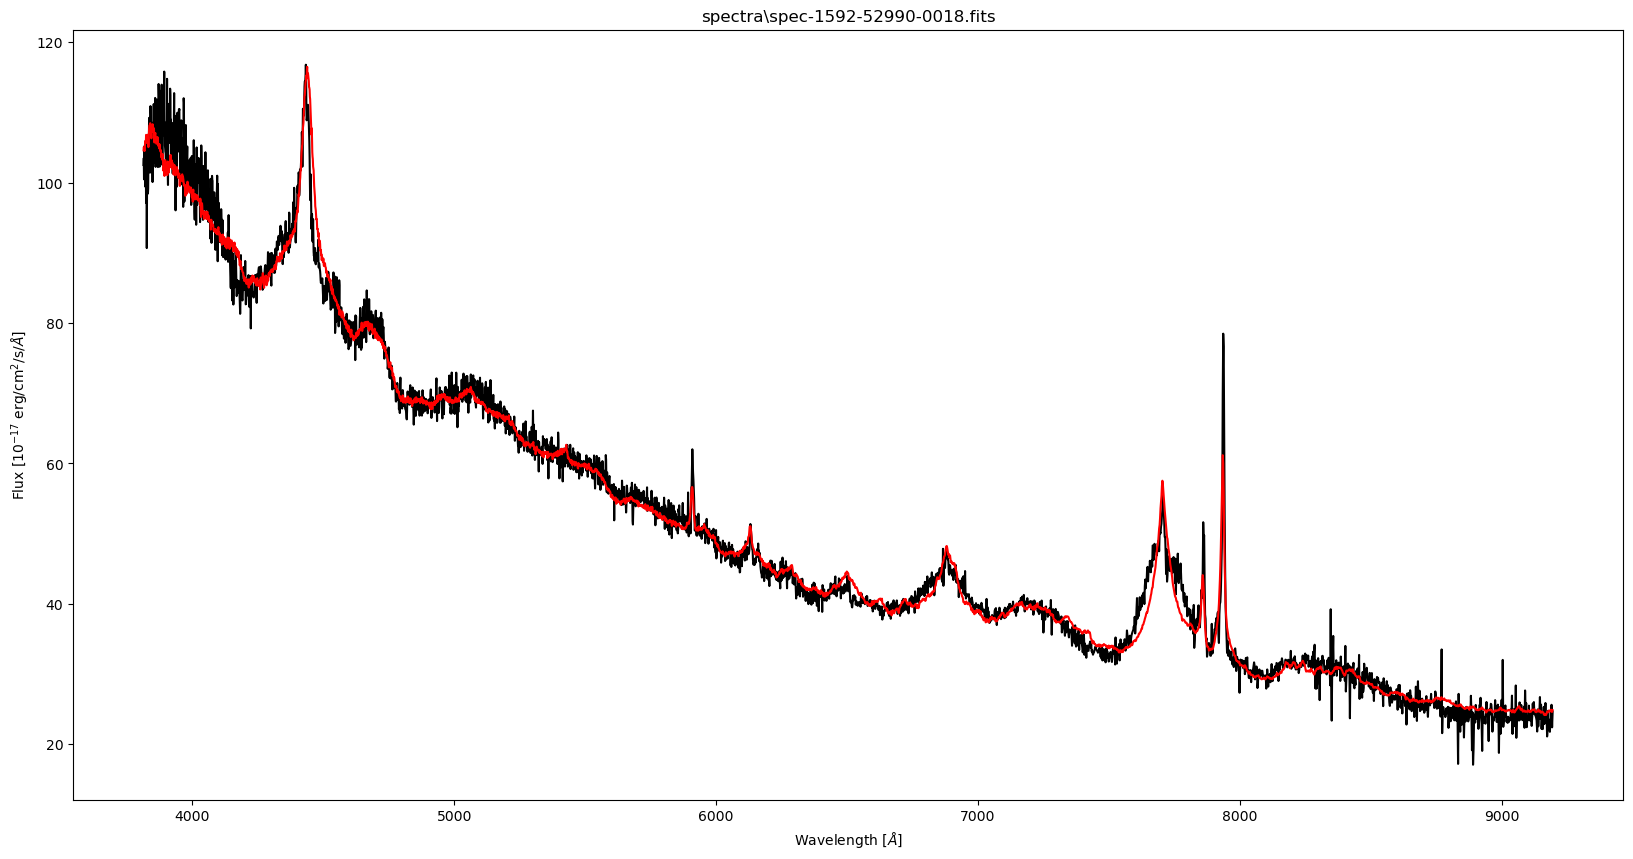

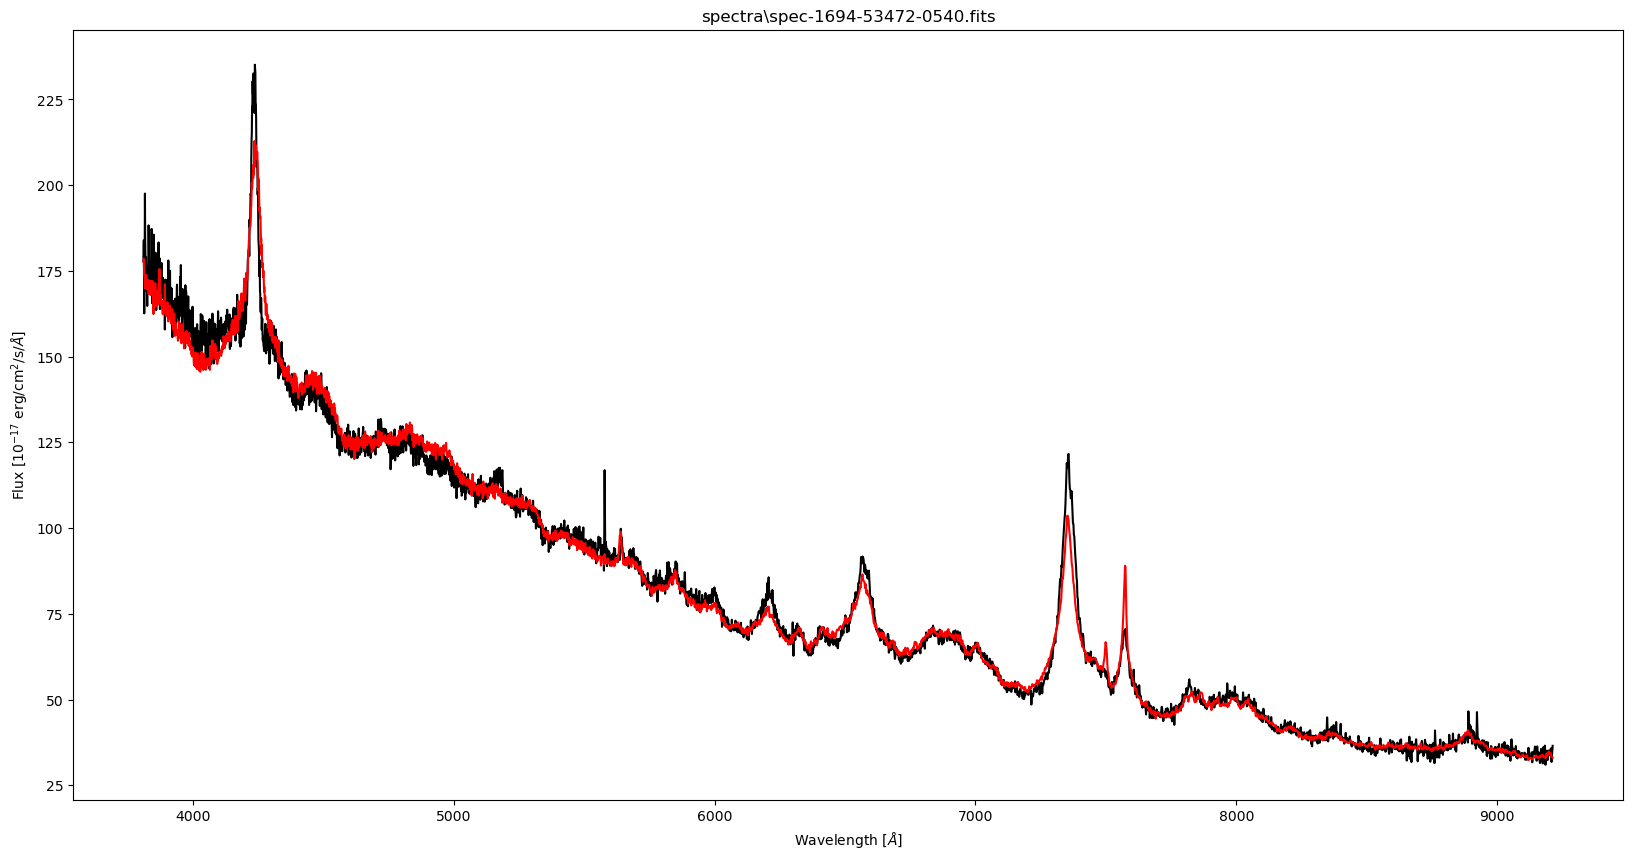

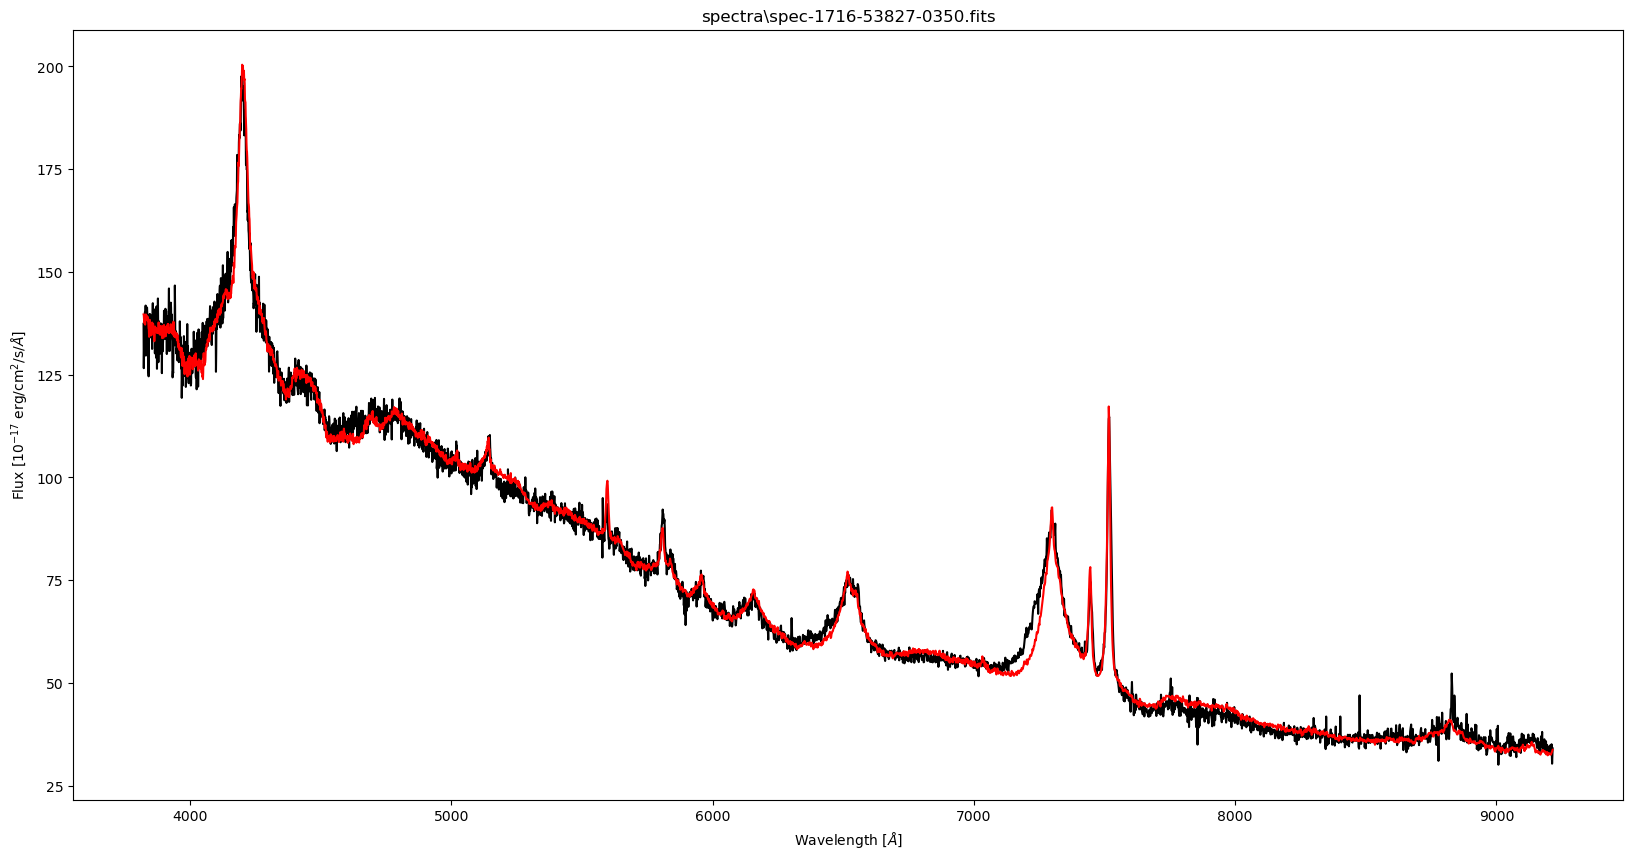

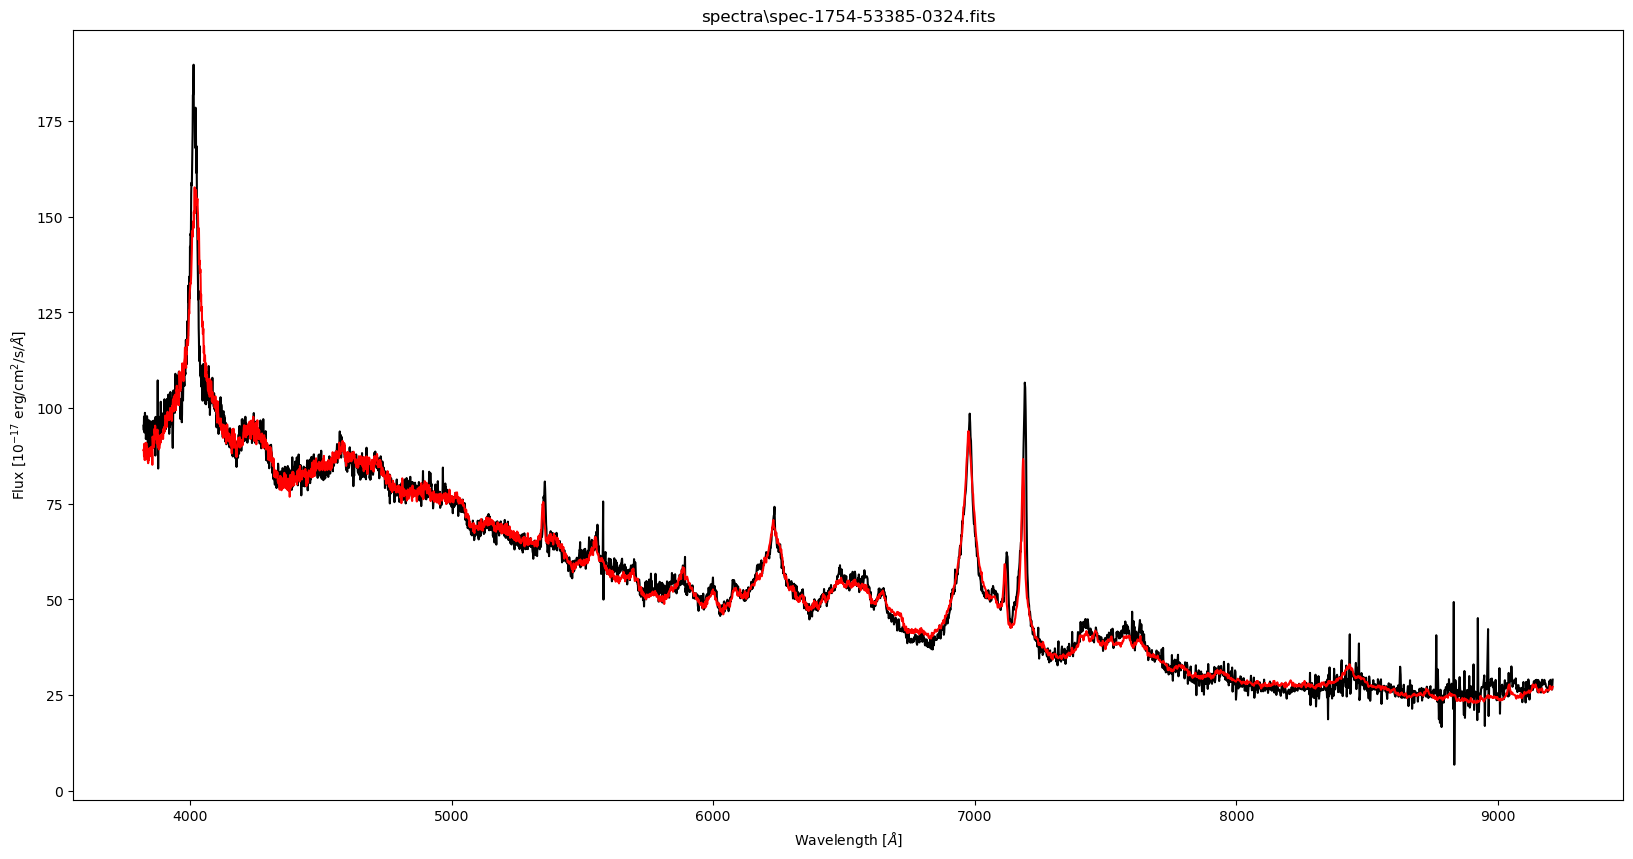

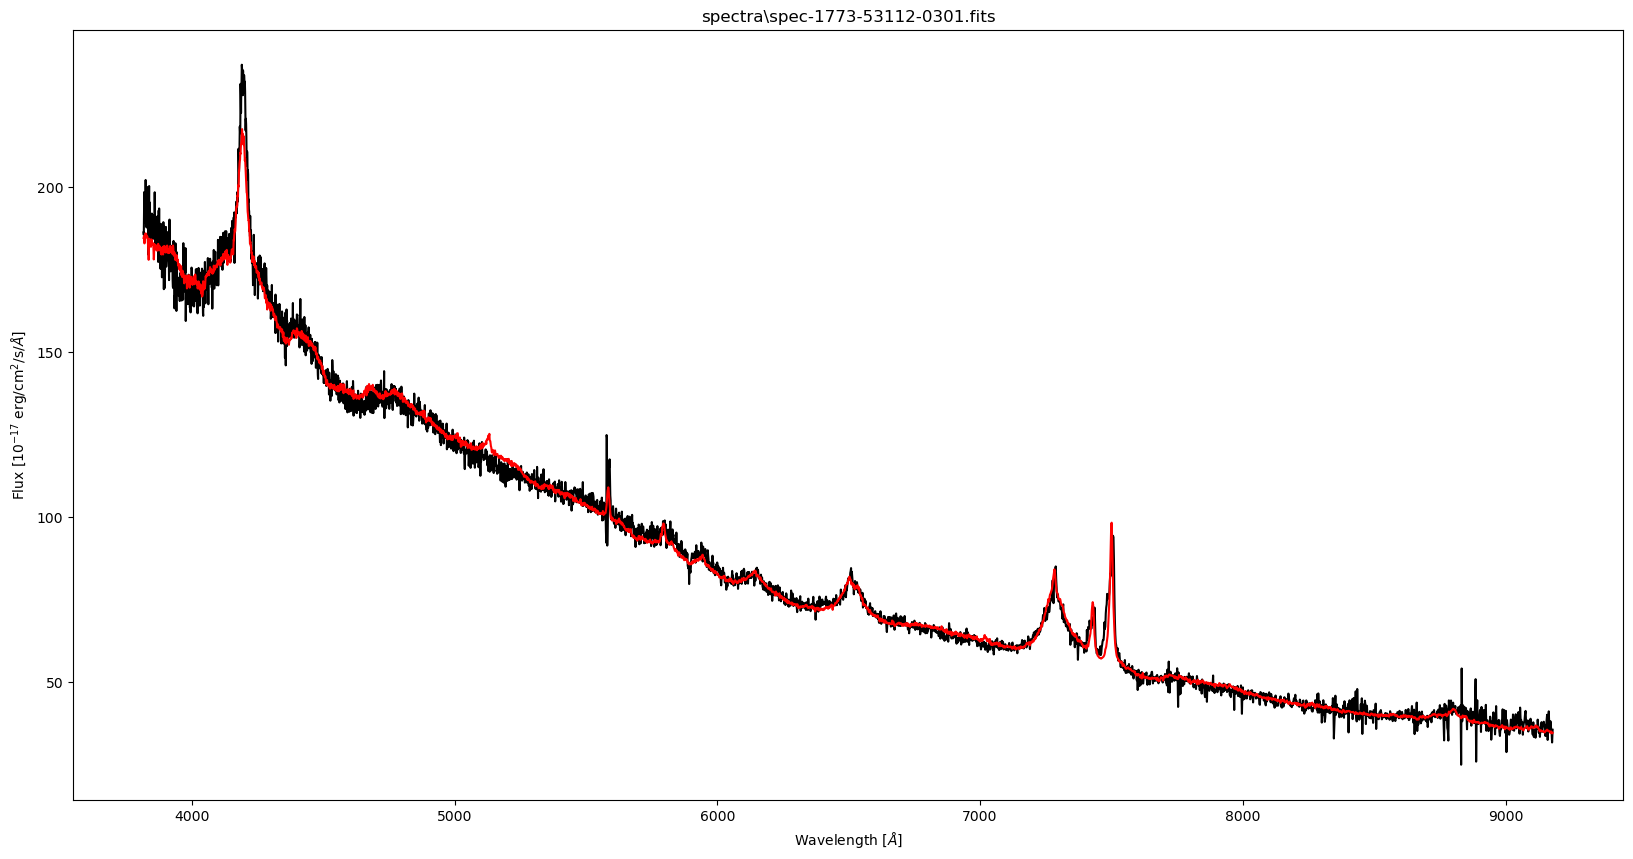

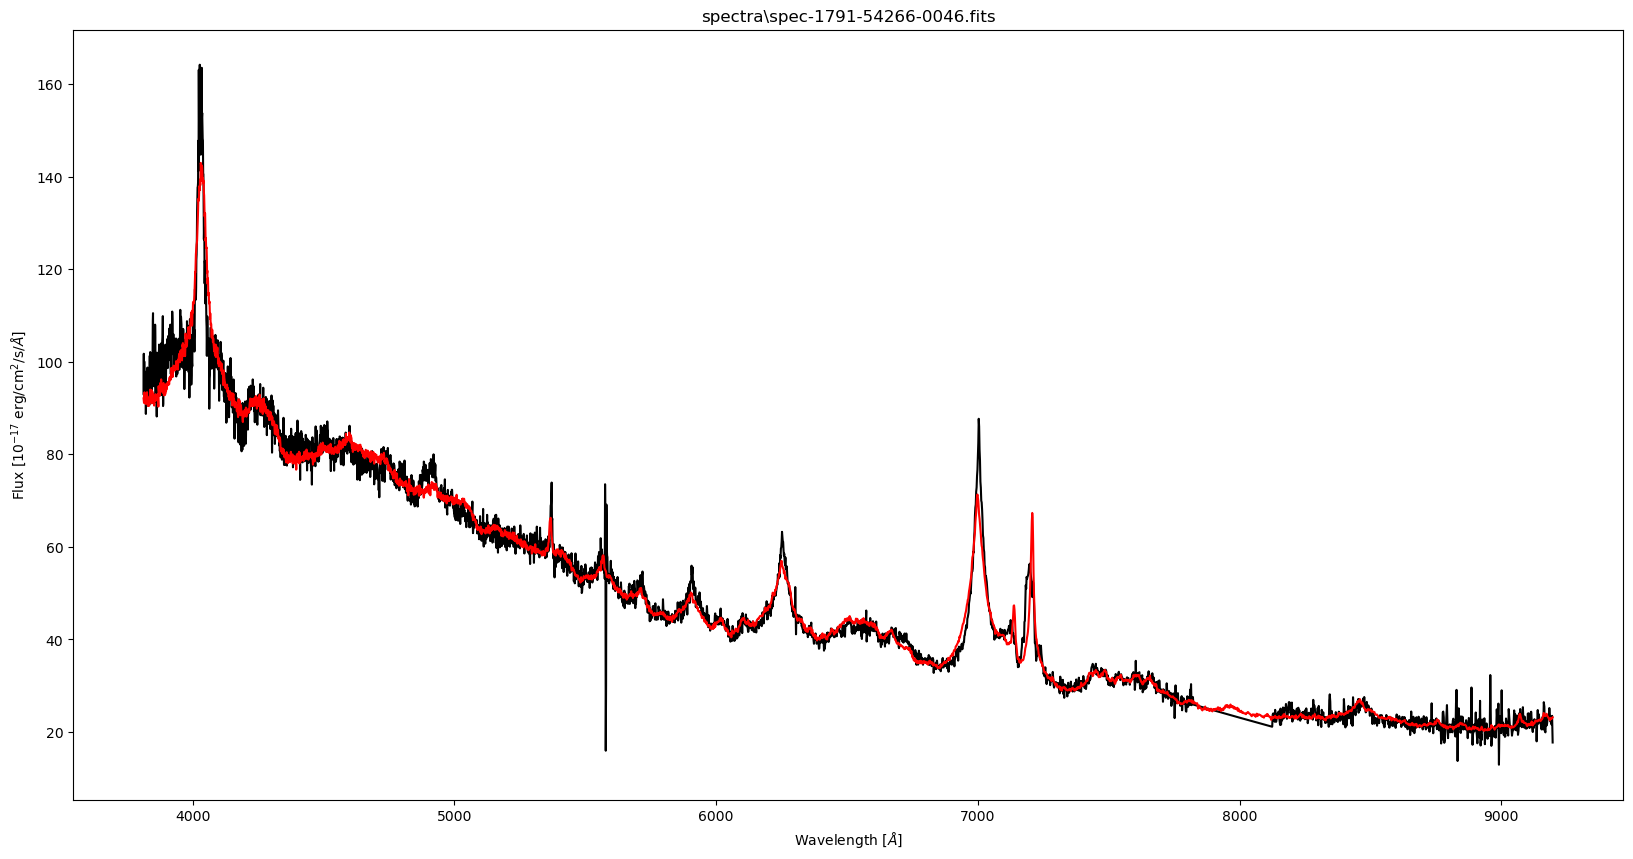

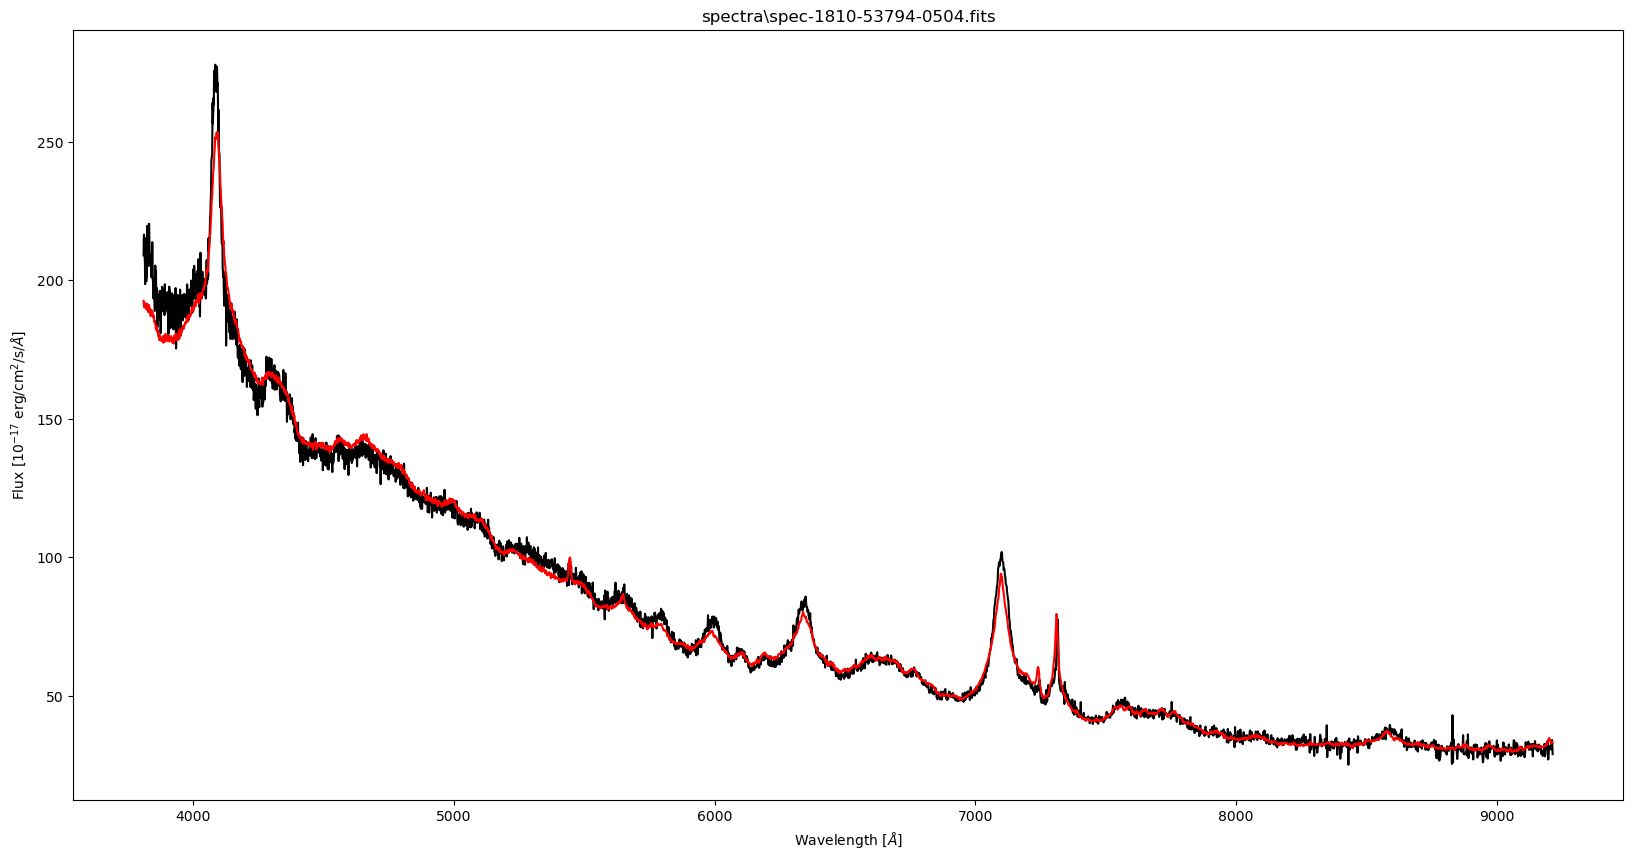

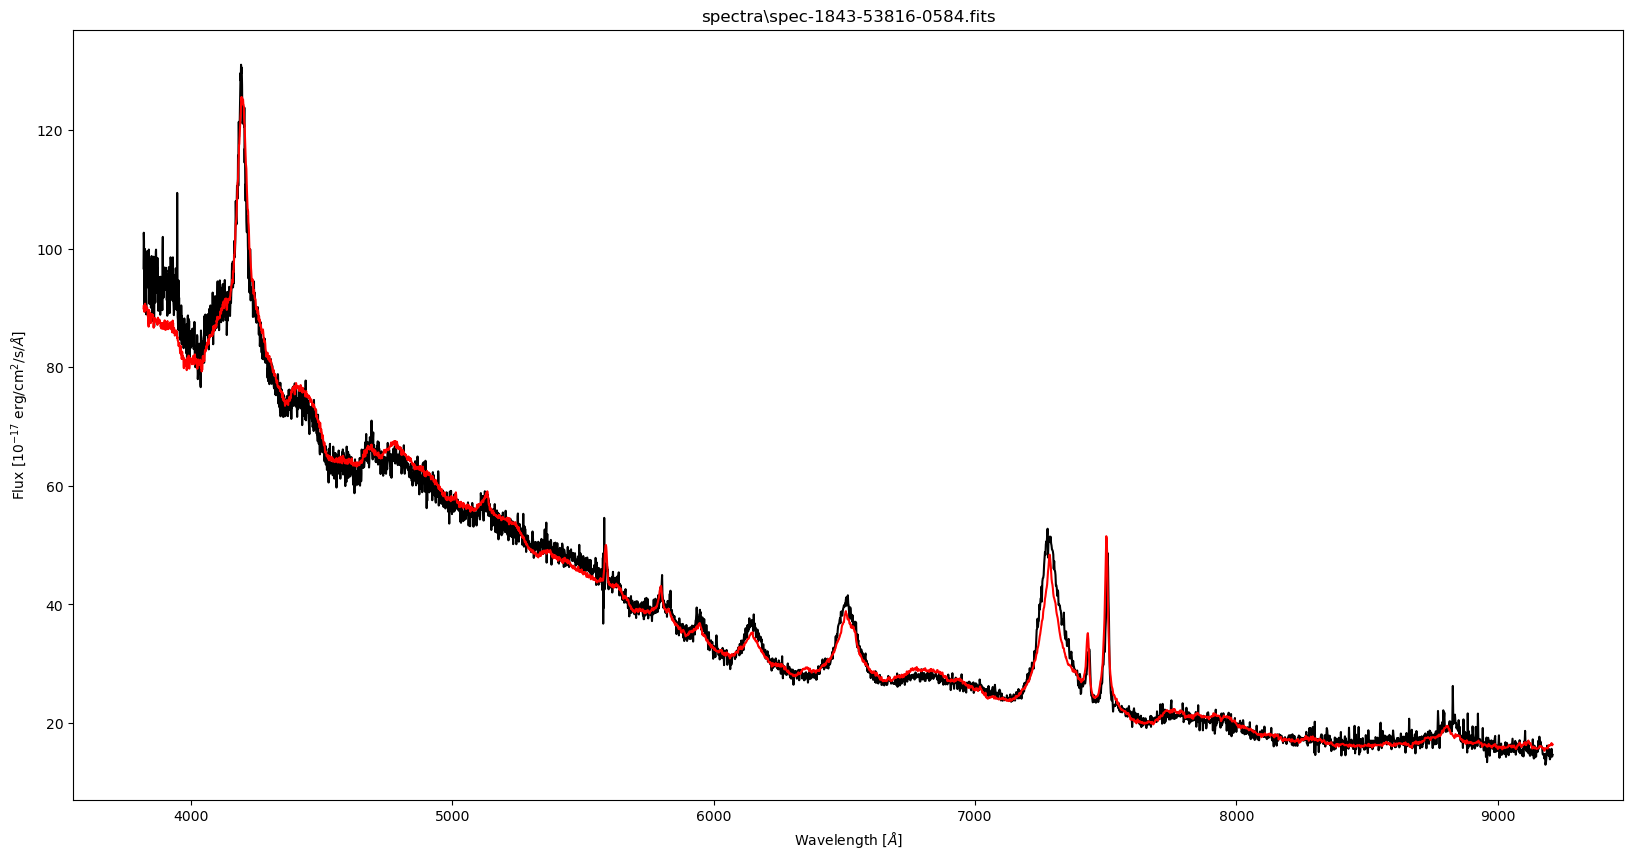

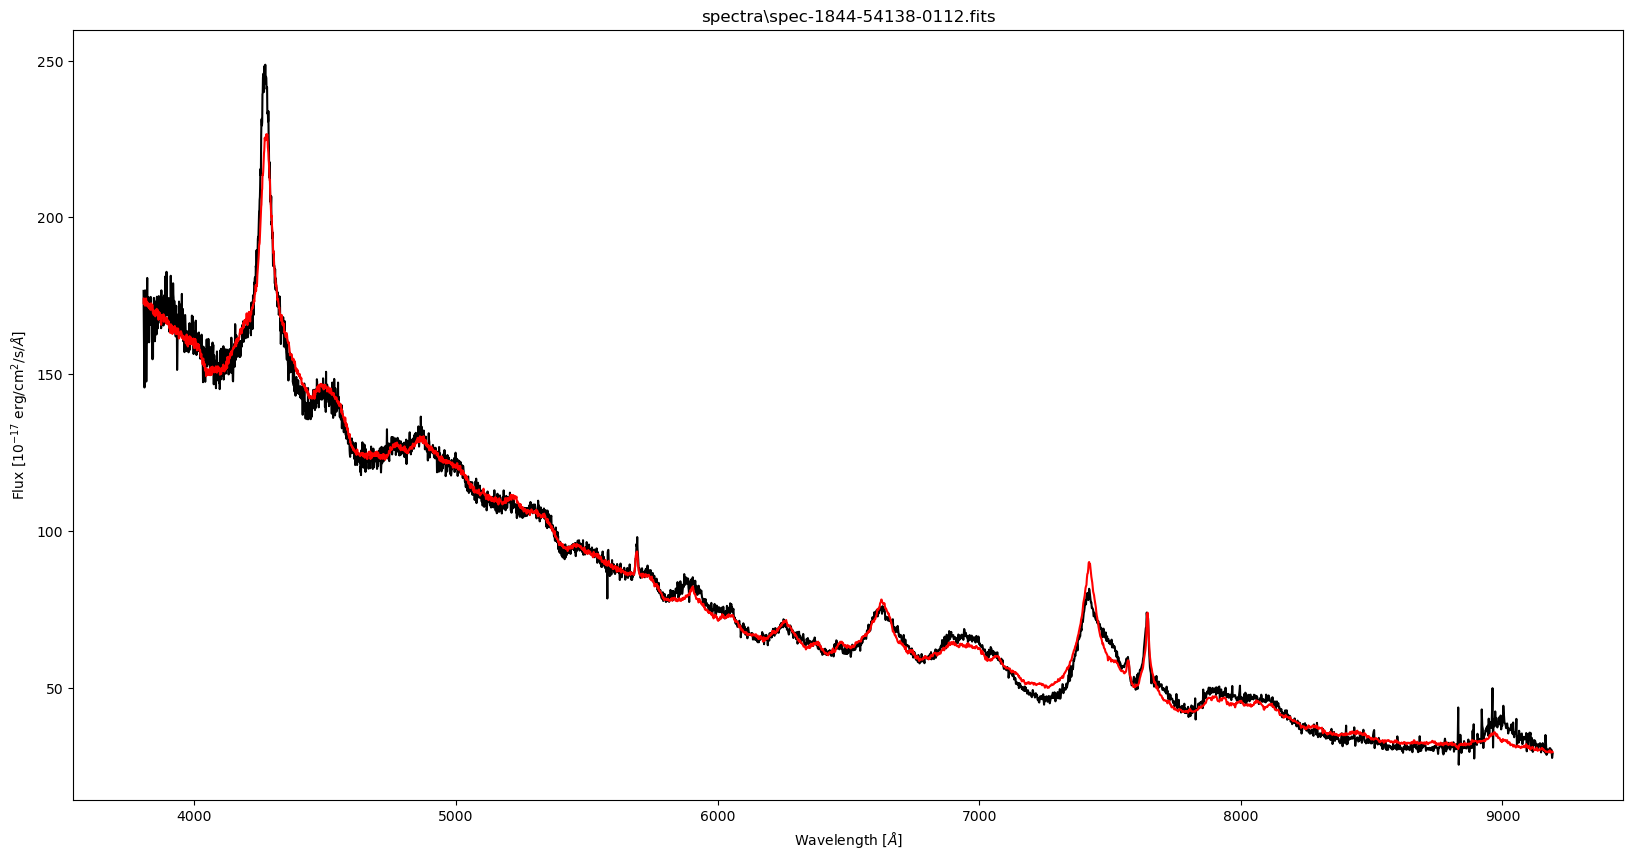

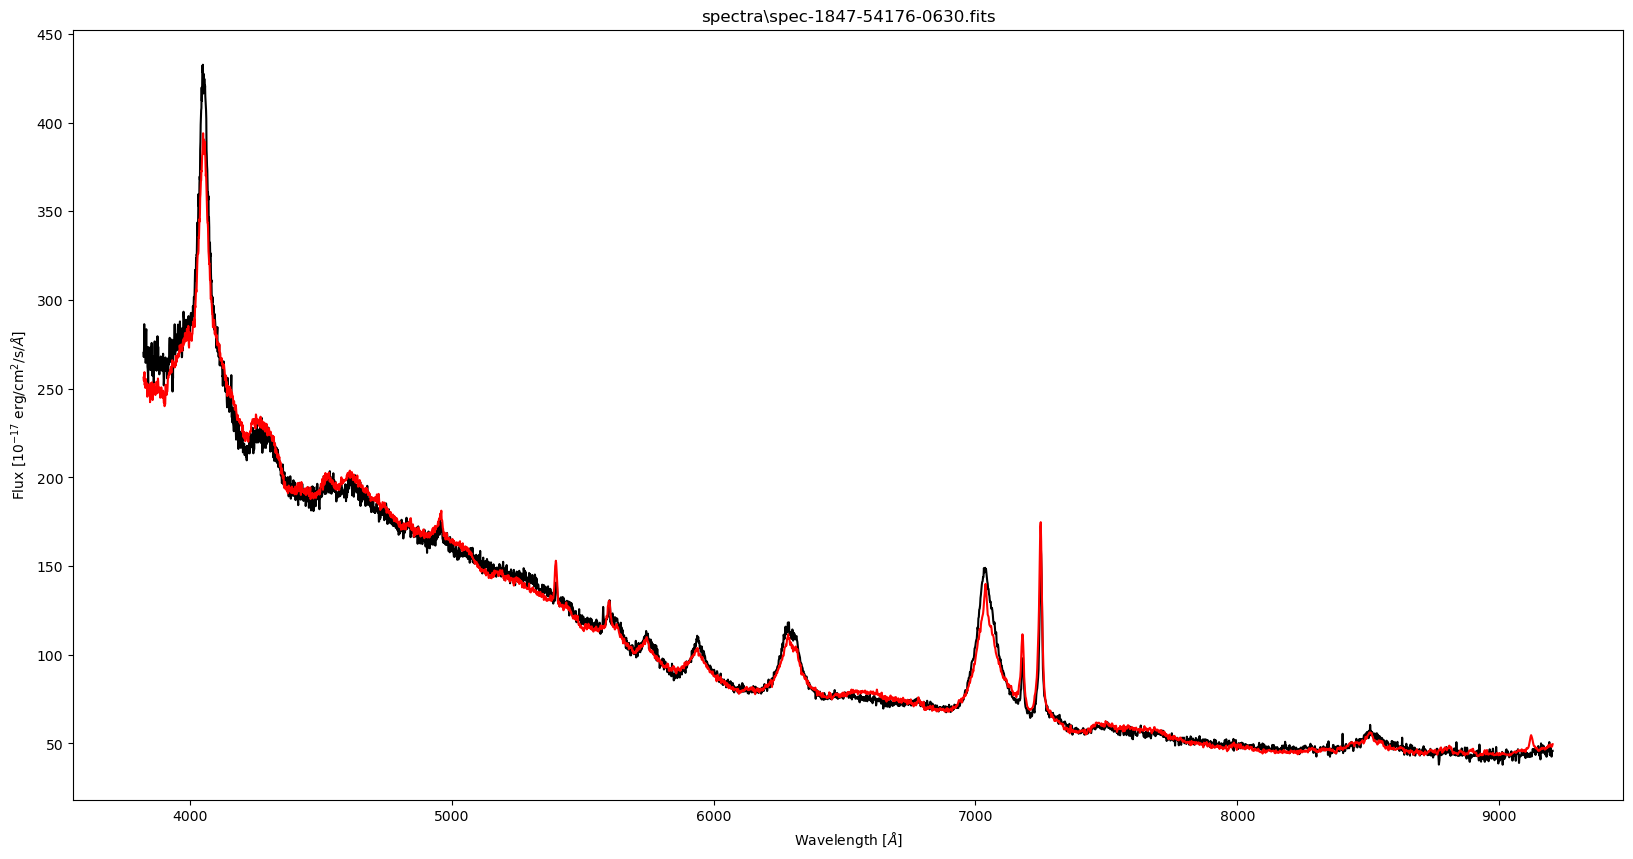

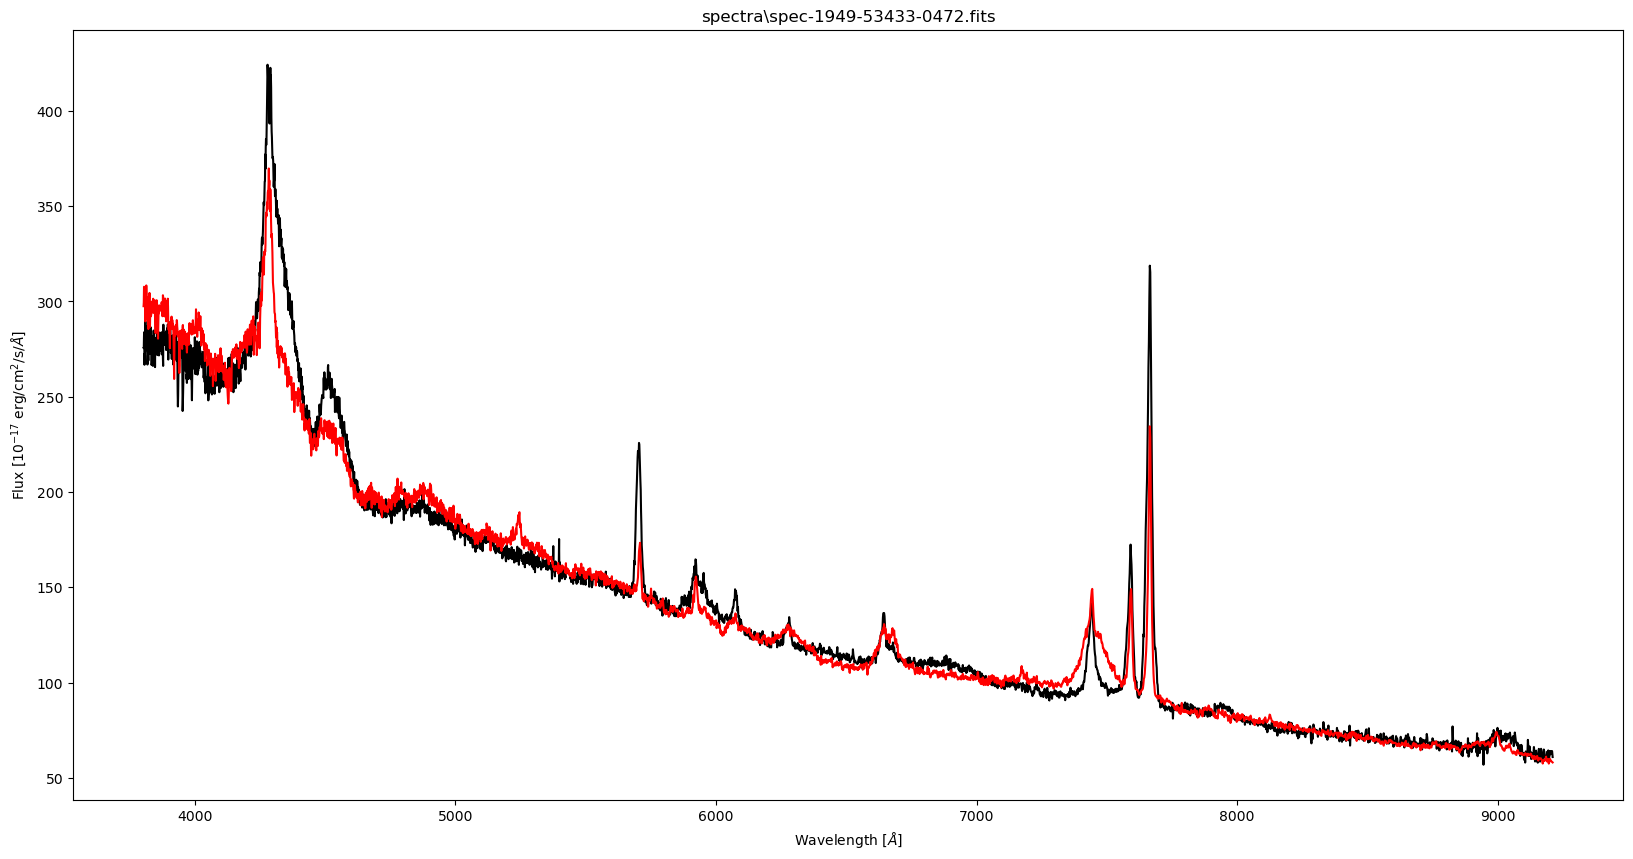

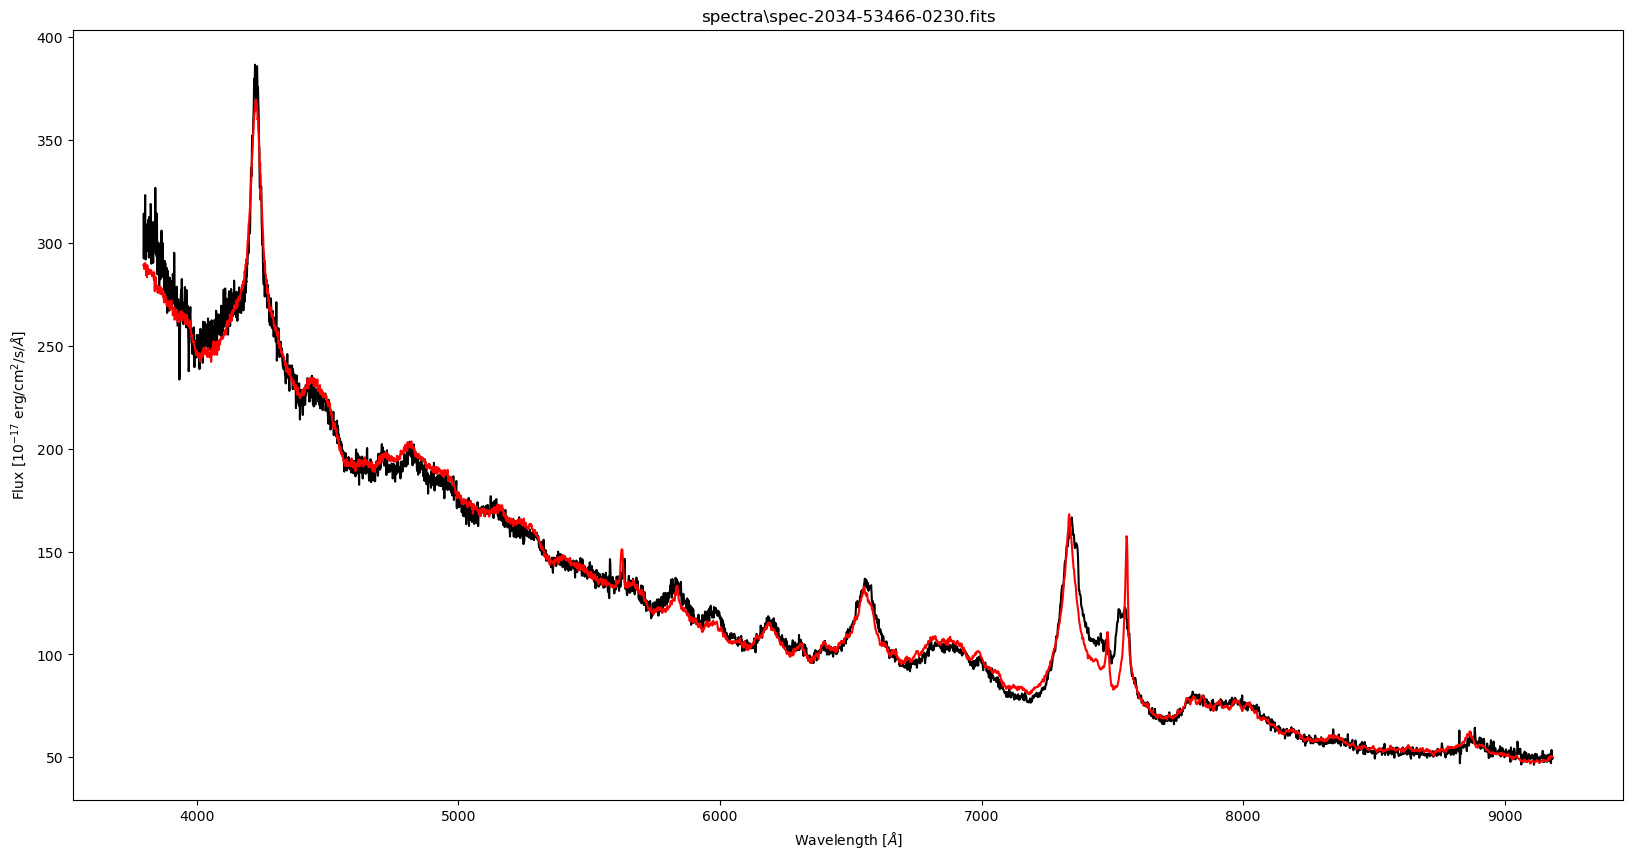

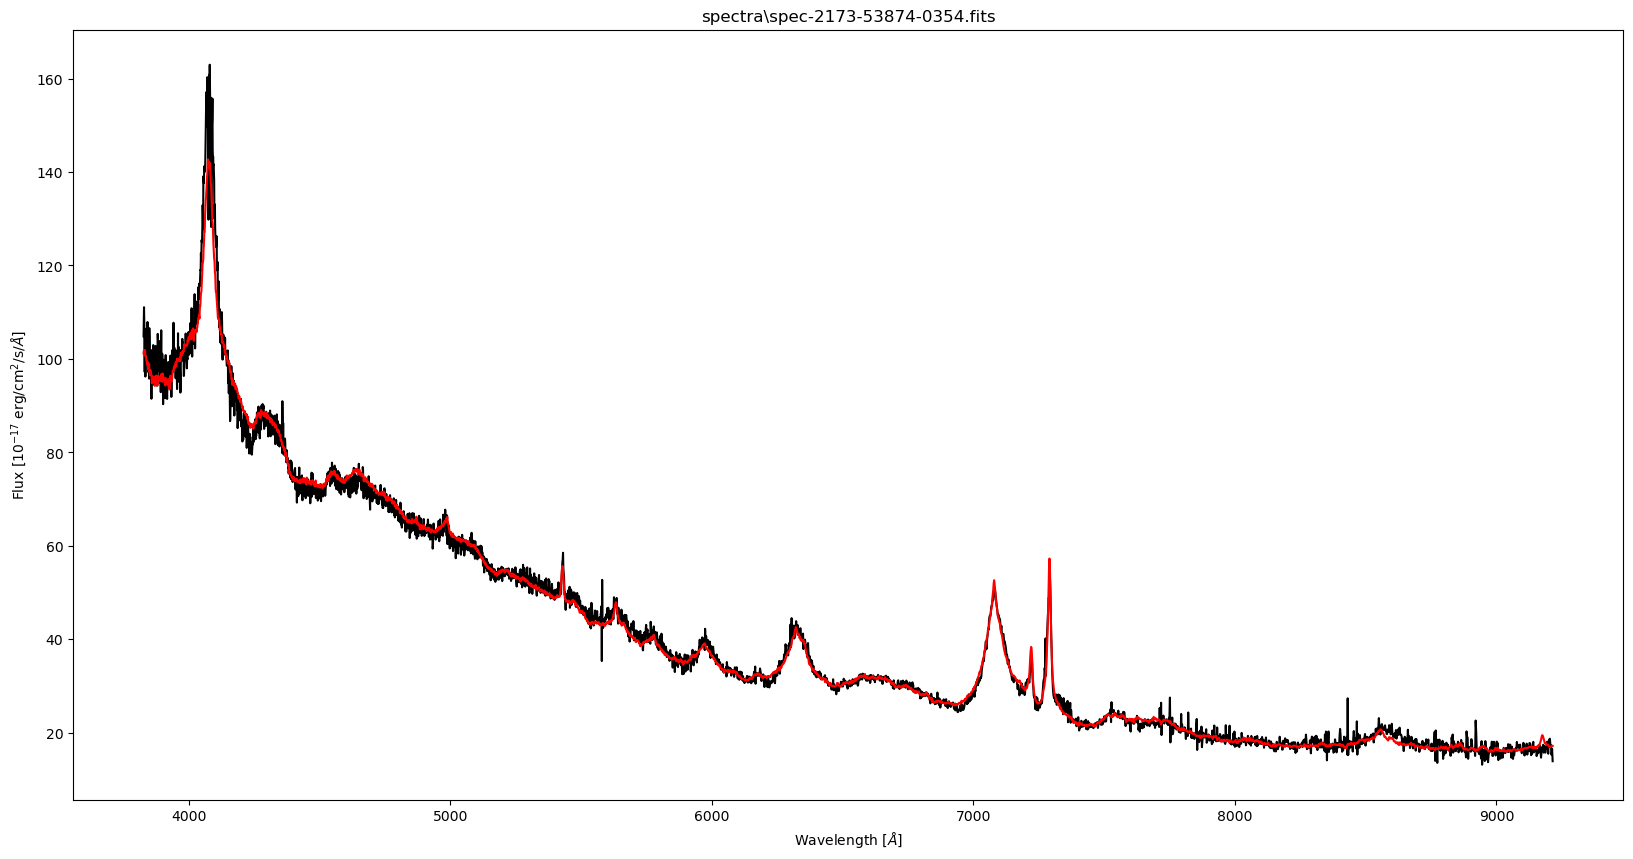

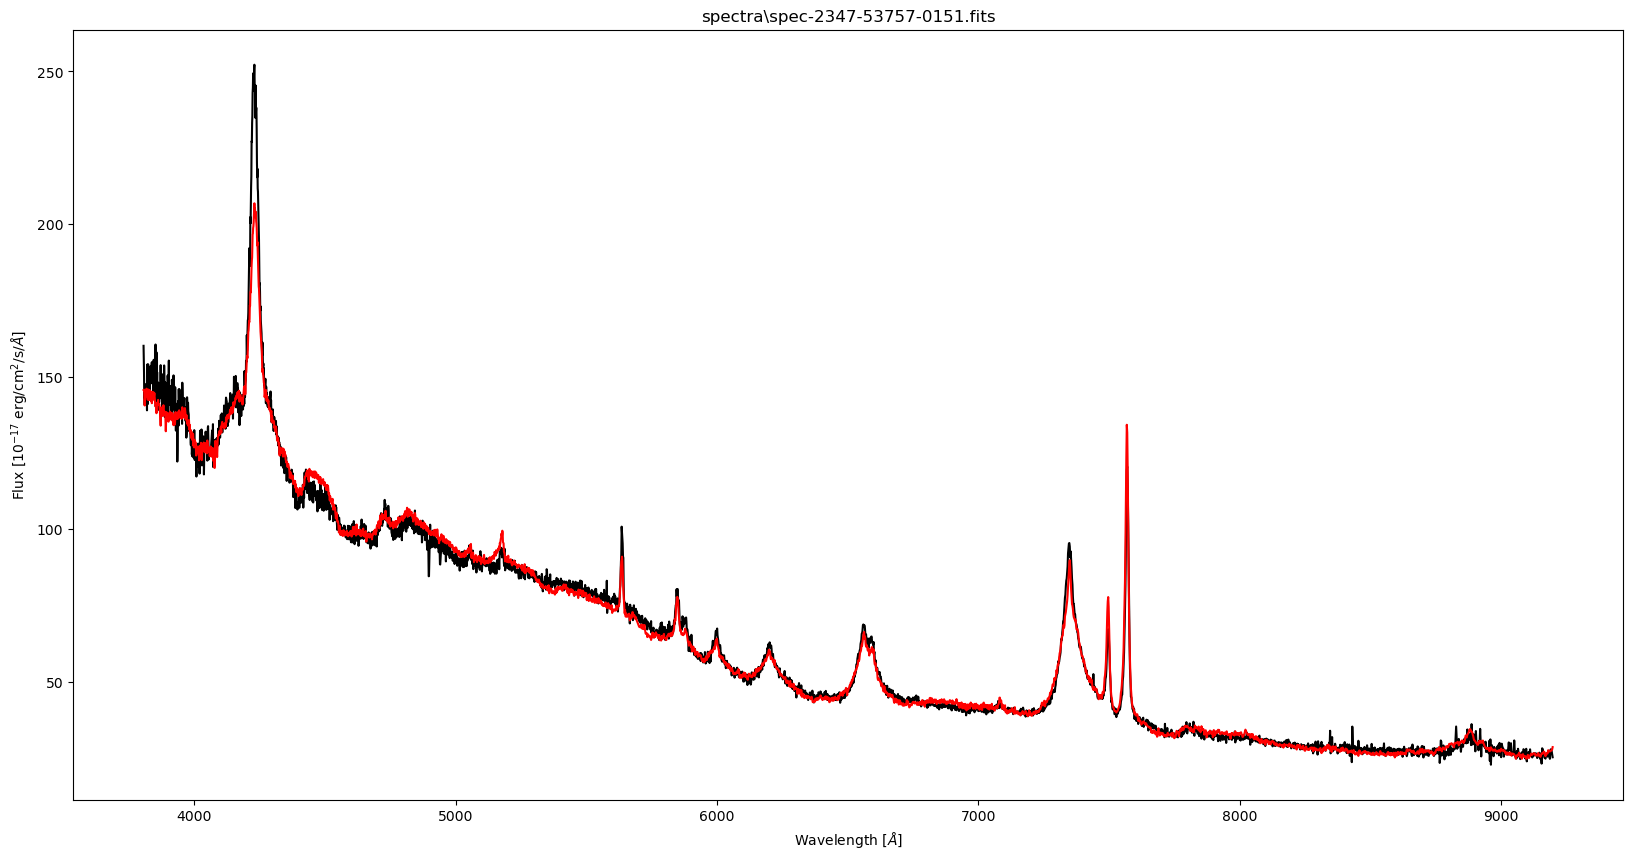

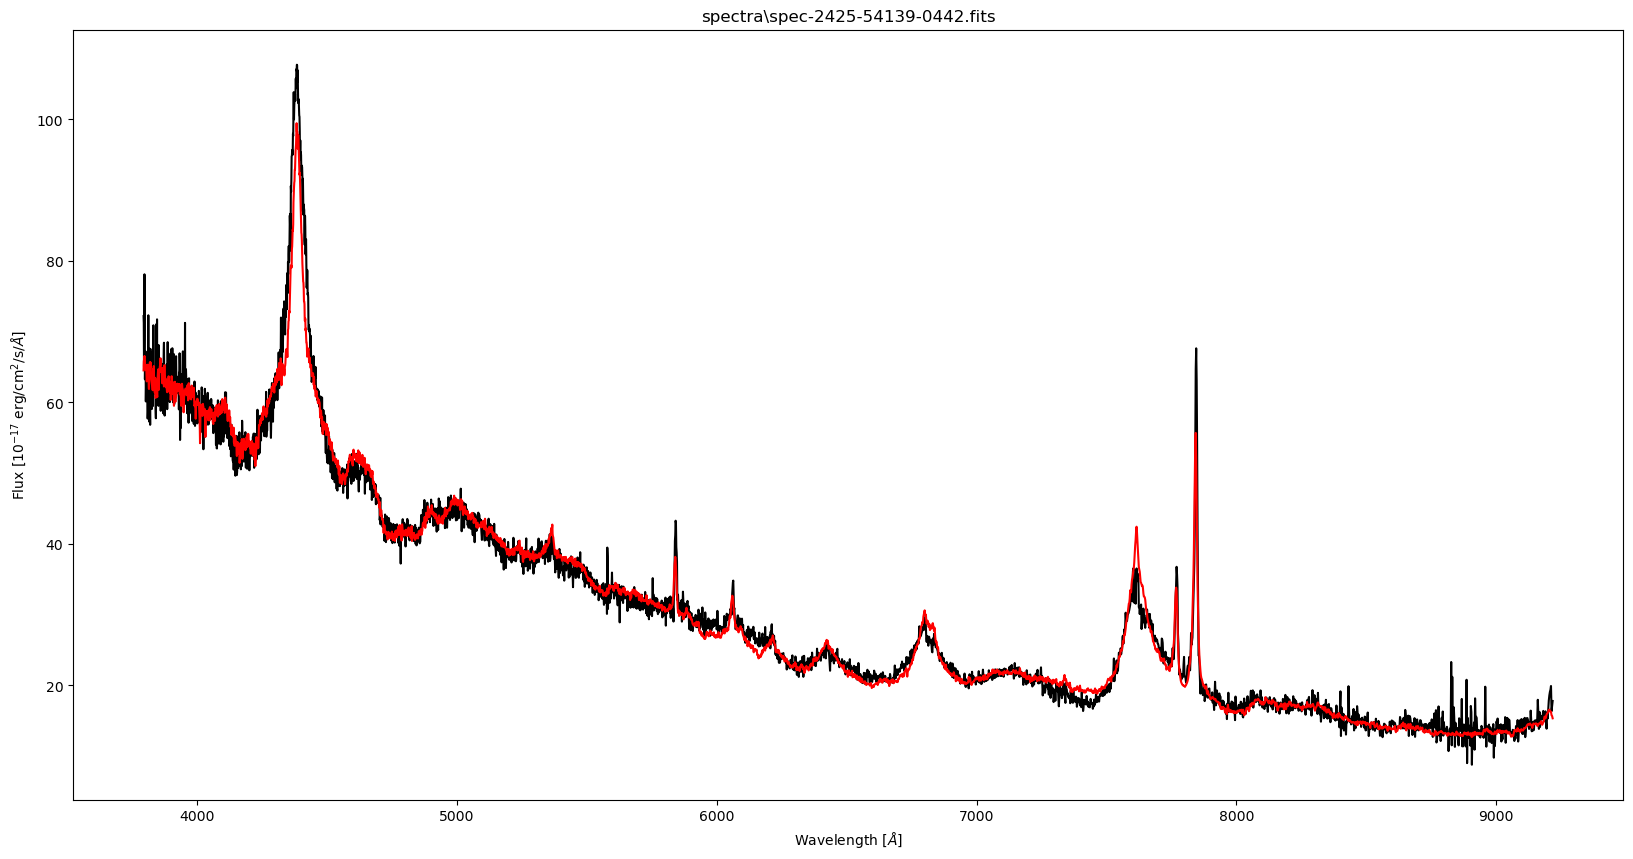

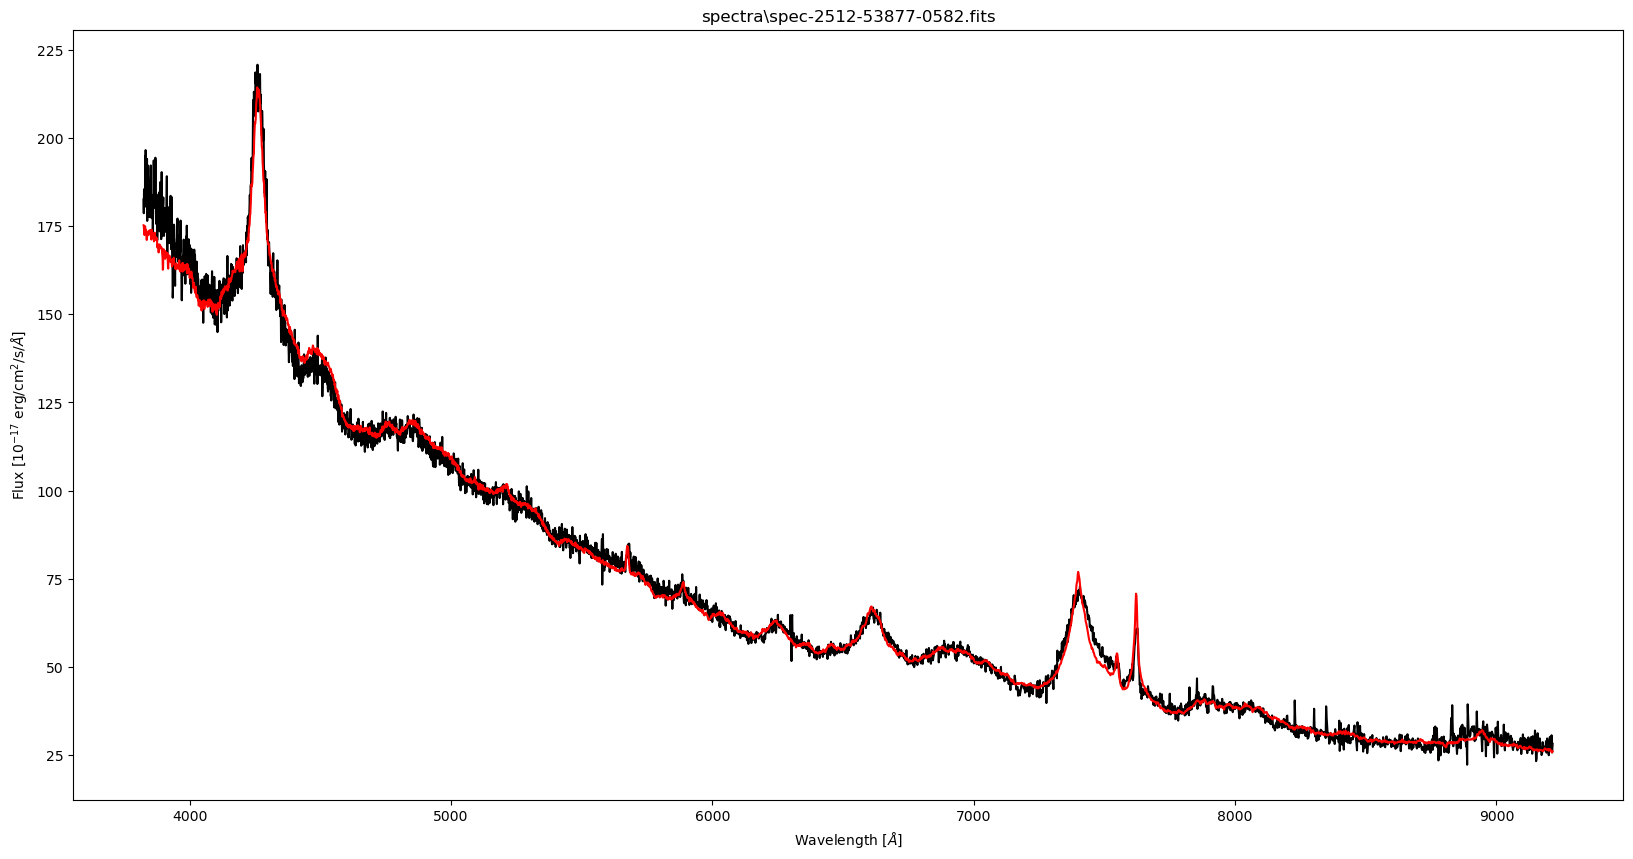

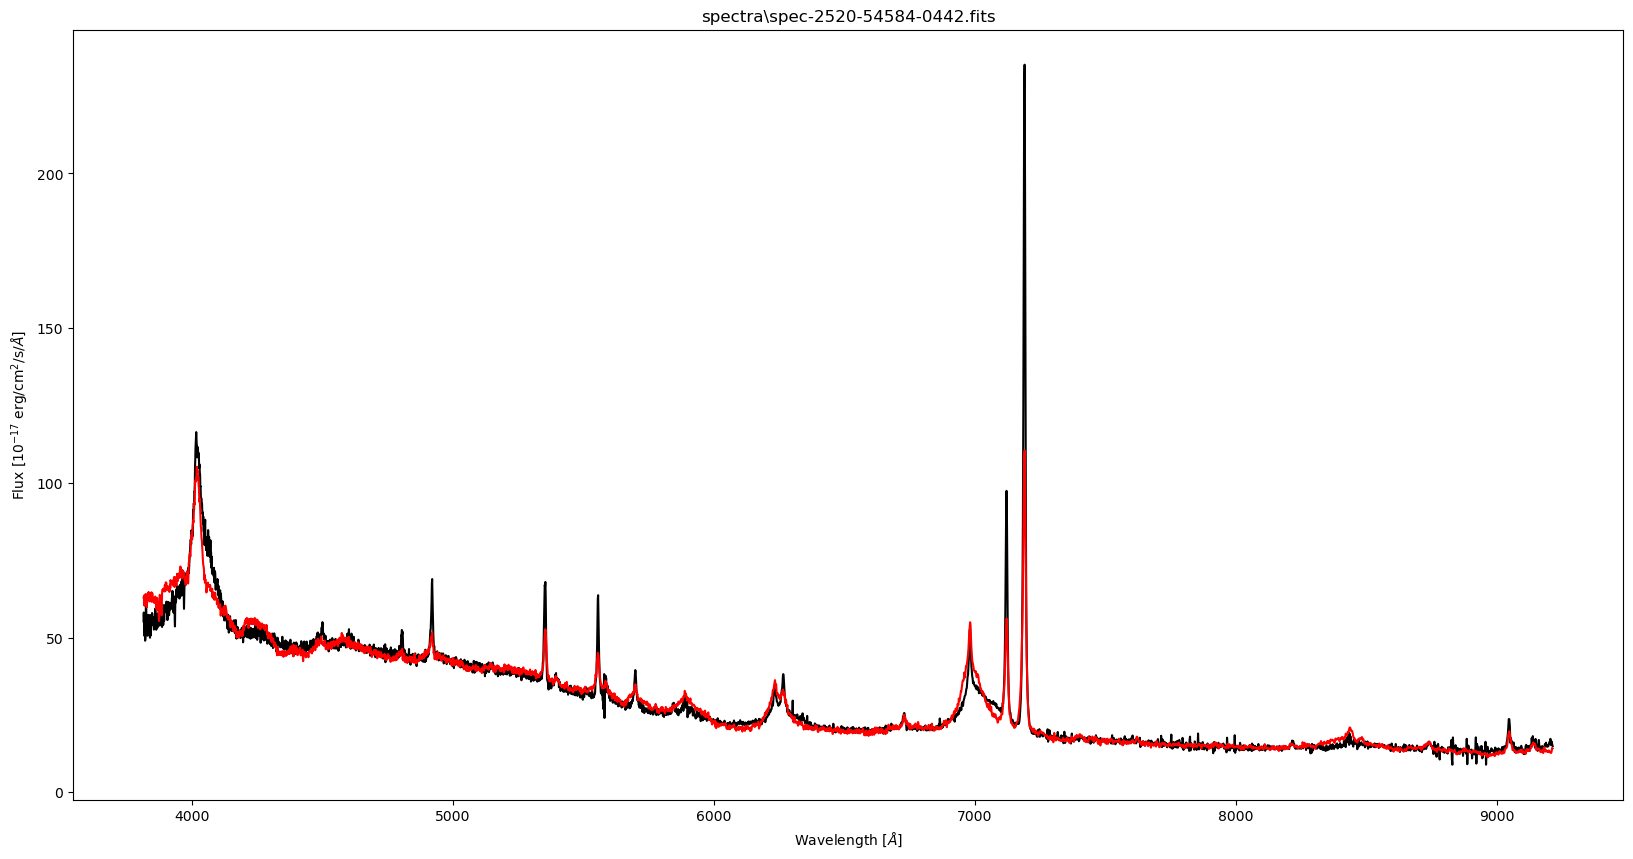

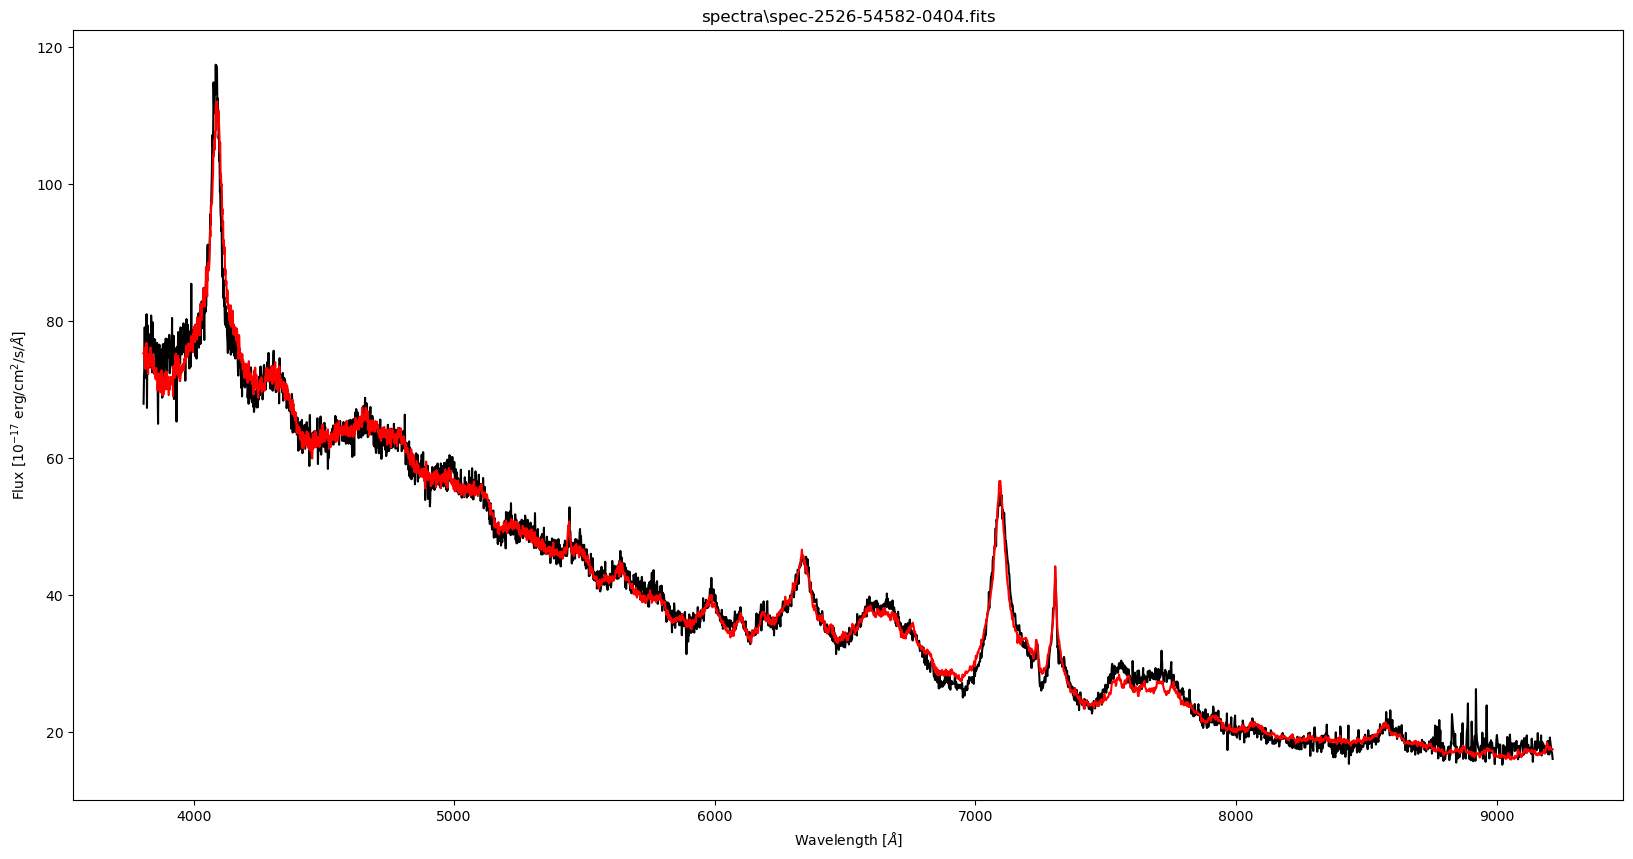

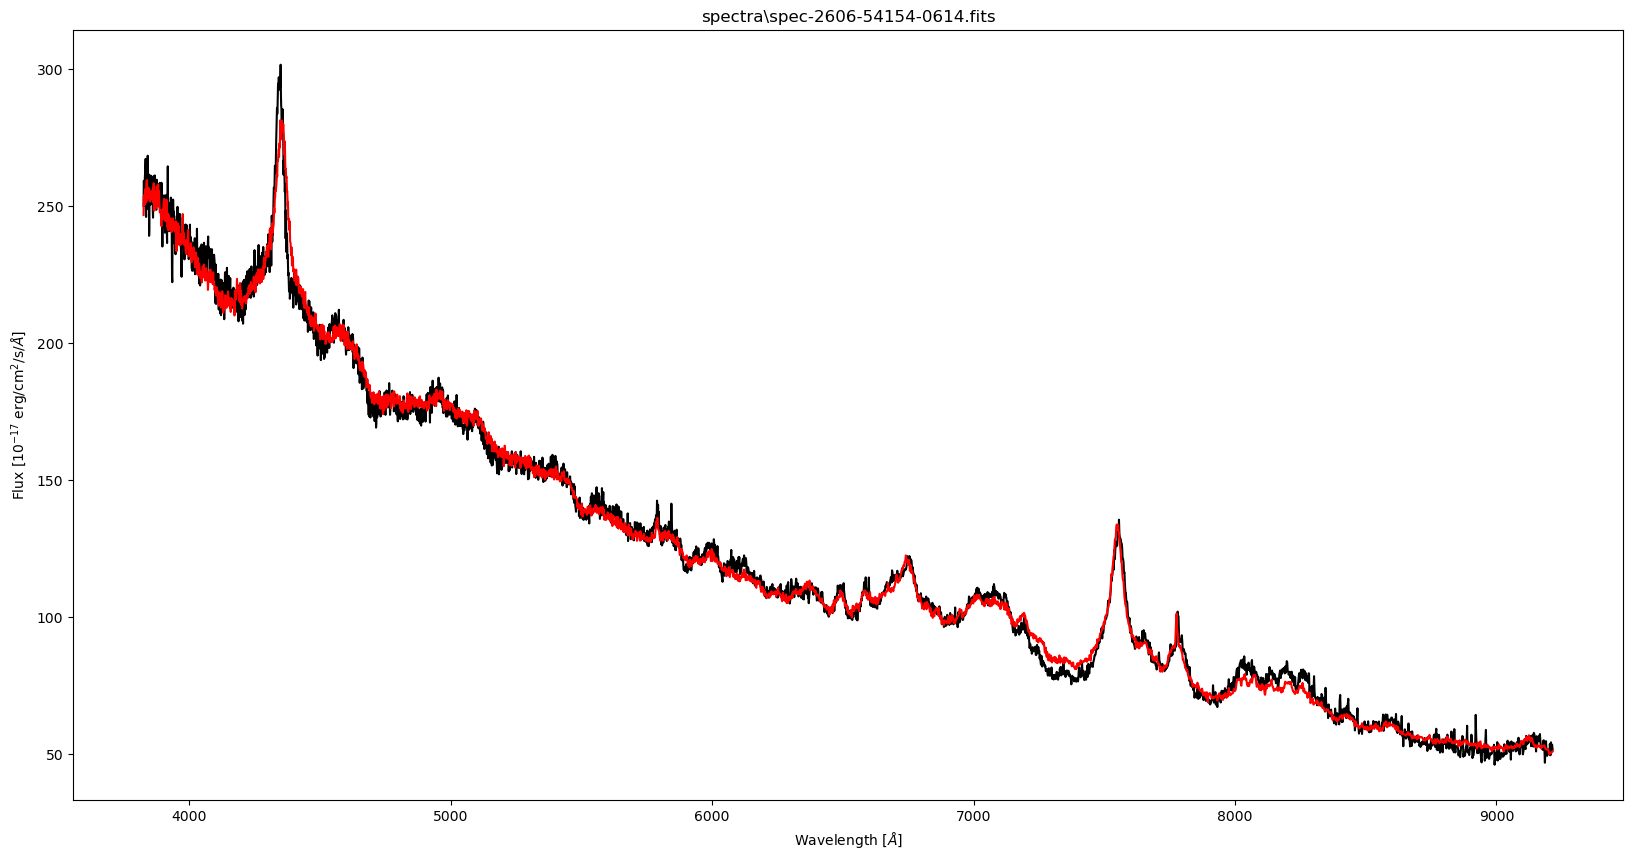

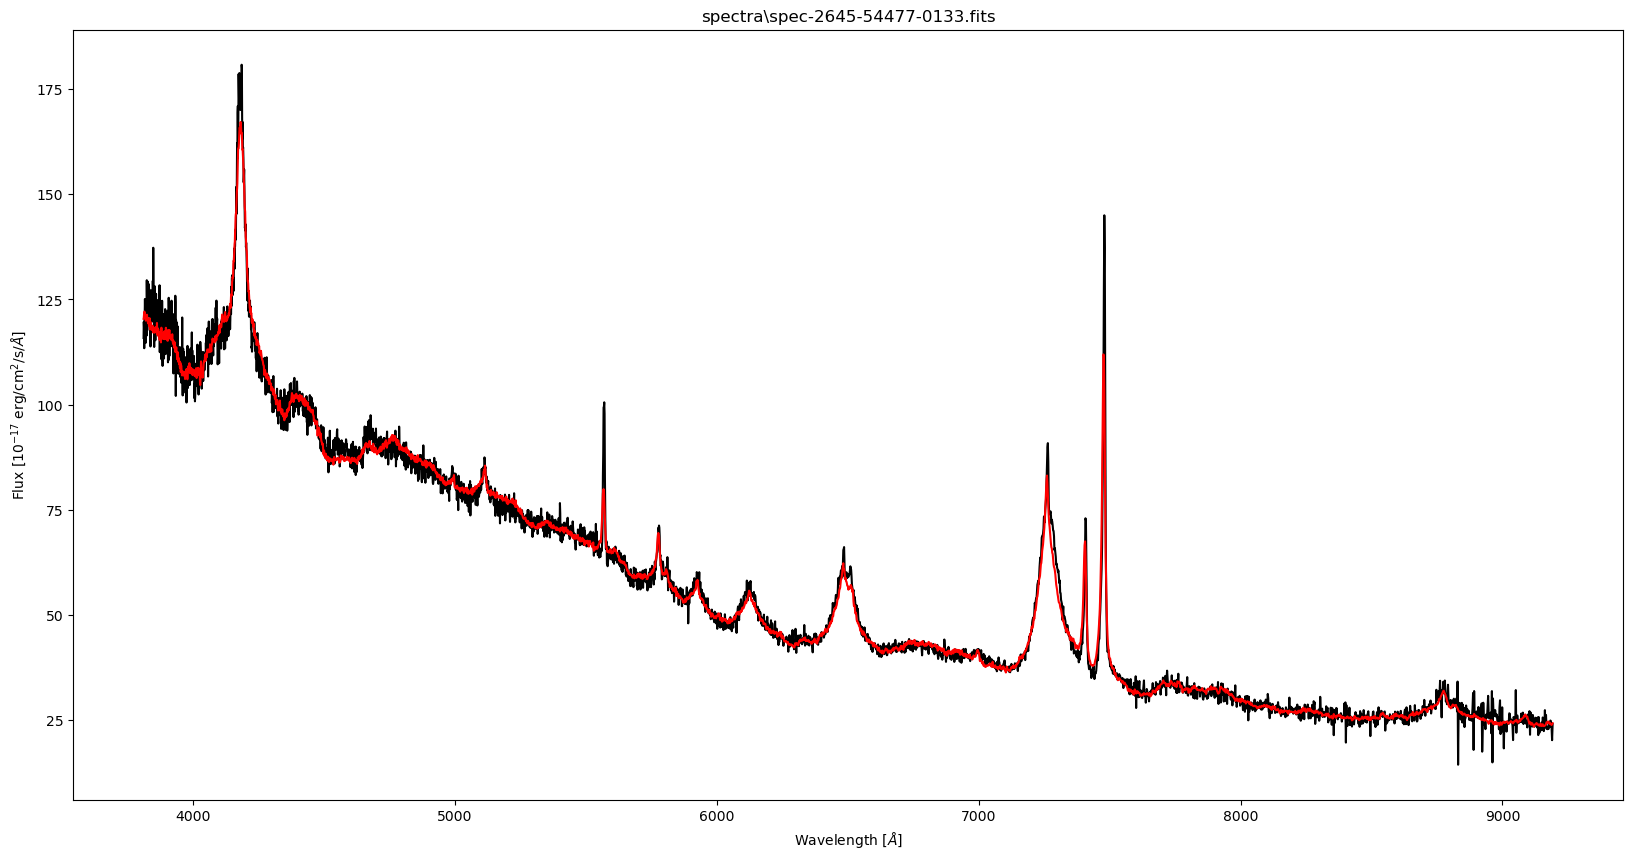

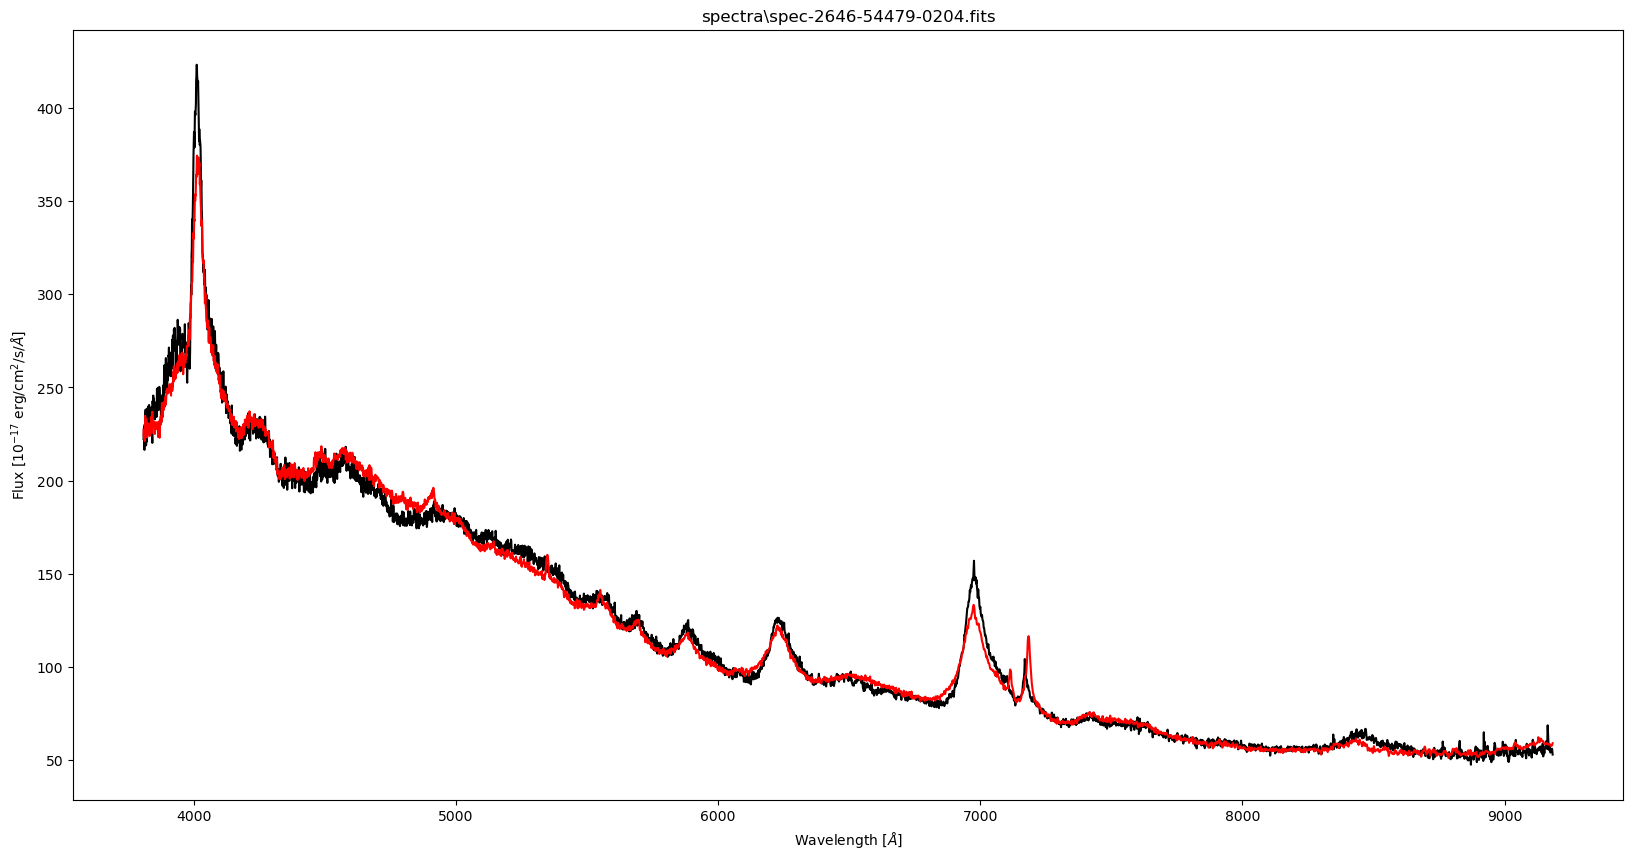

In [2]:
for filename in glob.glob('spectra\spec-*'):
    data = Table(fits.open(filename)[1].data)
    plt.rcParams["figure.figsize"] = (20,10)
    plt.plot(10**data['loglam'], data['flux'], color = 'black', label = 'data')
    plt.plot(10**data['loglam'], data['model'], color = 'red', label = 'model')
    plt.xlabel('Wavelength [$\AA$]')
    plt.ylabel('Flux [$10^{-17}$ erg/cm$^2$/s/$\AA$]')
    plt.title(filename)
    plt.show()